# Business Problem
- The business problem of house price prediction involves accurately estimating the market value of residential properties based on various features such as location, size, age, and amenities.
- This helps real estate agencies, property buyers, and sellers make informed decisions by understanding market trends and setting competitive prices.
- By leveraging predictive models, businesses can optimize pricing strategies, improve customer satisfaction, and gain a competitive edge in the real estate market.

# Domain Analysis
- House price prediction is a regression problem in machine learning that involves estimating the price of a property based on various features such as location, size, number of bedrooms, age, and neighborhood characteristics. 
- This domain is influenced by economic factors, market trends, and regional conditions, making data collection and feature engineering crucial.
- The project often requires preprocessing large datasets, handling missing values, and employing advanced regression models like XGBoost or Random Forest for better accuracy.
- Accurate predictions benefit stakeholders like buyers, sellers, and real estate agencies by enabling informed decision-making.

## Task 1 :- Prepare a complete data analysis report on the given data.

In [4]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [5]:
# Load dataset
data = pd.read_csv('data.csv')

#### Basic Checks

In [7]:
# First 5 rows
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
# Last 5 rows
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [9]:
# Shape of data
data.shape

(1460, 81)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Insights :
**(1) Dataset Overview :** 

- The dataset contains 1460 entries (rows) and 81 columns (features), making it a relatively large dataset for regression analysis.
Features include numerical (int64, float64) and categorical (object) data types.

**(2) Missing Data :**

- Certain features have a significant number of missing values :
    - Alley (91 non-null), PoolQC (7 non-null), Fence (281 non-null), and MiscFeature (54 non-null) have very sparse data, making them potential candidates for exclusion or special treatment.
    - Features like LotFrontage, MasVnrType, and Garage-related columns (e.g., GarageType, GarageCond) also have missing values but are more populated and may require imputation.

**(3) Feature Composition :**

- `Numerical Columns :` 38 columns, including key features like LotArea, YearBuilt, GrLivArea, and SalePrice (the target variable).
- `Categorical Columns :` 43 columns, including features like MSZoning, Neighborhood, HouseStyle, and SaleCondition.

**(4) Target Variable :**

- The SalePrice column, which is the target for house price prediction, has no missing values and is a continuous variable (int64).

**(5) Feature Engineering Potential :**

- Columns like YearBuilt, YearRemodAdd, and GarageYrBlt can be transformed to derive the property's age or time since last renovation.
- Sparse categorical features like Alley and PoolQC may require consolidation into broader categories or binary flags to retain useful information.

**(6) Memory Usage :**

- The dataset consumes approximately 924 KB of memory, which is manageable for most machine learning tasks.

In [12]:
# Statistical summary of numerical columns
data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

#### Insights :

**(1) Target Variable (`SalePrice`) :**
- The average house price is **`$180,921`**, with a wide standard deviation of **`$79,442`**, indicating significant variability in house prices.
- The minimum price is **`$34,900`**, and the maximum is **`$755,000`**, with the **median** price being **`$163,000`**.

**(2) Lot Features :**
- **`LotFrontage`** (linear feet of street connected to property) has an average of **70 feet**, with a range of **21 to 313 feet**.
- **`LotArea`** has a highly skewed distribution, with an average of **10,516 sq. ft.** and a maximum of **215,245 sq. ft.**, suggesting the presence of outliers or very large lots.

**(3) Property Quality :**
- **`OverallQual`** (overall material and finish quality) has an average score of **6.1** (on a scale of 1 to 10), with most properties having a quality score between **5** and **7**.
- **`OverallCond`** (overall condition) averages **5.6**, suggesting most properties are in average condition.

**(4) Year Features :**
- The average construction year (**`YearBuilt`**) is **1971**, with properties as old as **1872**.
- Many properties were remodeled, with the average remodel year (**`YearRemodAdd`**) being **1984**.

**(5) Basement Features :**
- **`TotalBsmtSF`** (total basement area) has a mean of **1,057 sq. ft.**, with a wide standard deviation, indicating variability in basement sizes.
- Many properties have no finished basement (**`BsmtFinSF2`** median = **0**).

**(6) Living Space :**
- **`GrLivArea`** (above-ground living area) has an average of **1,515 sq. ft.**, ranging from **334 sq. ft.** to a maximum of **5,642 sq. ft.**.
- The first floor is generally larger than the second, with **`1stFlrSF`** averaging **1,162 sq. ft.** compared to **`2ndFlrSF`** at **347 sq. ft.**.

**(7) Garage Features :**
- Most properties have garages, with an average capacity of **1.77 cars** (**`GarageCars`**), and an average size of **472 sq. ft.** (**`GarageArea`**).
- Garage construction years (**`GarageYrBlt`**) align closely with overall property years, averaging **1978**.

**(8) Porches and Decks :**
- Features like **`WoodDeckSF`** (average **94 sq. ft.**), **`OpenPorchSF`** (average **47 sq. ft.**), and others suggest outdoor spaces are common but vary widely.

**(9) Uncommon Features :**
- Features like **`PoolArea`**, **`3SsnPorch`**, and **`MiscVal`** have very low averages and high maximums, indicating they are rare but have a few outliers.

**(10) Temporal Features :**
- Most properties were sold between **2006** and **2010**, with **`MoSold`** indicating sales are slightly more common in warmer months (**average = June**).

**Overall Insights :**
- The dataset shows a mix of continuous and categorical variables with some skewness and outliers.
- Feature variability, especially in areas like lot size, basement area, and garage size, can heavily influence house prices.
- Data preprocessing (e.g., outlier treatment, normalization, and handling missing values) will be critical for building an effective prediction model.

In [14]:
# Statistical summary of categorical columns
data.describe(include='O').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

#### Insights :

**(1) MSZoning (Zoning classification) :**
- The most common zoning classification is RL (Residential Low Density) with 1151 occurrences, which makes up the majority of the data.
  
**(2) Street (Type of street access) :**
- Pave (paved street) is overwhelmingly common with 1454 instances, indicating that most properties have paved street access.

**(3) Alley (Type of alley access) :**
- The data on alleys is sparse, with only 91 entries. The most common alley type is Grvl (Gravel), but it’s rarely reported compared to paved streets.
  
**(4) LotShape (Shape of property) :**
- The most common lot shape is Reg (Regular), appearing 925 times, which shows that most properties have regular-shaped lots.

**(5) LandContour (Flatness of property) :**
- Lvl (Level) is the most common contour type with 1311 occurrences, suggesting that most properties have a flat land contour.

**(6) Utilities (Available utilities) :**
- Almost all properties have access to AllPub (all public utilities), with 1459 records showing this, and only 1 missing.
**(7) LotConfig (Configuration of lot) :**
- Inside lots, which are not on the boundary of the plot, are the most common, appearing 1052 times.

**(8) LandSlope (Slope of property) :**
- The most frequent slope type is Gtl (Gentle), which is seen in 1382 records, indicating that most properties have a gentle slope.

**(9) Neighborhood (Physical locations within Ames city) :**
- The most common neighborhood is NAmes (Northeast Ames), with 225 occurrences, showing it as a dominant location.

**(10) Condition1 and Condition2 (Proximity to various conditions) :**
- Norm (Normal) is the most frequent condition for both variables, with 1260 occurrences in Condition1 and 1445 in Condition2, indicating that most properties have a normal proximity to surrounding conditions.

**(11) BldgType (Building type) :**
- The most common building type is 1Fam (Single Family), appearing 1220 times, representing the bulk of the data.

**(12) HouseStyle (Style of house) :**
- 1Story (One Story) is the most frequent house style, appearing 726 times.

**(13) RoofStyle (Type of roof) :**
- Gable is the most common roof style, with 1141 instances, showing its popularity.

**(14) RoofMatl (Roof material) :**
- CompShg (Asphalt Shingle) is the most common roof material with 1434 occurrences.

**(15) Exterior1st and Exterior2nd (Primary and secondary exterior material) :**
- VinylSd (Vinyl Siding) is the most common material for both primary and secondary exteriors, with 515 and 504 occurrences, respectively.

**(16) MasVnrType (Masonry veneer type) :**
- BrkFace (Brick Face) is the most common masonry veneer, occurring 445 times.

**(17) ExterQual and ExterCond (Exterior quality and condition) :**
- TA (Typical/Average) is the most common quality and condition rating for the exterior, with 906 occurrences for ExterQual and 1282 for ExterCond.

**(18) Foundation (Type of foundation) :**
- PConc (Poured Concrete) is the most common foundation type with 647 occurrences.

**(19) Basement Features :**
- BsmtQual, BsmtCond, and BsmtExposure: The majority of properties have a basement of TA quality, TA condition, and No exposure.

**(20) Finished Basement Features :**
- The most common basement finish type is Unf (Unfinished), seen in 430 records for BsmtFinType1 and 1256 records for BsmtFinType2.

**(21) Heating (Heating system) :**
- GasA (Gas Forced Air) is the most common heating system, with 1428 occurrences.

**(22) HeatingQC (Heating quality) :**
- Ex (Excellent) is the most common heating quality, appearing 741 times.

**(23) CentralAir (Central air conditioning) :**
- Most properties have central air conditioning, with 1365 occurrences of Y (Yes).

**(24) Electrical (Electrical system) :**
- SBrkr (Standard Circuit Breaker) is the most common electrical system, with 1334 occurrences.

**(25) KitchenQual (Kitchen quality) :**
- TA (Typical/Average) is the most common kitchen quality, with 735 occurrences.

**(26) Functional (Functionality of home) :**
- Typ (Typical) is the most common functionality rating, with 1360 occurrences.

**(27) Fireplace Quality :**
- The most common fireplace quality is Gd (Good), which appears 380 times.

**(28) Garage Features :**
- `GarageType :` The most common garage type is Attchd (Attached), appearing 870 times.
- `GarageFinish :` Unf (Unfinished) is the most common finish type with 605 occurrences.
- `GarageQual and GarageCond :` Both have TA (Typical/Average) as the most common quality and condition, with 1311 and 1326 occurrences, respectively.

**(29) Paved Drive :**
- Most properties have a paved drive, with 1340 occurrences of Y (Yes).

**(30) PoolQC (Pool quality) :**
- Very few properties have a pool, with only 7 records for PoolQC. The most common pool quality is Gd (Good), with 3 occurrences.

**(31) Fence :**
- The most common fence type is MnPrv (Mantained Private), appearing 157 times.

**(32) MiscFeature :**
- The most common miscellaneous feature is Shed, which appears 49 times.

**(33) SaleType (Type of sale) :**
- WD (Warranty Deed) is the most common sale type with 1267 occurrences.

**(34) SaleCondition (Condition of sale) :**
- Normal sales are the most common, appearing 1198 times.

**Summary Insights :**
- `Dominant features :` Many features such as Street, Utilities, Condition1, Condition2, and CentralAir have a large majority of the data grouped into one category, indicating a relatively uniform property type in terms of access and condition.
- `Skewed distribution :` Features like Alley, PoolQC, and MiscFeature have very low occurrences, indicating these attributes are rare.
- `Property consistency :` Most properties are well-maintained and built with standard materials (e.g., VinylSd for exterior materials, GasA for heating, and TA for quality ratings).

#### Check for missing values and duplicate values

In [17]:
# Show the total count of missing values for each column
missing_values = data.isnull().sum()

# Display the columns and the missing values count
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Insights :

`LotFrontage (259 missing) :` 
- Significant number of missing values (259 out of 1460), likely related to properties without a front yard or street frontage.

`Alley (1369 missing) :`
- Most entries are missing, which could indicate that a majority of properties do not have an alley.

`MasVnrType (872 missing) :`
- A large portion of entries are missing, possibly due to properties not having a masonry veneer.

`MasVnrArea (8 missing) :`
- Very few missing values, suggesting this data is mostly available, with gaps likely for properties without masonry veneer.

`BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 (37-38 missing) :`
- These are all related to basement quality and finish. Missing values likely indicate the absence of a basement.

`Electrical (1 missing) :`
- Very few missing values, suggesting near-complete data for electrical systems.

`FireplaceQu (690 missing) :`
- A large number of missing values, possibly because many properties lack fireplaces.

`GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond (81 missing) :` 
- Missing values here likely reflect properties without a garage or incomplete garage data.

`PoolQC (1453 missing) :` 
- Most entries are missing, which indicates that very few properties have a pool.

`Fence (1179 missing) :` 
- Similar to PoolQC, a significant number of properties likely do not have a fence.

`MiscFeature (1406 missing) :`
- A large portion missing, suggesting these are rare features, not present in most properties.

**Summary :**
- Many of these missing values reflect the absence of certain features (e.g., alley, basement, fireplace, garage, pool, fence).
- Imputation strategies or handling missing values based on feature presence/absence may be needed.

In [19]:
data.duplicated().sum()

0

#### Insights :
- No duplicate values in data.

#### Check missing values percentage using Bar Chart

In [22]:
# Check null values if any(column wise: missing value percentage)
missing_cols_prcnt = round(((data.isnull().sum() * 100) / len(data.index)) , 2)
missing = pd.DataFrame(missing_cols_prcnt[missing_cols_prcnt != 0])
missing

0
LotFrontage   17.74
Alley         93.77
MasVnrType    59.73
MasVnrArea     0.55
BsmtQual       2.53
BsmtCond       2.53
BsmtExposure   2.60
BsmtFinType1   2.53
BsmtFinType2   2.60
Electrical     0.07
FireplaceQu   47.26
GarageType     5.55
GarageYrBlt    5.55
GarageFinish   5.55
GarageQual     5.55
GarageCond     5.55
PoolQC        99.52
Fence         80.75
MiscFeature   96.30

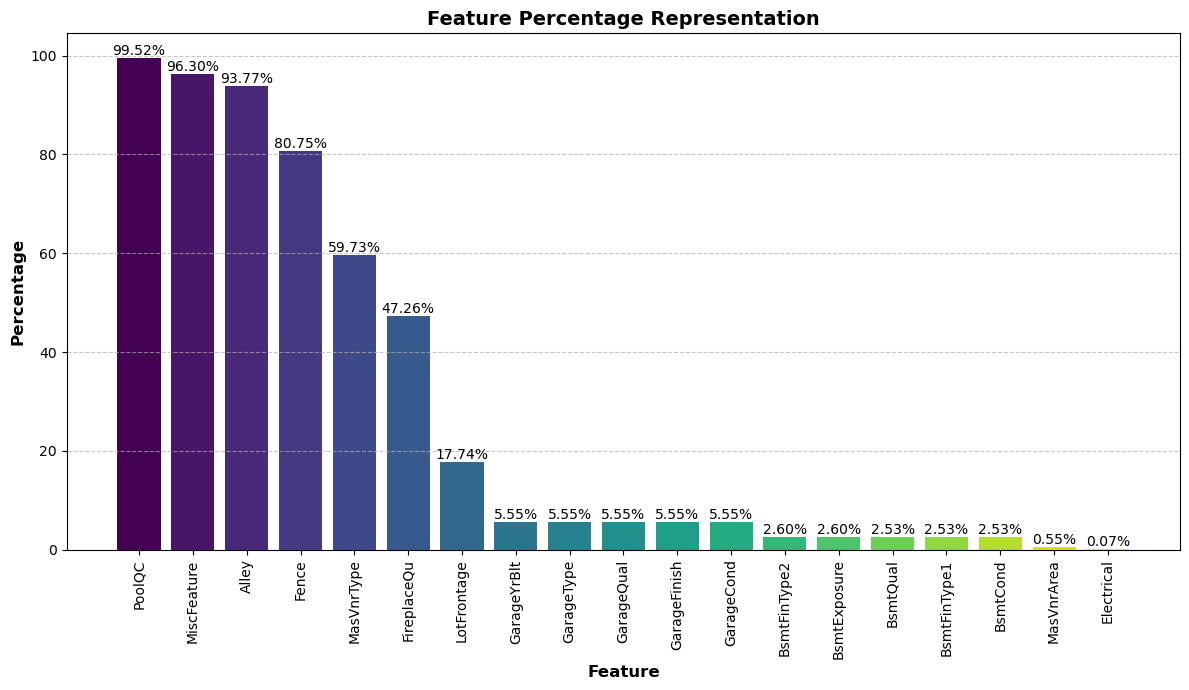

In [23]:
# Using bar chart show percentage of null values

features = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
            'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
            'PoolQC', 'Fence', 'MiscFeature']
values = [17.74, 93.77, 59.73, 0.55, 2.53, 2.53, 2.60, 2.53, 2.60, 0.07, 47.26, 5.55, 
          5.55, 5.55, 5.55, 5.55, 99.52, 80.75, 96.30]

# Sorting the values and features together
sorted_values, sorted_features = zip(*sorted(zip(values, features), reverse=True))

# Generate a color palette (unique colors for each bar)
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_values)))

# Plotting the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(sorted_features, sorted_values, color=colors)

# Adding percentages above the bars
for bar in bars:
    yval = bar.get_height()
    percentage = f'{yval:.2f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, yval, percentage, ha='center', va='bottom', fontsize=10, color='black')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Adding labels and title with a style
plt.xlabel('Feature', fontsize=12, fontweight='bold')
plt.ylabel('Percentage', fontsize=12, fontweight='bold')
plt.title('Feature Percentage Representation', fontsize=14, fontweight='bold')

# Adding grid lines for better clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### Handling missing values for categorical columns (object type)

In [25]:
# Inspecting null values in the categorical columns (only object types)

cat_null_obj_cols = data.select_dtypes(include='O')
missing_cat_obj_null_prcnt = round(((cat_null_obj_cols.isnull().sum() * 100) / len(cat_null_obj_cols.index)) , 2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt != 0]
missing_cat_obj_null_prcnt

Alley           93.77
MasVnrType      59.73
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [26]:
# Considering the aspect of 'meaningful missing'
# Replace nulls with 'None' where null implies absence of feature (from data dictionary)

# List of categorical columns where missing values need to be filled with 'None'

cat_null_obj_cols = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

# Fill missing values with 'None'
for column in cat_null_obj_cols:
    data[column] = data[column].fillna('None')

In [27]:
# Inspecting if null values in the categorical columns (only object types) imputed with 'None' or not

cat_null_obj_cols = data.select_dtypes(include='O')
missing_cat_obj_null_prcnt = round(((cat_null_obj_cols.isnull().sum() * 100) / len(cat_null_obj_cols.index)) , 2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt != 0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

#### Dealing with data imbalance (object type) columns
- We delete columns with 80% or more of the same value because they lack variability and provide little to no useful information for analysis or modeling, as they won't help distinguish between different outcomes.
- Retaining such columns can lead to unnecessary complexity and may introduce noise without adding value.

In [29]:
# List of categorical columns (you can add/remove columns as needed)
cat_columns = data.select_dtypes(include=['object']).columns

# Track deleted columns
deleted_columns = []

# Loop through categorical columns to check the most frequent value
for column in cat_columns:
    # Calculate the percentage of the most frequent value
    value_counts = data[column].value_counts(normalize=True)
    most_frequent_value_percentage = value_counts.iloc[0] * 100  # Get the percentage of the most frequent value
    
    # If more than 80% of the values are the same, mark the column for deletion
    if most_frequent_value_percentage >= 80:
        deleted_columns.append(column)

# Drop the columns
data.drop(columns=deleted_columns, inplace=True)

# Display the remaining columns
print(f"Remaining categorical columns: {data.select_dtypes(include=['object']).columns}")
print(f"Number of categorical columns deleted: {len(deleted_columns)}")
print(f"Deleted categorical columns: {deleted_columns}")

Remaining categorical columns: Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')
Number of categorical columns deleted: 24
Deleted categorical columns: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [30]:
data.shape

(1460, 57)

#### Insights :
- No more null values in categorical columns (object type) and also data imbalance is taken care of.

#### Univariate Analysis for Categorical columns (object type)

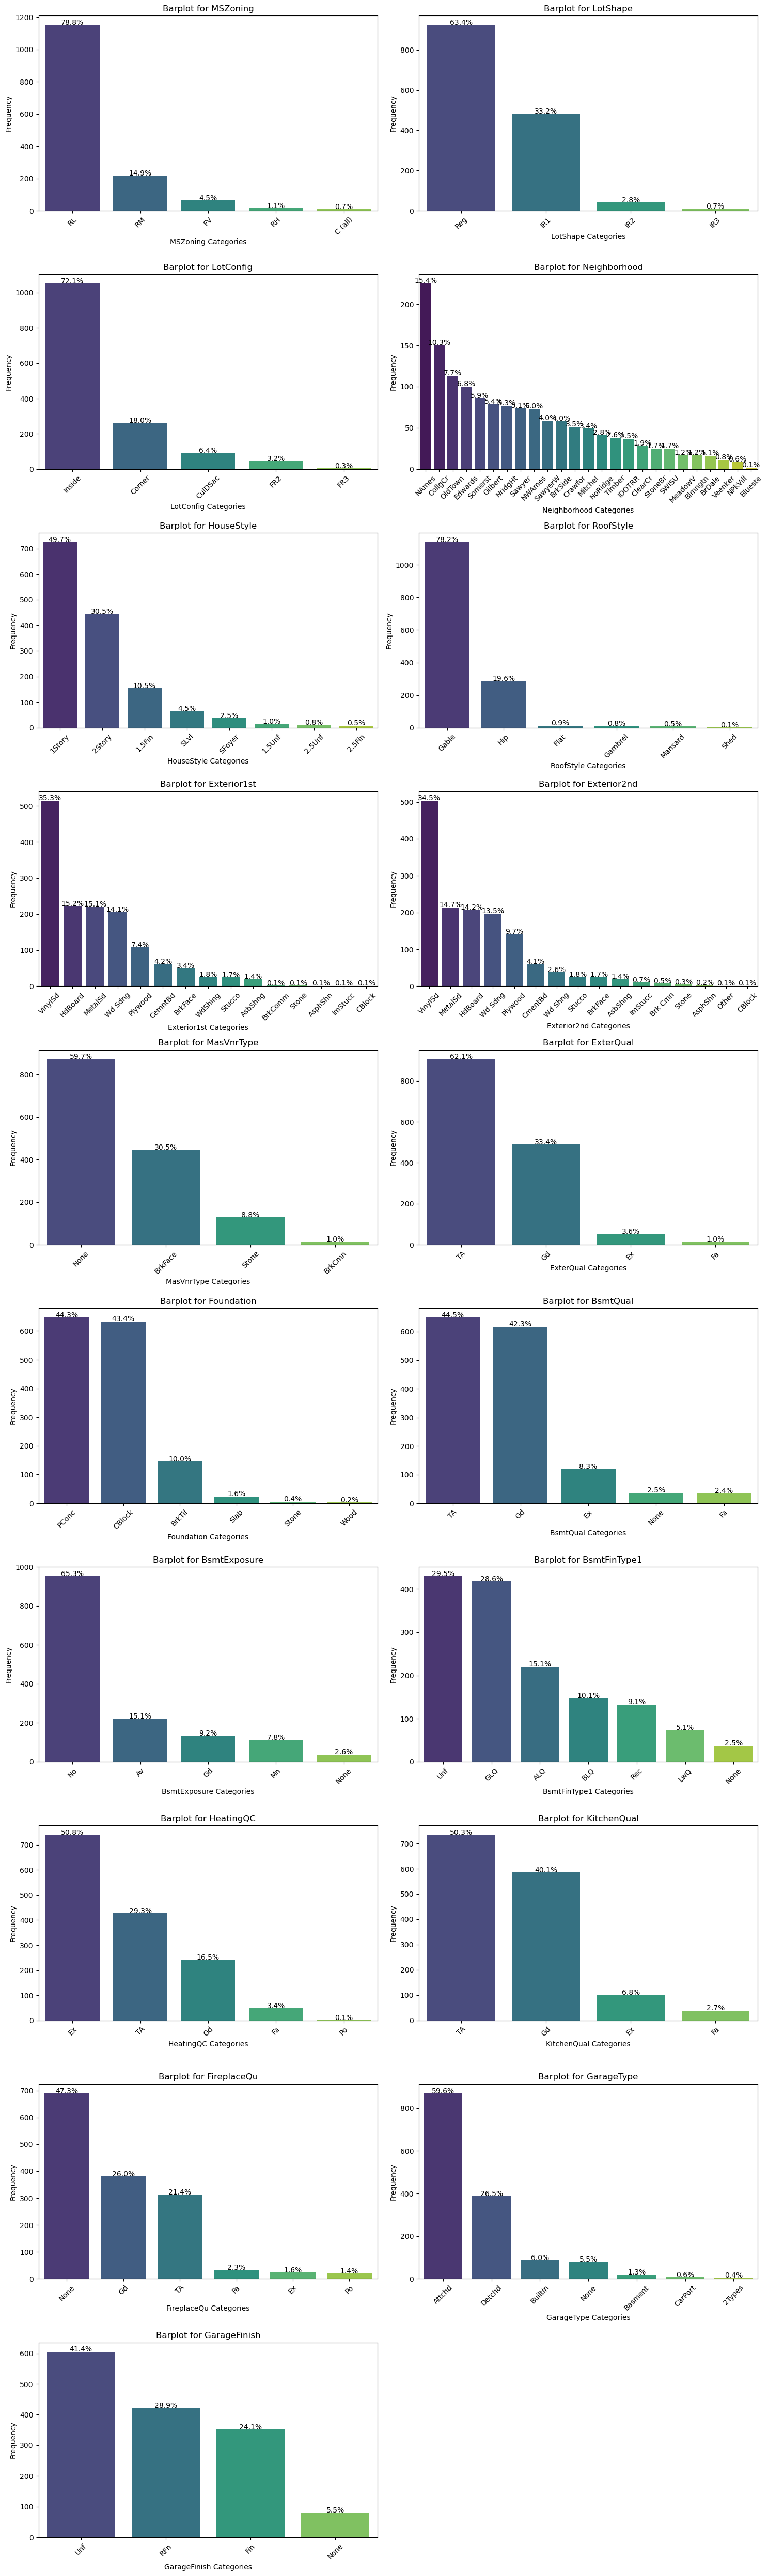

In [33]:
# List of categorical columns
cat_columns = data.select_dtypes(include=['object']).columns

# Set up the subplot grid
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(cat_columns) + n_cols - 1) // n_cols  # Number of rows based on the number of columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust the figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each categorical column
for idx, column in enumerate(cat_columns):
    # Count the frequency of each category
    value_counts = data[column].value_counts()
    total_count = len(data[column])  # Total count for percentage calculation
    
    # Plot the barplot on the corresponding subplot
    sns.barplot(
        x=value_counts.index, 
        y=value_counts.values, 
        palette="viridis", 
        ax=axes[idx]
    )
    
    # Add percentages above the bars
    for bar, value in zip(axes[idx].patches, value_counts.values):
        percentage = f"{(value / total_count) * 100:.1f}%"  # Calculate percentage
        axes[idx].text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
            bar.get_height() + 0.5,            # Y-coordinate: slightly above the bar
            percentage,                        # Text (percentage)
            ha="center", fontsize=10, color="black"
        )
    
    # Set subplot title and labels
    axes[idx].set_title(f"Barplot for {column}", fontsize=12)
    axes[idx].set_xlabel(f"{column} Categories", fontsize=10)
    axes[idx].set_ylabel("Frequency", fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any unused subplots if the grid is larger than the number of columns
for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

#### Insights :

**(1) MSZoning :** 
- The 'RL' category dominates (79.8%), indicating most properties are in low-density residential zones. Other zones have significantly lower representation.

**(2) LotShape :** 
- The majority (61.4%) of lots are regular in shape ('Reg'), with only a small proportion of irregular or unusual shapes.

**(3) LotConfig :** 
- 'Inside' lots make up 73.1%, showing that most properties are surrounded by other lots, with corner lots being a minority.

**(4) Neighborhood :** 
- Categories like 'NAmes' and 'CollgCr' are the most common, while some neighborhoods have very few properties, indicating geographic diversity.

**(5) HouseStyle :** 
- '1Story' houses dominate (50.3%), reflecting a preference for single-story homes in the dataset.

**(6) RoofStyle :** 
- 'Gable' roofs are the most common (80.4%), suggesting a standard architectural style across properties.

**(7) Exterior1st :** 
- Vinyl siding ('VinylSd') is the most frequently used exterior material (37.2%), followed by a mix of other materials.

**(8) Exterior2nd :** 
- Similar to Exterior1st, 'VinylSd' is dominant, with most homes using similar secondary materials.

**(9) MasVnrType :** 
- 'None' dominates (59.7%), indicating most properties lack masonry veneer, with 'BrkFace' being the next most common.

**(10) ExterQual :** 
- 'TA' (Typical/Average) quality is prevalent (63.1%), with only a few properties having higher or lower quality ratings.

**(11) Foundation :** 
- 'PConc' (poured concrete) and 'CBlock' are the most common foundation types, reflecting standard construction practices.

**(12) BsmtQual :** 
- Most basements are of 'TA' (Typical/Average) quality (47.3%), with fewer high-quality basements.

**(13) BsmtExposure :** 
- 'No' exposure dominates (63.3%), suggesting most basements lack walkouts or garden-level windows.

**(14) BsmtFinType1 :** 
- 'Unf' (Unfinished) and 'GLQ' (Good Living Quarters) are the most frequent, showing a mix of basic and high-quality finishes.

**(15) HeatingQC :** 
- 'Ex' (Excellent) heating quality is the most common (50.2%), indicating efficient heating systems in most properties.

**(16) KitchenQual :** 
- 'TA' (Typical/Average) quality dominates (50.1%), with a significant number of 'Gd' (Good) kitchens as well.

**(17) FireplaceQu :**
- 'None' dominates (47.3%), reflecting a significant proportion of properties without fireplaces.

**(18) GarageType :**
- 'Attchd' garages are the most common (59.6%), indicating a preference for attached garages.

**(19) GarageFinish :** 
- 'Unf' (Unfinished) garages dominate (41.4%), followed by finished garages ('RFn' and 'Fin').

#### Handling missing values for Numerical columns

In [36]:
# Inspecting null values in the numeric columns

numeric_null_cols = data.select_dtypes(include=['number'])
missing_numeric_null_prcnt = round(((numeric_null_cols.isnull().sum() * 100) / len(numeric_null_cols.index)) , 2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt != 0]
missing_numeric_null_prcnt

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [37]:
# Check the distribution of 'LotFrontage' and 'MasVnrArea' to replace null values
print("LotFrontage Stats :\n", data.LotFrontage.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))
print("\nMasVnrArea Stats :\n", data.MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))

LotFrontage Stats :
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
85%        90.000000
90%        96.000000
95%       107.000000
98%       124.000000
99%       141.000000
100%      313.000000
max       313.000000
Name: LotFrontage, dtype: float64

MasVnrArea Stats :
 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
85%       262.350000
90%       335.000000
95%       456.000000
98%       650.980000
99%       791.920000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [38]:
# For 'MasVnrArea', finding the median by removing all the values at 0.0 percentile to get a more precise value

updated_MasVnrArea = data.MasVnrArea[~(data.MasVnrArea == 0)]
print("\nMasVnrArea Stats :\n", updated_MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))


MasVnrArea Stats :
 count     591.000000
mean      254.739425
std       205.144174
min         1.000000
10%        70.000000
25%       113.000000
50%       203.000000
75%       330.500000
85%       424.500000
90%       481.000000
95%       650.500000
98%       862.000000
99%      1032.600000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


#### Insights :

- Since, there are outliers in 'LotFrontage' and 'MasVnrArea'.<br>
    - Impute the 'LotFrontage' with median, as the mean (70.05) and median(69) are quite close to each other. <br>
    - For 'MasVnrArea', a lot of values are 0.0. So considering the stats excluding 0.0. Impute the null values with median(203) as there as some outliers.

In [40]:
# Impute the null values with median values for 'LotFrontage' and 'MasVnrArea' columns

data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, updated_MasVnrArea.median())

In [41]:
# Filling the null values with 0 for 'GarageYrBlt' for now as we would be handling this column further below

data['GarageYrBlt']= data['GarageYrBlt'].fillna(0)
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)

In [42]:
# Check if the null values are imputed or not

numeric_null_cols = data.select_dtypes(include=['number'])
missing_numeric_null_prcnt = round(((numeric_null_cols.isnull().sum() * 100) / len(numeric_null_cols.index)) , 2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt != 0]
missing_numeric_null_prcnt

Series([], dtype: float64)

#### Insights :
- No more null values in Numerical columns now.

#### Derived new features

In [45]:
# Create a new column named 'WhetherRemodelled'
# This column would determine whether the house has been remodelled or not based on 'YearBuilt' anf 'YearRemodAdd' 

def remodel_check(row):
    if row['YearBuilt'] == row['YearRemodAdd']:
        return 0            # Indicate not Remodelled
    elif row['YearBuilt'] < row['YearRemodAdd']:
        return 1            # Indicated Remodelled
    else:
        return 2            # Any other observation check

data['WhetherRemodelled'] = data.apply(remodel_check, axis=1)

In [46]:
# Check for value counts in 'WhetherRemodelled'
data.WhetherRemodelled.value_counts()

WhetherRemodelled
0    764
1    696
Name: count, dtype: int64

#### Inisghts :
- No wrong entries with value '2'.
- Hence, 0 if not remodelled and 1 if remodelled.

In [48]:
# Derive a new variable named 'AgeofProperty' to determine the age of property since the built

def find_age_since_built(row):
    return row['YrSold'] - row['YearBuilt']

data['AgeOfProperty'] = data.apply(find_age_since_built, axis=1)

In [49]:
# Check column is created or not
data.AgeOfProperty.head()

0     5
1    31
2     7
3    91
4     8
Name: AgeOfProperty, dtype: int64

In [50]:
# Dropping the raw attributes from which the new features were derived
# These aren't necessary for analysis now
# Dropping 'YrSold', 'GarageYrBlt', 'YearRemodAdd' and 'YearBuilt'

data = data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis=1)

In [51]:
data.shape

(1460, 55)

#### Insights :
- Two features are added and 4 features are removed.

#### Dealing with data imbalance (Numerical) columns
- We delete columns with 80% or more of the same value because they lack variability and provide little to no useful information for analysis or modeling, as they won't help distinguish between different outcomes.
- Retaining such columns can lead to unnecessary complexity and may introduce noise without adding value.

In [54]:
# List of categorical columns (you can add/remove columns as needed)
num_columns = data.select_dtypes(include=['number']).columns

# Track deleted columns
deleted_columns = []

# Loop through categorical columns to check the most frequent value
for column in num_columns:
    # Calculate the percentage of the most frequent value
    value_counts = data[column].value_counts(normalize=True)
    most_frequent_value_percentage = value_counts.iloc[0] * 100  # Get the percentage of the most frequent value
    
    # If more than 80% of the values are the same, mark the column for deletion
    if most_frequent_value_percentage >= 80:
        deleted_columns.append(column)

# Drop the columns
data.drop(columns=deleted_columns, inplace=True)

# Display the remaining columns
print(f"Remaining categorical columns: {data.select_dtypes(include=['number']).columns}")
print(f"Number of categorical columns deleted: {len(deleted_columns)}")
print(f"Deleted categorical columns: {deleted_columns}")

Remaining categorical columns: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice',
       'WhetherRemodelled', 'AgeOfProperty'],
      dtype='object')
Number of categorical columns deleted: 9
Deleted categorical columns: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [55]:
data.shape

(1460, 46)

#### Inisghts :
- There are no null values in House Price Prediction dataset now.

#### Univariate Analysis for Numeric Categorical columns

In [58]:
# Numeric cateogorical columns
numeric_cat_cols = ['MSSubClass','MoSold','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',\
                    'TotRmsAbvGrd','Fireplaces','GarageCars','WhetherRemodelled']

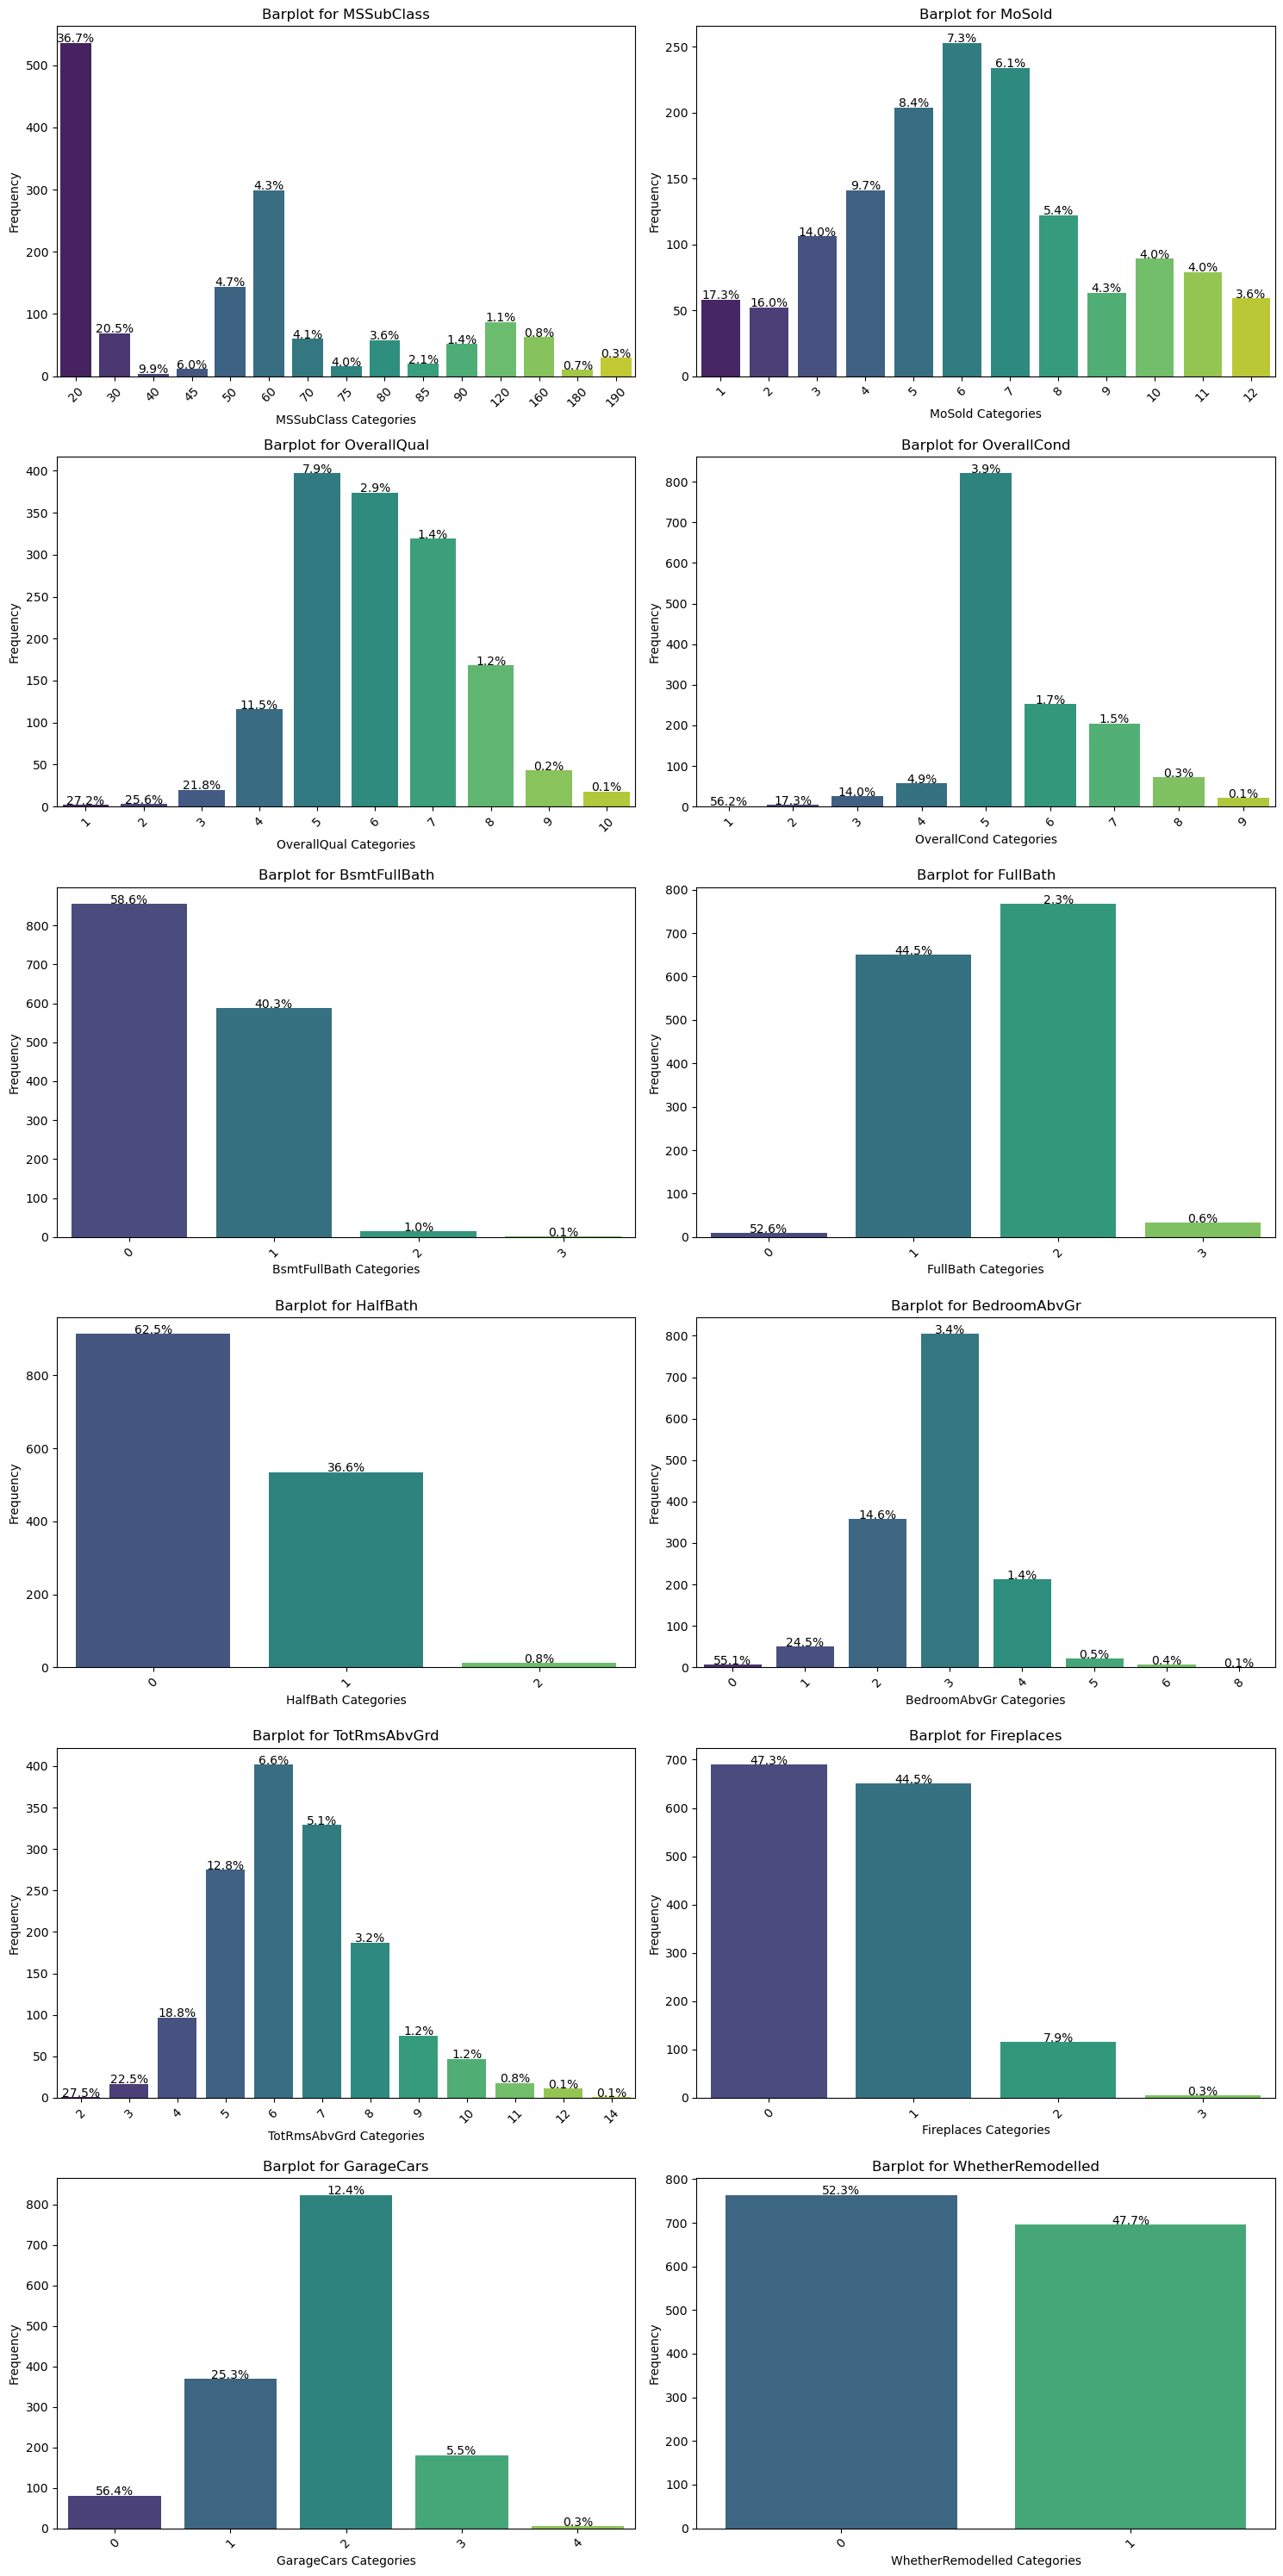

In [59]:
# Set up the subplot grid
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(numeric_cat_cols) + n_cols - 1) // n_cols  # Number of rows based on the number of columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust the figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each categorical column
for idx, column in enumerate(numeric_cat_cols):
    # Count the frequency of each category
    value_counts = data[column].value_counts()
    total_count = len(data[column])  # Total count for percentage calculation
    
    # Plot the barplot on the corresponding subplot
    sns.barplot(
        x=value_counts.index, 
        y=value_counts.values, 
        palette="viridis", 
        ax=axes[idx]
    )
    
    # Add percentages above the bars
    for bar, value in zip(axes[idx].patches, value_counts.values):
        percentage = f"{(value / total_count) * 100:.1f}%"  # Calculate percentage
        axes[idx].text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
            bar.get_height() + 0.5,            # Y-coordinate: slightly above the bar
            percentage,                        # Text (percentage)
            ha="center", fontsize=10, color="black"
        )
    
    # Set subplot title and labels
    axes[idx].set_title(f"Barplot for {column}", fontsize=12)
    axes[idx].set_xlabel(f"{column} Categories", fontsize=10)
    axes[idx].set_ylabel("Frequency", fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any unused subplots if the grid is larger than the number of columns
for j in range(len(numeric_cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

#### Insights :

**(1) MSSubClass :** 
- The '20' category (1-story 1946 and newer homes) dominates (86.7%), indicating most homes are newer, single-story properties.

**(2) MoSold :** 
- The summer months (May to July) see the highest sales, particularly June (8.4%), showing a seasonal trend in sales.

**(3) OverallQual :** 
- Most homes have an overall quality rating of 5 or 6 (46.9%), suggesting a concentration around average to good quality.

**(4) OverallCond :** 
- The majority of homes have a condition rating of 5 (93.0%), reflecting a uniform trend toward average condition.

**(5) BsmtFullBath :** 
- Most homes have either no full basement bathroom (58.6%) or one full basement bathroom (40.3%).

**(6) FullBath :** 
- Homes with 2 full bathrooms dominate (44.5%), while some homes have 1 full bathroom (52.6%).

**(7) HalfBath :** 
- The majority of homes either have no half bathrooms (62.5%) or one half bathroom (36.6%).

**(8) BedroomAbvGr :** 
- Most homes have 3 bedrooms above grade (84%), with very few having more than 4.

**(9) TotRmsAbvGrd :** 
- Homes with 6 or 7 total rooms above grade are most common (34.4%), reflecting average-sized properties.

**(10) Fireplaces :** 
- Nearly half the homes (47.3%) have no fireplace, while 44.5% have one fireplace, indicating moderate use of fireplaces.

**(11) GarageCars :** 
- Two-car garages dominate (56.4%), followed by one-car garages (25.3%), indicating most homes have standard-sized garages.

**(12) WhetherRemodelled :** 
- The dataset is evenly split, with 52.3% of homes not remodeled and 47.7% remodeled.

In [61]:
# Removing 'Id' and 'MoSold' columns as they are trivial for our analysis

data = data.drop(['Id', 'MoSold'], axis=1)

In [62]:
data.shape

(1460, 44)

#### Handling Outliers

In [64]:
# Check Outliers

data.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1]).T

count           mean           std      min       10%  \
MSSubClass         1460.0      56.897260     42.300571     20.0      20.0   
LotFrontage        1460.0      69.863699     22.027677     21.0      49.0   
LotArea            1460.0   10516.828082   9981.264932   1300.0    5000.0   
OverallQual        1460.0       6.099315      1.382997      1.0       5.0   
OverallCond        1460.0       5.575342      1.112799      1.0       5.0   
MasVnrArea         1460.0     104.229452    180.717988      0.0       0.0   
BsmtFinSF1         1460.0     443.639726    456.098091      0.0       0.0   
BsmtUnfSF          1460.0     567.240411    441.866955      0.0      74.9   
TotalBsmtSF        1460.0    1057.429452    438.705324      0.0     636.9   
1stFlrSF           1460.0    1162.626712    386.587738    334.0     756.9   
2ndFlrSF           1460.0     346.992466    436.528436      0.0       0.0   
GrLivArea          1460.0    1515.463699    525.480383    334.0     912.0   
BsmtFullBath       1460.0       0.425342      0.518911      0.0       0.0   
FullBath           1460.0       1.565068      0.550916      0.0       1.0   
HalfBath           1460.0       0.382877      0.502885      0.0       0.0   
BedroomAbvGr       1460.0       2.866438      0.815778      0.0       2.0   
TotRmsAbvGrd       1460.0       6.517808      1.625393      2.0       5.0   
Fireplaces         1460.0       0.613014      0.644666      0.0       0.0   
GarageCars         1460.0       1.767123      0.747315      0.0       1.0   
GarageArea         1460.0     472.980137    213.804841      0.0     240.0   
WoodDeckSF         1460.0      94.244521    125.338794      0.0       0.0   
OpenPorchSF        1460.0      46.660274     66.256028      0.0       0.0   
SalePrice          1460.0  180921.195890  79442.502883  34900.0  106475.0   
WhetherRemodelled  1460.0       0.476712      0.499629      0.0       0.0   
AgeOfProperty      1460.0      36.547945     30.250152      0.0       1.0   

                         25%       50%        75%        95%        98%  \
MSSubClass             20.00      50.0      70.00     160.00     188.20   
LotFrontage            60.00      69.0      79.00     104.00     120.82   
LotArea              7553.50    9478.5   11601.50   17401.15   25251.62   
OverallQual             5.00       6.0       7.00       8.00       9.00   
OverallCond             5.00       5.0       6.00       8.00       8.00   
MasVnrArea              0.00       0.0     168.00     456.00     650.82   
BsmtFinSF1              0.00     383.5     712.25    1274.00    1442.64   
BsmtUnfSF             223.00     477.5     808.00    1468.00    1678.20   
TotalBsmtSF           795.75     991.5    1298.25    1753.00    2001.64   
1stFlrSF              882.00    1087.0    1391.25    1831.25    2072.28   
2ndFlrSF                0.00       0.0     728.00    1141.05    1318.56   
GrLivArea            1129.50    1464.0    1776.75    2466.10    2782.38   
BsmtFullBath            0.00       0.0       1.00       1.00       1.00   
FullBath                1.00       2.0       2.00       2.00       3.00   
HalfBath                0.00       0.0       1.00       1.00       1.00   
BedroomAbvGr            2.00       3.0       3.00       4.00       4.00   
TotRmsAbvGrd            5.00       6.0       7.00      10.00      10.82   
Fireplaces              0.00       1.0       1.00       2.00       2.00   
GarageCars              1.00       2.0       2.00       3.00       3.00   
GarageArea            334.50     480.0     576.00     850.10     907.46   
WoodDeckSF              0.00       0.0     168.00     335.00     430.10   
OpenPorchSF             0.00      25.0      68.00     175.05     240.82   
SalePrice          129975.00  163000.0  214000.00  326100.00  394931.06   
WhetherRemodelled       0.00       0.0       1.00       1.00       1.00   
AgeOfProperty           8.00      35.0      54.00      91.00     100.00   

                         99%      100%       max  
MSSubClass     

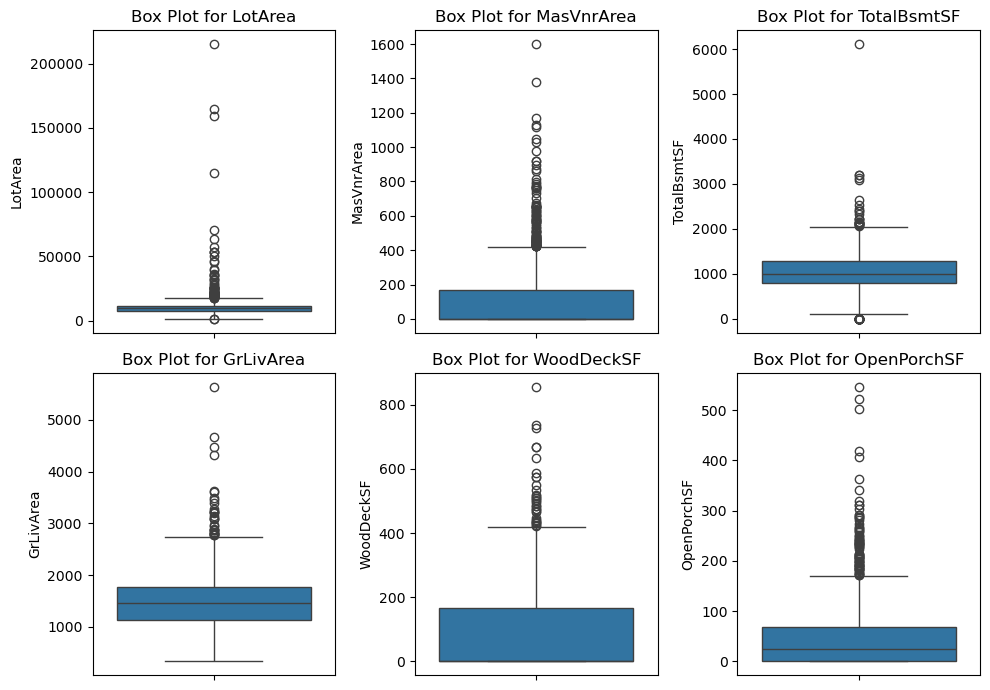

In [65]:
# Apply boxplot for numerical columns for outliers

# List of columns for which you want to create box plots
numerical_columns = ['LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']

# Create subplots (2 rows, 3 columns for 6 box plots)
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

# Create a box plot for each column in the respective subplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(ax=axes[i], data=data, y=col)
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if necessary

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [66]:
# Remove only the extreme outliers, while keeping the rest

# Removing values beyond 98% for 'LotArea'
LotArea_quantile = data['LotArea'].quantile(0.98)
data = data[data['LotArea'] < LotArea_quantile]

# Removing values beyond 99% for 'TotalBsmtSF'
TotalBsmtSF_quantile = data['TotalBsmtSF'].quantile(0.99)
data = data[data['TotalBsmtSF'] < TotalBsmtSF_quantile]

# Removing values beyond 99% for 'WoodDeckSF'
WoodDeckSF_quantile = data['WoodDeckSF'].quantile(0.99)
data = data[data['WoodDeckSF'] < WoodDeckSF_quantile]

# Removing values beyond 99% for 'OpenPorchSF'
OpenPorchSF_quantile = data['OpenPorchSF'].quantile(0.99)
data = data[data['OpenPorchSF'] < OpenPorchSF_quantile]

#### Visualizing the target variable (SalePrice)

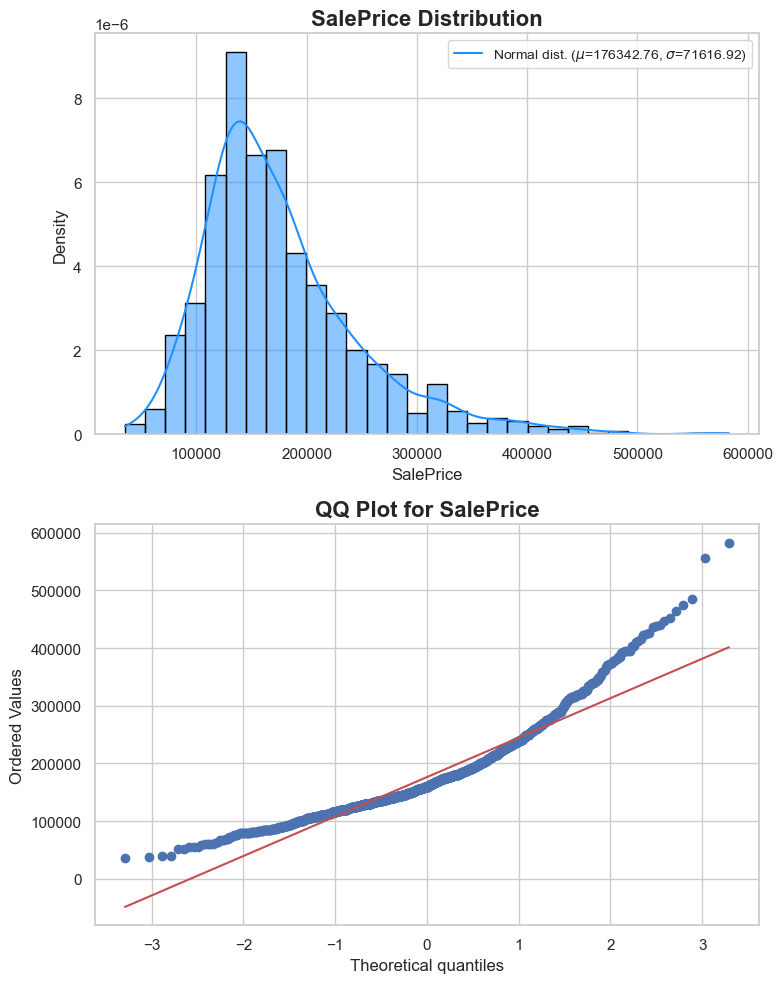

In [68]:
# Visualising the target variable 'SalePrice'

from scipy import stats
from scipy.stats import norm

# Set a nice seaborn style for better aesthetics
sns.set(style='whitegrid')

# Plot the distribution of 'SalePrice'
plt.figure(figsize=(8, 10))

# Top subplot: Distribution of 'SalePrice' with a normal fit
plt.subplot(211)
sns.histplot(data['SalePrice'], kde=True, stat='density', color='dodgerblue', bins=30, edgecolor='black')
mu, sigma = norm.fit(data['SalePrice'])
plt.legend([f'Normal dist. ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})'], loc='best', fontsize=10)
plt.title('SalePrice Distribution', fontsize=16, fontweight='bold')
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Bottom subplot: QQ plot for 'SalePrice'
plt.subplot(212)
stats.probplot(data['SalePrice'], dist='norm', plot=plt)
plt.title('QQ Plot for SalePrice', fontsize=16, fontweight='bold')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

#### Insights : 
- The points on the QQ plot deviate from the red line, indicating that the distribution of the target variable is skewed.
- This suggests that a transformation, such as a log transformation, could be beneficial to make the distribution more normal.

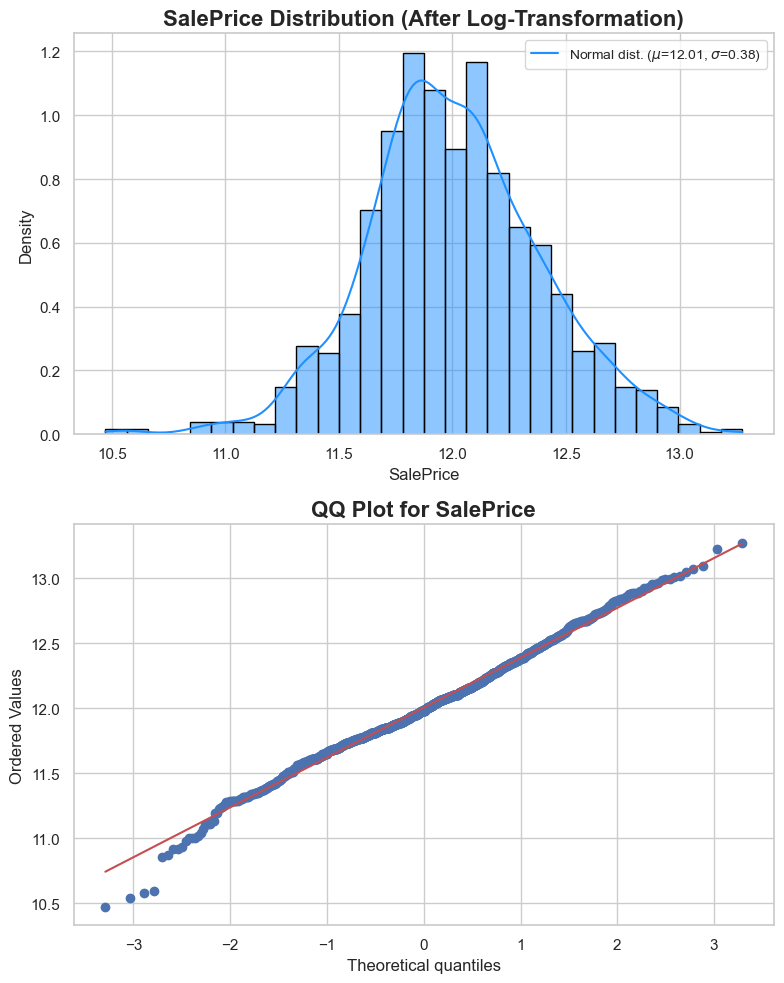

In [70]:
# Using the numpy fuction log1p which that applies log(1+x) to all elements of the target variable column
data['SalePrice'] = np.log1p(data['SalePrice'])

# Set a nice seaborn style for better aesthetics
sns.set(style='whitegrid')

# Plot the distribution of 'SalePrice'
plt.figure(figsize=(8, 10))

# Top subplot: Distribution of 'SalePrice' with a normal fit
plt.subplot(211)
sns.histplot(data['SalePrice'], kde=True, stat='density', color='dodgerblue', bins=30, edgecolor='black')
mu, sigma = norm.fit(data['SalePrice'])
plt.legend([f'Normal dist. ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})'], loc='best', fontsize=10)
plt.title('SalePrice Distribution (After Log-Transformation)', fontsize=16, fontweight='bold')
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Bottom subplot: QQ plot for 'SalePrice'
plt.subplot(212)
stats.probplot(data['SalePrice'], dist='norm', plot=plt)
plt.title('QQ Plot for SalePrice', fontsize=16, fontweight='bold')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

#### Insights :

- The normal distribution plot now shows that the log-transformed distribution of 'SalePrice' closely approximates a normal distribution.
- In the QQ plot, the data points closely follow the red reference line, indicating that the skewness in the 'SalePrice' target variable has been significantly reduced, with only minor deviations remaining.

#### Bivariate Analysis

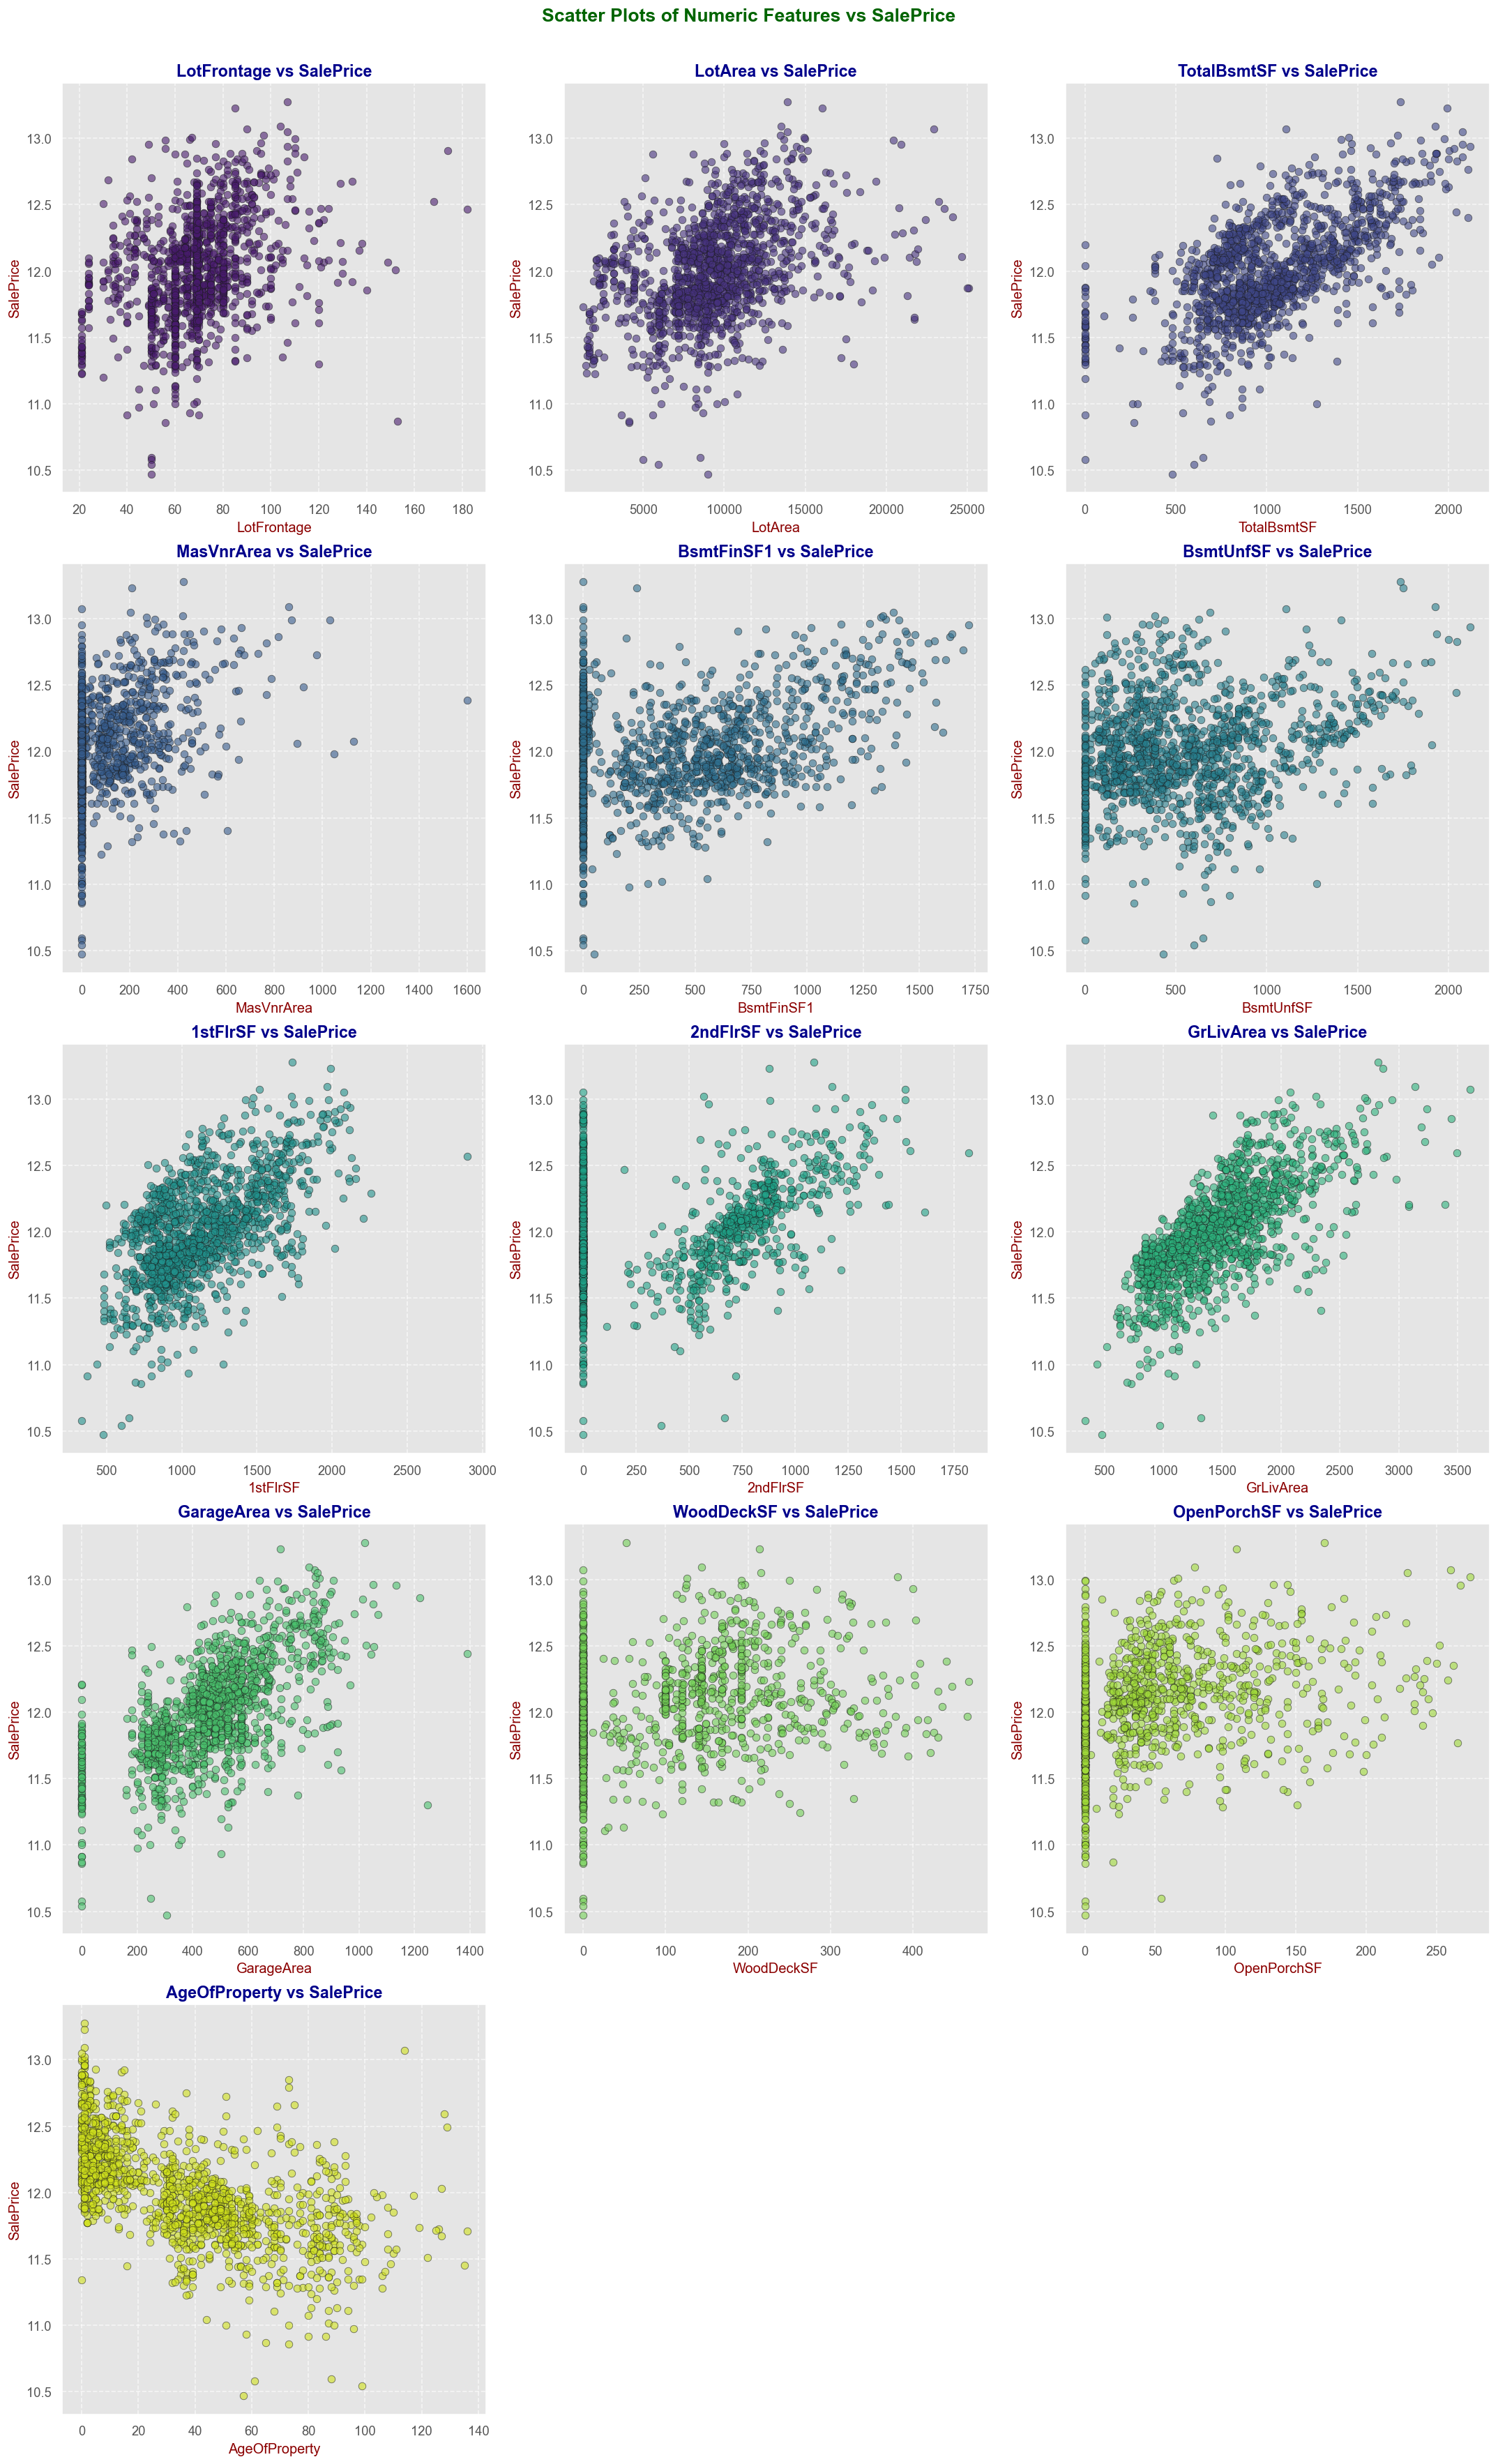

In [73]:
# Let's define a function to draw scatter plots to understand relationship between 'dependent' and 'numeric' variables

# Define numeric columns and target variable
numeric_cols = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 
                'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 
                '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 
                'WoodDeckSF', 'OpenPorchSF', 'AgeOfProperty']
target_variable = 'SalePrice'

# Set up styling
sns.set_theme(style='whitegrid')
plt.style.use('ggplot')  # Use a muted style from seaborn for consistency

# Create subplots
n_cols = 3  # Number of plots per row
n_rows = -(-len(numeric_cols) // n_cols)  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), dpi=120)
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Custom color palette
colors = sns.color_palette('viridis', len(numeric_cols))

# Generate scatter plots
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    scatter = ax.scatter(data[col], data[target_variable], alpha=0.6, color=colors[i], edgecolor='k', s=40)
    ax.set_title(f'{col} vs {target_variable}', fontsize=14, fontweight='bold', color='darkblue')
    ax.set_xlabel(col, fontsize=12, color='darkred')
    ax.set_ylabel(target_variable, fontsize=12, color='darkred')
    ax.grid(True, linestyle='--', alpha=0.6)

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle(f"Scatter Plots of Numeric Features vs {target_variable}", fontsize=16, fontweight='bold', color='darkgreen')

# Show the plots
plt.show()

#### Insights :

- '1stFlrSF' and 'GrLivArea' show a strong positive correlation with SalePrice.
- Other continuous variables appear highly scattered with no obvious patterns. Further analysis is required to understand their relationships with SalePrice.
- Scatterplots of SalePrice vs 'LotFrontage', 'MasVnrArea', '1stFlrSF', and 'GarageArea' reveal some data points with unusual or extreme values. These potential outliers should be addressed before proceeding with further analysis.

In [75]:
# Based on the 'LotFrontage', 'MasVnrArea', '1stFlrSF', and 'GarageArea' scatterplots w.r.t. SalePrice 
# Eliminating some outlier datapoints 

data = data.loc[~((data['SalePrice'] < 11.0) & (data['LotFrontage'] > 150))]
data = data.loc[~((data['SalePrice'] > 12.0) & (data['MasVnrArea'] > 1500))]
data = data.loc[~((data['SalePrice'] > 12.0) & (data['1stFlrSF'] > 2500))]
data = data.loc[~((data['SalePrice'] < 12.5) & (data['GarageArea'] > 1200))]

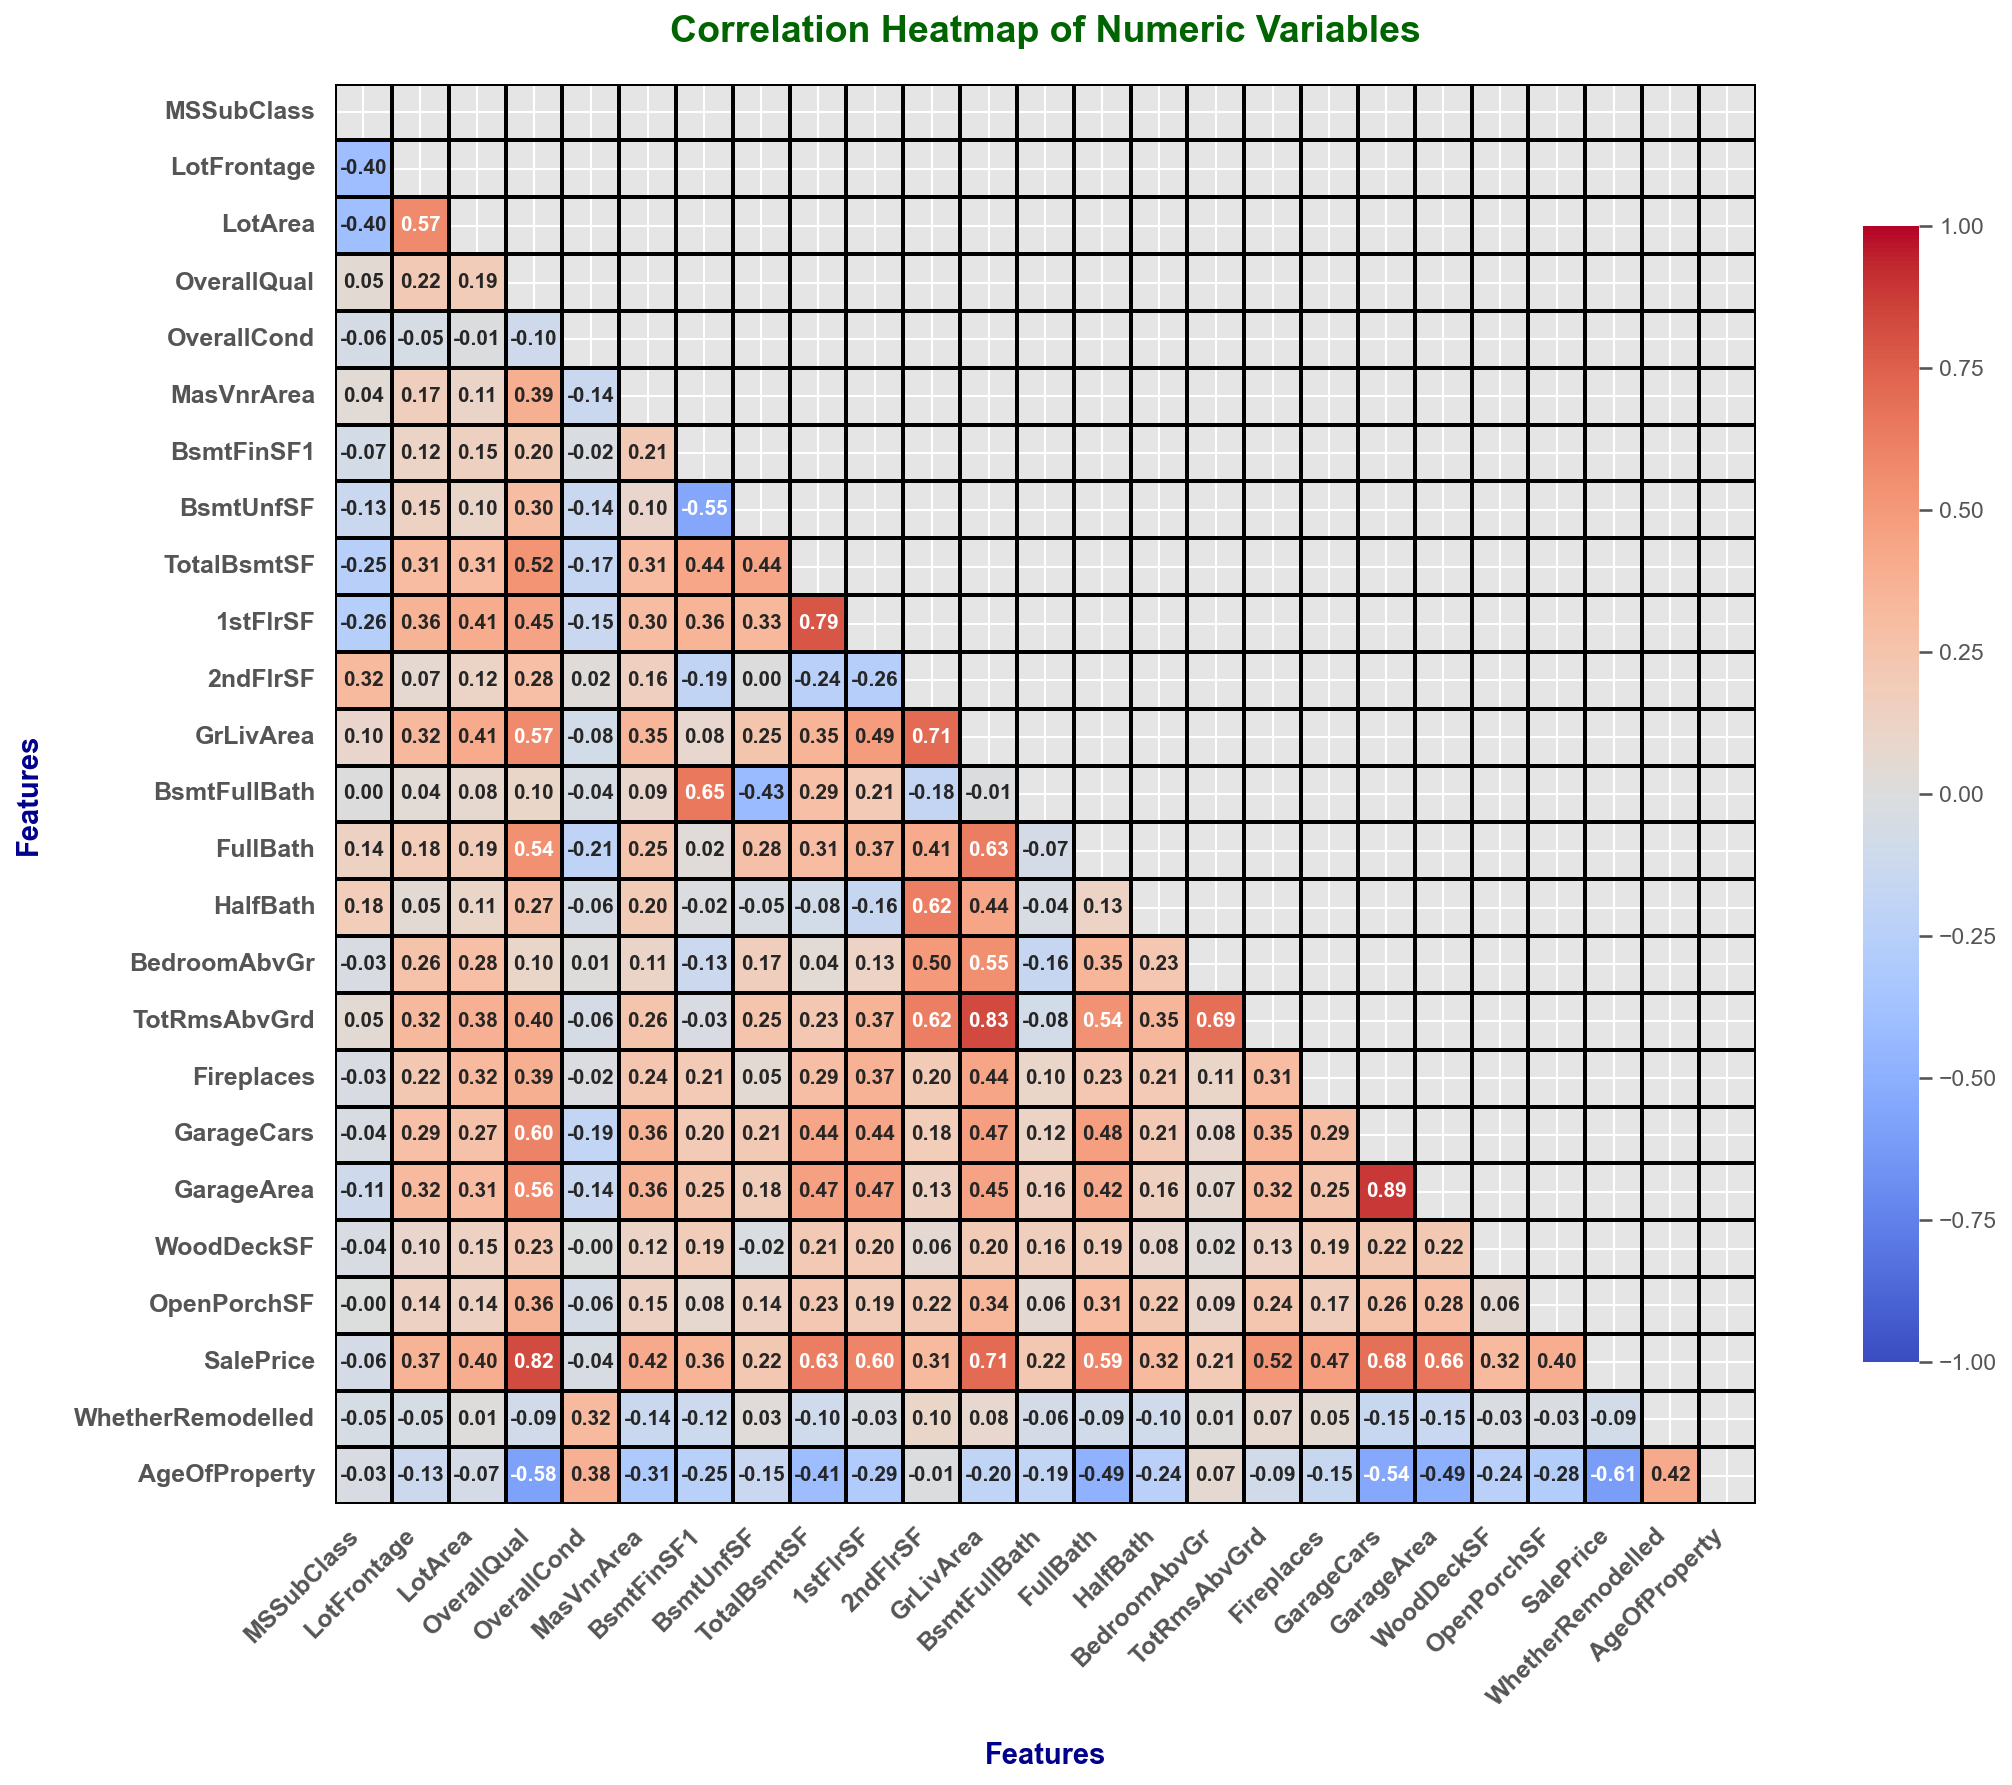

In [76]:
# Plotting a heatmap to understand correlation amongest numeric columns (ignore the categorical numeric ones)

# Select numeric columns from the dataset
numeric_vars = data.select_dtypes(include=['number']).columns

# Compute the correlation matrix
corr_matrix_new = data[numeric_vars].corr()

# Create a mask for the upper triangle
my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 12), dpi=150)

# Create the heatmap with advanced styling
sns.heatmap(
    corr_matrix_new,
    mask=my_mask_1,
    cmap='coolwarm',             # Improved colormap for better contrast
    cbar_kws={"shrink": 0.8},    # Adjust color bar size
    vmin=-1, vmax=1,             # Correlation range
    center=0,                    # Center the colormap at 0
    square=True,                 # Square-shaped cells
    annot=True,                  # Annotate cells with correlation values
    fmt=".2f",                   # Format numbers to 2 decimal places
    linewidths=1,                # Add grid lines
    linecolor='black',           # Black grid lines for clarity
    annot_kws={"size": 10, "weight": "bold"},  # Custom annotation font size and weight
)

# Add axis labels
plt.xlabel('Features', fontsize=14, labelpad=15, fontweight='bold', color="darkblue")
plt.ylabel('Features', fontsize=14, labelpad=15, fontweight='bold', color="darkblue")

# Add a title
plt.title(
    'Correlation Heatmap of Numeric Variables',
    fontsize=18,
    fontweight='bold',
    pad=20,
    color="darkgreen"
)

# Adjust tick parameters for better readability
plt.xticks(fontsize=12, rotation=45, ha='right', weight='bold')
plt.yticks(fontsize=12, rotation=0, weight='bold')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The predictors `'GrLivArea'` and `'TotRmsAbvGrd'` exhibit a strong positive correlation of 0.83. Consequently, I will drop `'TotRmsAbvGrd'`.
- The predictors `'GarageCars'` and `'GarageArea'` show a strong positive correlation of 0.89. Therefore, I will remove `'GarageCars'`.
- The predictors `'1stFlrSF'` and `'TotalBsmtSF'` have a strong positive correlation of 0.77. As a result, I will drop `'1stFlrSF'`.
- The predictors `'GrLivArea'` and `'2ndFlrSF'` display a positive correlation of 0.71. Hence, I will exclude `'2ndFlrSF'`.

In [78]:
# Removing highly correlated predictors to reduce multicollinearity

data = data.drop(['TotRmsAbvGrd', 'GarageCars', '1stFlrSF', '2ndFlrSF'], axis = 1)

In [79]:
data.shape

(1381, 40)

#### Encoding

In [81]:
# List of columns to check value counts for ordinal categorical variable
columns_to_check = ['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 
                    'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']

# Display the value counts in a more readable way
for column in columns_to_check:
    print(f"Value counts for {column} :")
    print(data[column].value_counts(dropna=False))  # dropna=False to include NaN values if any
    print("\n" + "-"*50 + "\n")

Value counts for LotShape :
LotShape
Reg    894
IR1    447
IR2     32
IR3      8
Name: count, dtype: int64

--------------------------------------------------

Value counts for ExterQual :
ExterQual
TA    868
Gd    461
Ex     39
Fa     13
Name: count, dtype: int64

--------------------------------------------------

Value counts for BsmtQual :
BsmtQual
TA      619
Gd      585
Ex      105
None     37
Fa       35
Name: count, dtype: int64

--------------------------------------------------

Value counts for BsmtExposure :
BsmtExposure
No      916
Av      211
Mn      109
Gd      107
None     38
Name: count, dtype: int64

--------------------------------------------------

Value counts for BsmtFinType1 :
BsmtFinType1
Unf     416
GLQ     391
ALQ     204
BLQ     140
Rec     124
LwQ      69
None     37
Name: count, dtype: int64

--------------------------------------------------

Value counts for HeatingQC :
HeatingQC
Ex    701
TA    403
Gd    232
Fa     44
Po      1
Name: count, dtype: int64

In [82]:
# Define mappings for ordered categorical fields
mapping_dict = {
    'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},  # LotShape mapping 
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},  # ExterQual mapping
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},  # BsmtQual mapping
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},  # BsmtExposure mapping 
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},  # BsmtFinType1 mapping
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},  # HeatingQC mapping
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},  # KitchenQual mapping
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},  # FireplaceQu mapping 
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}  # GarageFinish mapping
}

# Apply the mappings to the respective columns
for column, mapping in mapping_dict.items():
    data[column] = data[column].map(mapping)

In [83]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450         3    Inside      CollgCr   
1          20       RL         80.0     9600         3       FR2      Veenker   
2          60       RL         68.0    11250         2    Inside      CollgCr   
3          70       RL         60.0     9550         2    Corner      Crawfor   
4          60       RL         84.0    14260         2       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  \
0    BrkFace       196.0          4      PConc         4             1   
1       None         0.0          3     CBlock         4             4   
2    BrkFace       162.0          4      PConc         4             2   
3       None         0.0          3     BrkTil         3             1   
4    BrkFace       350.0          4      PConc         4             3   

   BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  GrLivArea  \
0             6         706        150          856          5       1710   
1             5         978        284         1262          5       1262   
2             6         486        434          920          5       1786   
3             5         216        540          756          4       1717   
4             6         655        490         1145          5       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  \
0             1         2         1             3            4           0   
1             0         2         0             3            3           1   
2             1         2         1             3            4           1   
3             1         1         0             3            4           1   
4             1         2         1             4            4           1   

   FireplaceQu GarageType  GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  \
0            0     Attchd             2         548           0           61   
1            3     Attchd             2         460         298            0   
2            3     Attchd             2         608           0           42   
3            4     Detchd             1         642           0           35   
4            3     Attchd             2         836         192           84   

   SalePrice  WhetherRemodelled  AgeOfProperty  
0  12.247699                  0              5  
1  12.109016                  0             31  
2  12.317171                  1              7  
3  11.849405                  1             91  
4  12.429220                  0              8

In [84]:
# List of categorical columns for which we need to create dummy variables
categorical_columns = [
    'MSSubClass', 'MSZoning', 'Neighborhood', 'RoofStyle',
    'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType',
    'LotConfig', 'HouseStyle', 'MasVnrType'
]

# Loop through each column, create dummies, and concatenate to the main dataframe
for column in categorical_columns:
    dummies = pd.get_dummies(data[column], prefix=column, drop_first=True).astype(int)
    data = pd.concat([data, dummies], axis=1)

# Drop the original columns after creating dummies
data = data.drop(categorical_columns, axis=1)

In [85]:
data.head()

LotFrontage  LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  \
0         65.0     8450         3            7            5       196.0   
1         80.0     9600         3            6            8         0.0   
2         68.0    11250         2            7            5       162.0   
3         60.0     9550         2            7            5         0.0   
4         84.0    14260         2            8            5       350.0   

   ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
0          4         4             1             6         706        150   
1          3         4             4             5         978        284   
2          4         4             2             6         486        434   
3          3         3             1             5         216        540   
4          4         4             3             6         655        490   

   TotalBsmtSF  HeatingQC  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0          856          5       1710             1         2         1   
1         1262          5       1262             0         2         0   
2          920          5       1786             1         2         1   
3          756          4       1717             1         1         0   
4         1145          5       2198             1         2         1   

   BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  GarageFinish  \
0             3            4           0            0             2   
1             3            3           1            3             2   
2             3            4           1            3             2   
3             3            4           1            4             1   
4             4            4           1            3             2   

   GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  WhetherRemodelled  \
0         548           0           61  12.247699                  0   
1         460         298            0  12.109016                  0   
2         608           0           42  12.317171                  1   
3         642           0           35  11.849405                  1   
4         836         192           84  12.429220                  0   

   AgeOfProperty  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              5              0              0              0              0   
1             31              0              0              0              0   
2              7              0              0              0              0   
3             91              0              0              0              0   
4              8              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0            0            1            0   
4               0            0            0     

In [86]:
data.shape

(1381, 130)

In [87]:
# Rechecking and eliminating those predictor variables that have a correlation of (threshold :- 0.7 to 0.7) with other predictors

# Dropping 'SalePrice' from the data to focus on predictors
data_corr = data.drop('SalePrice', axis=1)

# Compute the absolute correlation matrix
corr_matrix = data_corr.corr().abs()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1))

# Identify columns to drop based on the correlation threshold
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]

col_to_drop

['ExterQual',
 'BsmtFinSF1',
 'KitchenQual',
 'FireplaceQu',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'RoofStyle_Hip',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Foundation_PConc',
 'GarageType_Detchd',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'MasVnrType_None']

In [88]:
# Dropping independent predictors highly correlated to each other
data = data.drop(col_to_drop, axis=1)

In [89]:
data.shape

(1381, 108)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 0 to 1458
Columns: 108 entries, LotFrontage to MasVnrType_Stone
dtypes: float64(3), int32(83), int64(22)
memory usage: 728.3 KB


In [91]:
data.head()

LotFrontage  LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  \
0         65.0     8450         3            7            5       196.0   
1         80.0     9600         3            6            8         0.0   
2         68.0    11250         2            7            5       162.0   
3         60.0     9550         2            7            5         0.0   
4         84.0    14260         2            8            5       350.0   

   BsmtQual  BsmtExposure  BsmtFinType1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         4             1             6        150          856          5   
1         4             4             5        284         1262          5   
2         4             2             6        434          920          5   
3         3             1             5        540          756          4   
4         4             3             6        490         1145          5   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  \
0       1710             1         2         1             3           0   
1       1262             0         2         0             3           1   
2       1786             1         2         1             3           1   
3       1717             1         1         0             3           1   
4       2198             1         2         1             4           1   

   GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  \
0             2         548           0           61  12.247699   
1             2         460         298            0  12.109016   
2             2         608           0           42  12.317171   
3             1         642           0           35  11.849405   
4             2         836         192           84  12.429220   

   WhetherRemodelled  AgeOfProperty  MSSubClass_30  MSSubClass_40  \
0                  0              5              0              0   
1                  0             31              0              0   
2                  1              7              0              0   
3                  1             91              0              0   
4                  0              8              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0               0            0            0   

   MSZoning_RL  Neighborhood_Blueste  Neighborhood_BrDale  \
0            1                     0                    0   
1            1                     0                    0   
2            1                     0                    0   
3            1                     0                    0   
4            1                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                

#### Split data and Apply Scaling Only On Training Data

In [93]:
# Split data into dependent and independent features
# 'SalePrice' is the target and the rest are features

x = data.drop('SalePrice', axis=1)  # Feature columns
y = data['SalePrice']  # Target column

In [94]:
# Split the data into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [95]:
# Columns that need to be scaled
scaling_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF',
                   'TotalBsmtSF', 'GrLivArea', 'GarageArea', 
                   'WoodDeckSF', 'OpenPorchSF', 'AgeOfProperty']

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data (only on the scaling_columns)
x_train_scaled = x_train.copy()      # To avoid changing the original data
x_train_scaled[scaling_columns] = scaler.fit_transform(x_train[scaling_columns])

# Transform the test data using the same scaler (do NOT fit on test data)
x_test_scaled = x_test.copy()        # To avoid changing the original data
x_test_scaled[scaling_columns] = scaler.transform(x_test[scaling_columns])

## Task 2 :- 
#### **a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.**      
#### **b) Determine the relationship between the house features and how the price varies based on this.**

#### Model creation
- Here we will experimenting with some models like Linear Regression, Ridge Regression, Ridge Regression With Hyperparameter Tuning, Lasso Regression, Lasso Regression With Hyperparameter Tuning, Supprot Vector Regressor, Supprot Vector Regressor With Hyperparameter Tuning, Random Forest, Random Forest With Hyperparameter Tuning and also fast model like CatBoost and LightGBM.

#### Linear Regression

In [99]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Object creation
lr_model = LinearRegression()

# Fit the model
lr_model.fit(x_train_scaled, y_train)

LinearRegression()

In [100]:
# Predict on test data
lr_test_pred = lr_model.predict(x_test_scaled)

# Predict on train data
lr_train_pred = lr_model.predict(x_train_scaled)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training set evaluation
mae_lr_train = mean_absolute_error(y_train, lr_train_pred)
mse_lr_train = mean_squared_error(y_train, lr_train_pred)
rmse_lr_train = np.sqrt(mse_lr_train)
r2_lr_train = r2_score(y_train, lr_train_pred)

# Testing set evaluation
mae_lr_test = mean_absolute_error(y_test, lr_test_pred)
mse_lr_test = mean_squared_error(y_test, lr_test_pred)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_test = r2_score(y_test, lr_test_pred)

print("For Linear Regression Model (Original Model) :\n","*"*40)
print("\nFor Train Set :-\nR2 score :",r2_lr_train,"\nMSE score :",mse_lr_train,"\nMAE score :", mae_lr_train,\
     "\nRMSE score :",rmse_lr_train)
print("\nFor Test Set :-\nR2 score:",r2_lr_test,"\nMSE score :",mse_lr_test,"\nMAE score :",mae_lr_test,\
      "\nRMSE score :",rmse_lr_test,"\n","*"*40)

For Linear Regression Model (Original Model) :
 ****************************************

For Train Set :-
R2 score : 0.9200373853122212 
MSE score : 0.011406265798844994 
MAE score : 0.07365311850543911 
RMSE score : 0.10680012078104123

For Test Set :-
R2 score: 0.9160928939857437 
MSE score : 0.013509258751202428 
MAE score : 0.08179651356548157 
RMSE score : 0.11622933687844231 
 ****************************************


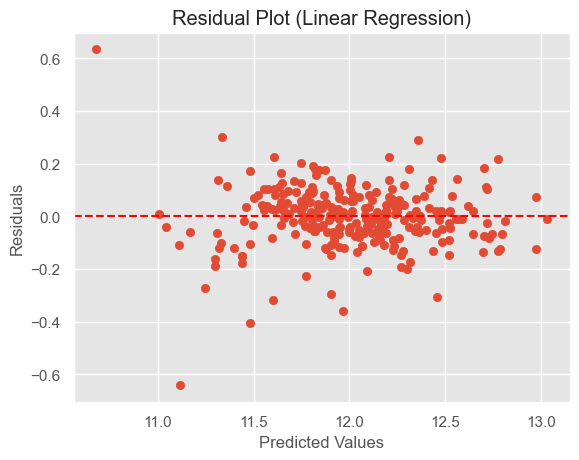

In [102]:
# Residuals for the test set
lr_residuals = y_test - lr_test_pred

plt.scatter(lr_test_pred, lr_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.show()

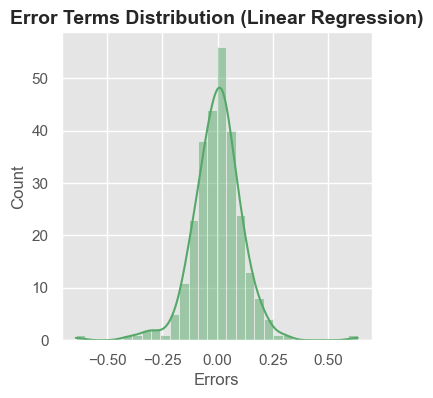

In [103]:
# Plot the histogram for Residuals (test set)
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(lr_residuals, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (Linear Regression)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

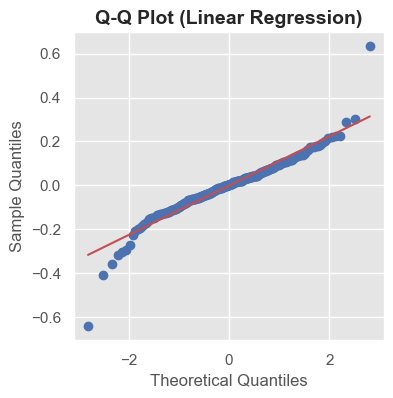

In [104]:
# Evaluate normality by comparing residuals against a theoretical normal distribution.
from scipy.stats import probplot

# Q-Q Plot
plt.figure(figsize=(4, 4), dpi=100)
probplot(lr_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Linear Regression)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights :
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [106]:
# Creating a DataFrame to display features and their corresponding coefficients
lr_df = pd.DataFrame({
    'Features': x_train_scaled.columns, 
    'Coefficient': lr_model.coef_.round(4),
    'Abs_Coefficient_Linear(Desc_Sort)': abs(lr_model.coef_).round(4)
})

# Sorting the DataFrame by the absolute value of coefficients in descending order
lr_df_sorted = lr_df.sort_values(by='Abs_Coefficient_Linear(Desc_Sort)', ascending=False)

# Resetting the index of the sorted DataFrame
lr_df_sorted.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the largest absolute coefficients
lr_df_sorted.head(10)

Features  Coefficient  Abs_Coefficient_Linear(Desc_Sort)
0             GrLivArea       0.8100                             0.8100
1   Exterior1st_BrkComm      -0.6922                             0.6922
2         AgeOfProperty      -0.4122                             0.4122
3           TotalBsmtSF       0.3095                             0.3095
4            GarageArea       0.1914                             0.1914
5     HouseStyle_2.5Fin      -0.1338                             0.1338
6               LotArea       0.1280                             0.1280
7       Foundation_Wood      -0.1241                             0.1241
8  Neighborhood_MeadowV      -0.1228                             0.1228
9  Neighborhood_StoneBr       0.1220                             0.1220

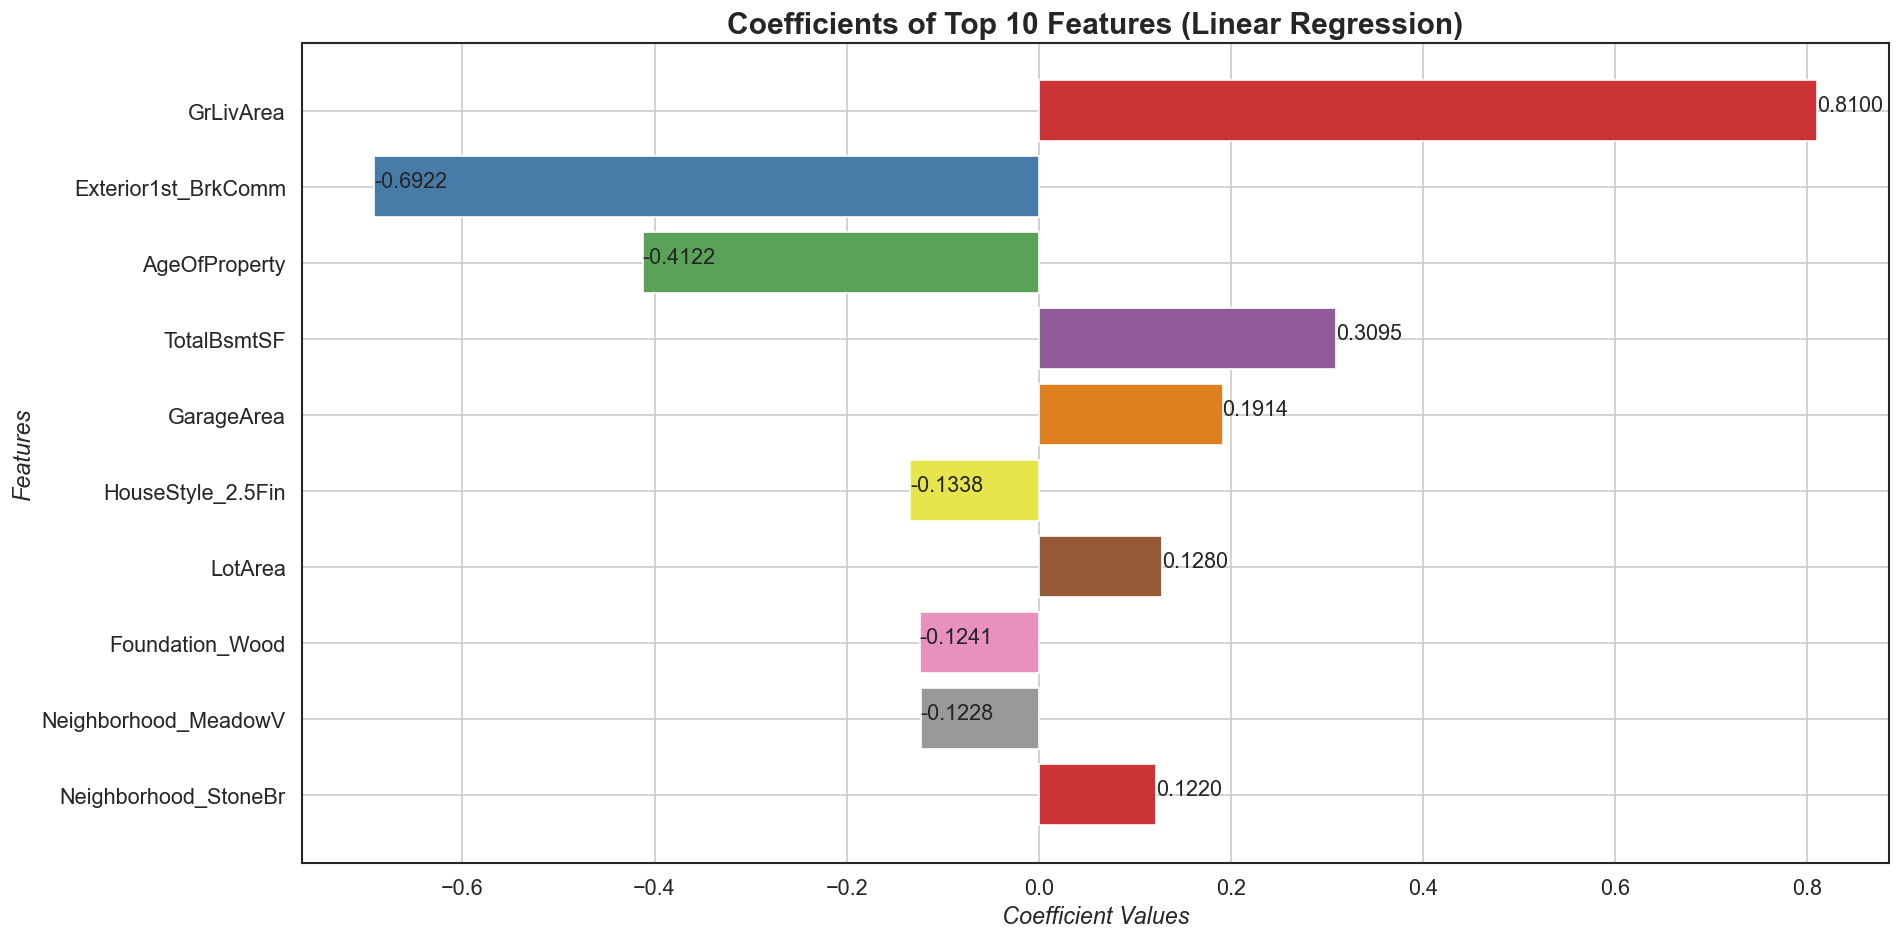

In [107]:
# Extracting the top 10 features based on the largest absolute coefficients
top10_lr_df = lr_df_sorted.loc[:9]

# Set Seaborn style for better visuals
sns.set(style='white')

# Create the plot with appropriate figure size and resolution
plt.figure(figsize=(16, 8), dpi=120)

# Plotting the barplot for the coefficients of the top 10 features
ax3 = sns.barplot(y=top10_lr_df['Features'], x=top10_lr_df['Coefficient'], palette='Set1')

# Adding labels and title
plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficients of Top 10 Features (Linear Regression)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual coefficient values
coef = top10_lr_df['Coefficient']
for index, value in enumerate(coef):
    plt.text(value, index, f'{value:.4f}', fontsize=13)

# Additional formatting for grid and ticks
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout to ensure everything fits properly
plt.autoscale()
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the Linear Regression model, that are significant in predicting the sale price of the house.

#### Ridge Regression

In [110]:
from sklearn.linear_model import Ridge

# Ridge Regression with alpha = 1.0 (regularization strength)
ridge_model = Ridge(alpha=1.0)

# Fit the model 
ridge_model.fit(x_train_scaled, y_train)

Ridge()

In [111]:
# Prediction on train data
ridge_train_pred = ridge_model.predict(x_train_scaled)

# Prediction on test data
ridge_test_pred = ridge_model.predict(x_test_scaled)

In [112]:
# Training set evaluation
mae_ridge_train = mean_absolute_error(y_train, ridge_train_pred)
mse_ridge_train = mean_squared_error(y_train, ridge_train_pred)
rmse_ridge_train = np.sqrt(mse_ridge_train)
r2_ridge_train = r2_score(y_train, ridge_train_pred)

# Testing set evaluation
mae_ridge_test = mean_absolute_error(y_test, ridge_test_pred)
mse_ridge_test = mean_squared_error(y_test, ridge_test_pred)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_test = r2_score(y_test, ridge_test_pred)

print("For Ridge Regression Model (Original Model, alpha = 1.0) :\n","*"*40)
print("\nFor Train Set :-\nR2 score :",r2_ridge_train,"\nMSE score :",mse_ridge_train,"\nMAE score :", mae_ridge_train,\
     "\nRMSE score :",rmse_ridge_train)
print("\nFor Test Set :-\nR2 score :",r2_ridge_test,"\nMSE score :",mse_ridge_test,"\nMAE score :",mae_ridge_test,\
      "\nRMSE score :",rmse_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha = 1.0) :
 ****************************************

For Train Set :-
R2 score : 0.9182764365564238 
MSE score : 0.011657456303872858 
MAE score : 0.07497042643079713 
RMSE score : 0.1079697008603472

For Test Set :-
R2 score : 0.9221617845869742 
MSE score : 0.012532151836672042 
MAE score : 0.0808917837439336 
RMSE score : 0.11194709391793983 
 ****************************************


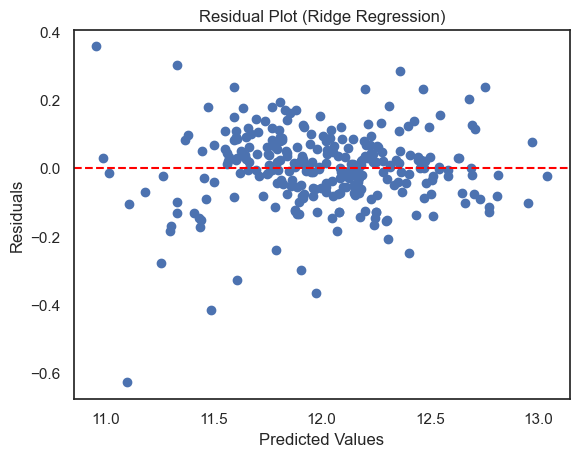

In [113]:
# Residuals for the test set
ridge_residuals = y_test - ridge_test_pred

plt.scatter(ridge_test_pred, ridge_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression)')
plt.show()

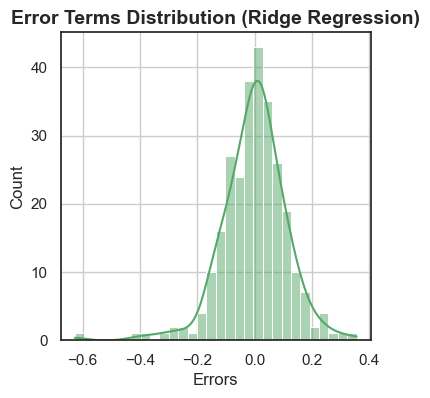

In [114]:
# Plot the histogram for Residuals (test set)
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(ridge_residuals, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (Ridge Regression)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

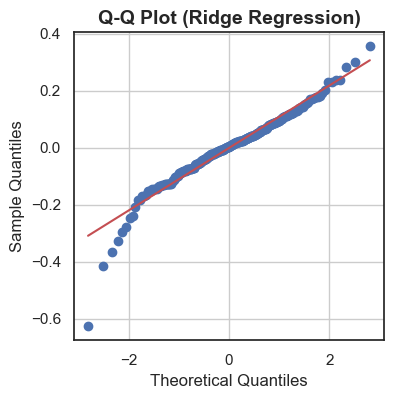

In [115]:
# Evaluate normality by comparing residuals against a theoretical normal distribution.
from scipy.stats import probplot

# Q-Q Plot
plt.figure(figsize=(4, 4), dpi=100)
probplot(ridge_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Ridge Regression)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights :
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [117]:
# Creating a DataFrame to display features and their corresponding coefficients
ridge_df = pd.DataFrame({
    'Features': x_train_scaled.columns, 
    'Coefficient': ridge_model.coef_.round(4),
    'Abs_Coefficient_Linear(Desc_Sort)': abs(ridge_model.coef_).round(4)
})

# Sorting the DataFrame by the absolute value of coefficients in descending order
ridge_df_sorted = ridge_df.sort_values(by='Abs_Coefficient_Linear(Desc_Sort)', ascending=False)

# Resetting the index of the sorted DataFrame
ridge_df_sorted.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the largest absolute coefficients
ridge_df_sorted.head(10)

Features  Coefficient  Abs_Coefficient_Linear(Desc_Sort)
0             GrLivArea       0.6127                             0.6127
1         AgeOfProperty      -0.3182                             0.3182
2           TotalBsmtSF       0.3037                             0.3037
3   Exterior1st_BrkComm      -0.2676                             0.2676
4            GarageArea       0.2070                             0.2070
5               LotArea       0.1390                             0.1390
6  Neighborhood_MeadowV      -0.1238                             0.1238
7  Neighborhood_StoneBr       0.1210                             0.1210
8   Exterior1st_BrkFace       0.0956                             0.0956
9           MSZoning_FV       0.0948                             0.0948

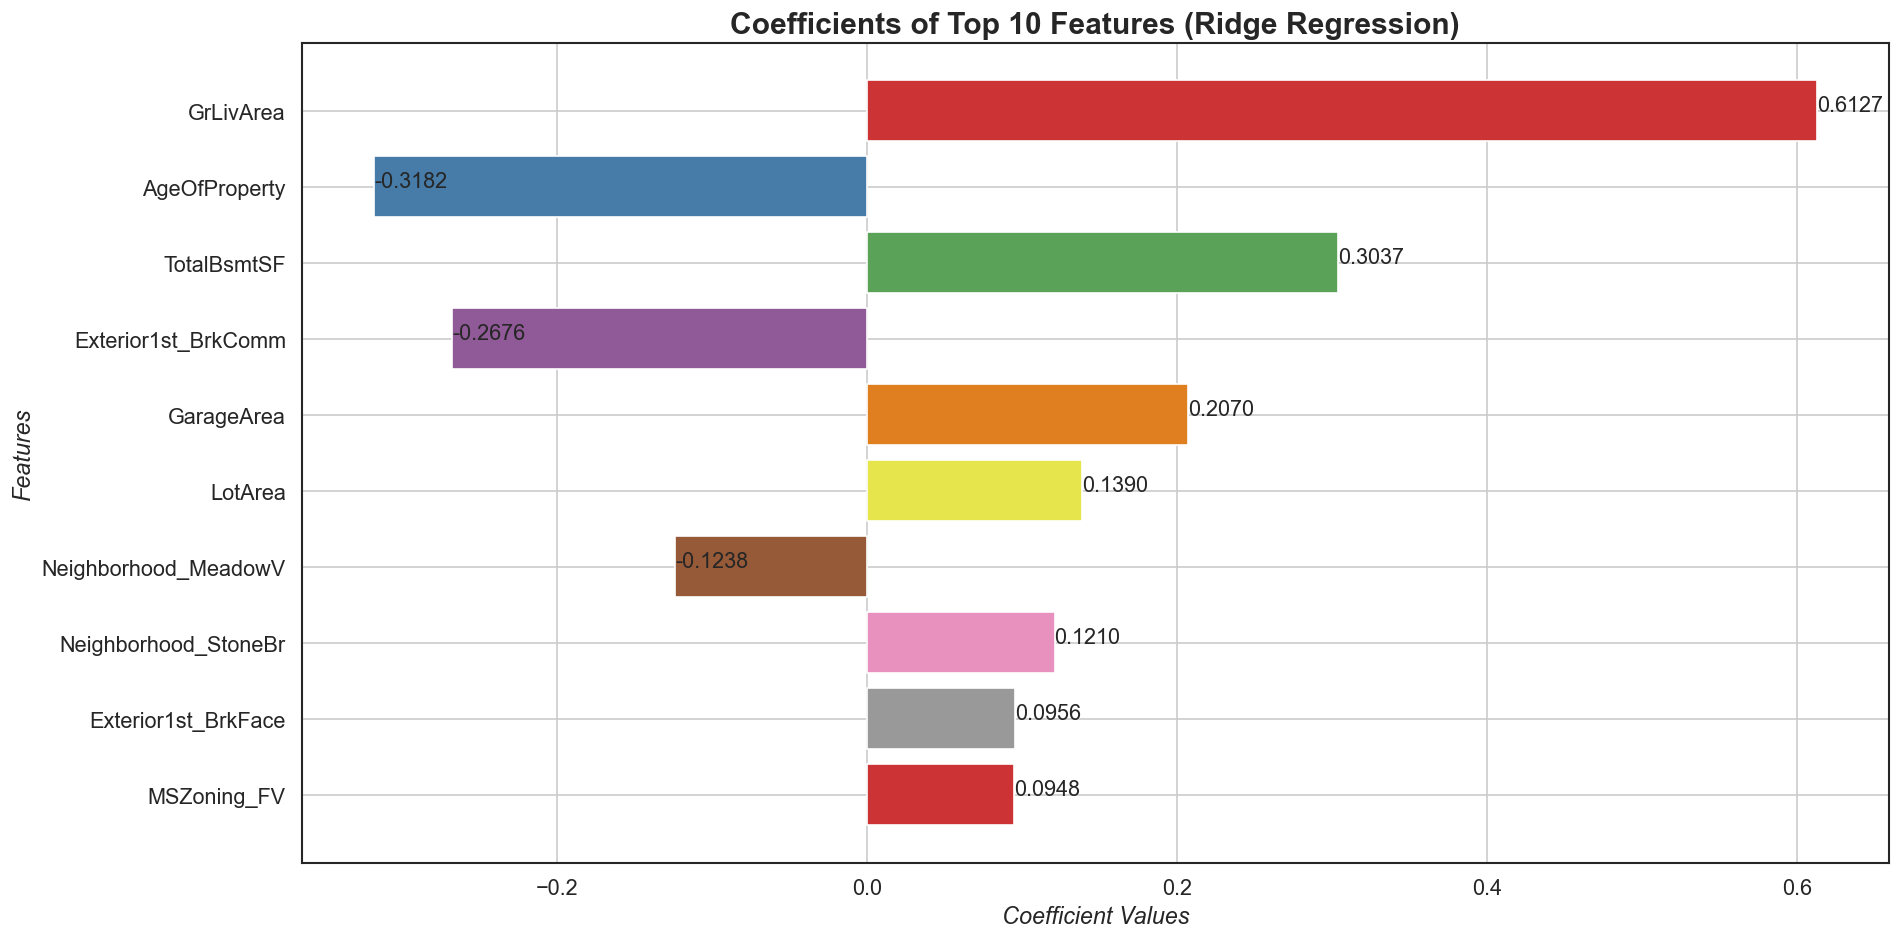

In [118]:
# Extracting the top 10 features based on the largest absolute coefficients
top10_ridge_df = ridge_df_sorted.loc[:9]

# Set Seaborn style for better visuals
sns.set(style='white')

# Create the plot with appropriate figure size and resolution
plt.figure(figsize=(16, 8), dpi=120)

# Plotting the barplot for the coefficients of the top 10 features
ax3 = sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

# Adding labels and title
plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficients of Top 10 Features (Ridge Regression)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual coefficient values
coef = top10_ridge_df['Coefficient']
for index, value in enumerate(coef):
    plt.text(value, index, f'{value:.4f}', fontsize=13)

# Additional formatting for grid and ticks
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout to ensure everything fits properly
plt.autoscale()
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the Ridge Regression model, that are significant in predicting the sale price of the house.

#### Ridge Regression With Hyperparameter Tuning

In [121]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for alpha
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                        9.0, 10.0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 50, 100, 500, 1000 ]}

# Initialize the Ridge regression model
ridge = Ridge()

# Define the number of cross-validation folds
folds = 5

# Set up GridSearchCV for Ridge Regression
ridge_model_cv = GridSearchCV(
    estimator=ridge, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error',  # Use negative MAE as the scoring metric
    cv=folds, 
    return_train_score=True, 
    verbose=3  # Display detailed progress during training
)

# Fit the model using GridSearchCV
ridge_model_cv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END alpha=0.0001;, score=(train=-0.073, test=-0.088) total time=   0.0s
[CV 2/5] END alpha=0.0001;, score=(train=-0.070, test=-0.092) total time=   0.0s
[CV 3/5] END alpha=0.0001;, score=(train=-0.072, test=-0.083) total time=   0.0s
[CV 4/5] END alpha=0.0001;, score=(train=-0.074, test=-0.086) total time=   0.0s
[CV 5/5] END alpha=0.0001;, score=(train=-0.075, test=-0.083) total time=   0.0s
[CV 1/5] END .alpha=0.001;, score=(train=-0.073, test=-0.088) total time=   0.0s
[CV 2/5] END .alpha=0.001;, score=(train=-0.070, test=-0.092) total time=   0.0s
[CV 3/5] END .alpha=0.001;, score=(train=-0.072, test=-0.083) total time=   0.0s
[CV 4/5] END .alpha=0.001;, score=(train=-0.074, test=-0.086) total time=   0.0s
[CV 5/5] END .alpha=0.001;, score=(train=-0.075, test=-0.083) total time=   0.0s
[CV 1/5] END ..alpha=0.01;, score=(train=-0.073, test=-0.088) total time=   0.0s
[CV 2/5] END ..alpha=0.01;, score=(train=-0.070

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=3)

In [122]:
# Output the best hyperparameter and corresponding score
print(f"Best Alpha (Hyperparameter) : {ridge_model_cv.best_params_['alpha']}")
print(f"Best Negative Mean Absolute Error : {ridge_model_cv.best_score_:.4f}")

Best Alpha (Hyperparameter) : 0.8
Best Negative Mean Absolute Error : -0.0850


In [123]:
# Ridge Regression with alpha = 0.8 (regularization strength)
ridge_model_HP = Ridge(alpha=0.8)
ridge_model_HP.fit(x_train_scaled, y_train)

# Predictions
ridge_train_pred_HP = ridge_model_HP.predict(x_train_scaled)
ridge_test_pred_HP = ridge_model_HP.predict(x_test_scaled)

# Training set evaluation
mae_ridge_train = mean_absolute_error(y_train, ridge_train_pred_HP)
mse_ridge_train = mean_squared_error(y_train, ridge_train_pred_HP)
rmse_ridge_train = np.sqrt(mse_ridge_train)
r2_ridge_train = r2_score(y_train, ridge_train_pred_HP)

# Testing set evaluation
mae_ridge_test = mean_absolute_error(y_test, ridge_test_pred_HP)
mse_ridge_test = mean_squared_error(y_test, ridge_test_pred_HP)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_test = r2_score(y_test, ridge_test_pred_HP)

print("For Ridge Regression With Hyperparameter Tuning Model (Original Model, alpha = 0.8) :\n","*"*40)
print("\nFor Train Set :-\nR2 score :",r2_ridge_train,"\nMSE score :",mse_ridge_train,"\nMAE score :", mae_ridge_train,\
     "\nRMSE score :",rmse_ridge_train)
print("\nFor Test Set :-\nR2 score :",r2_ridge_test,"\nMSE score :",mse_ridge_test,"\nMAE score :",mae_ridge_test,\
      "\nRMSE score :",rmse_ridge_test,"\n","*"*40)

For Ridge Regression With Hyperparameter Tuning Model (Original Model, alpha = 0.8) :
 ****************************************

For Train Set :-
R2 score : 0.9186910153837734 
MSE score : 0.01159831871416561 
MAE score : 0.07470191204538465 
RMSE score : 0.10769549068631244

For Test Set :-
R2 score : 0.9219265938893464 
MSE score : 0.012570018140743945 
MAE score : 0.08092425613361576 
RMSE score : 0.11211609224702734 
 ****************************************


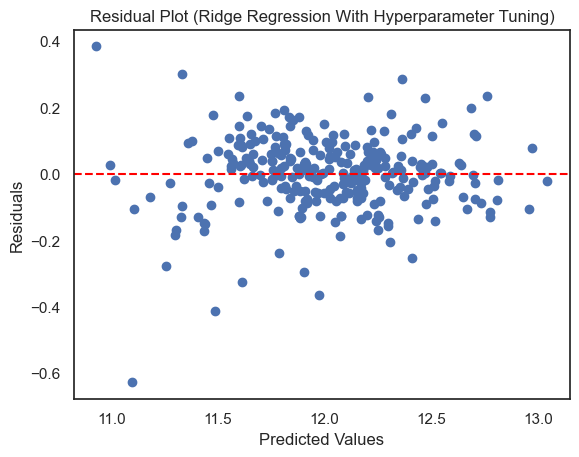

In [124]:
# Residuals for the test set
ridge_residuals_HP = y_test - ridge_test_pred_HP

plt.scatter(ridge_test_pred_HP, ridge_residuals_HP)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression With Hyperparameter Tuning)')
plt.show()

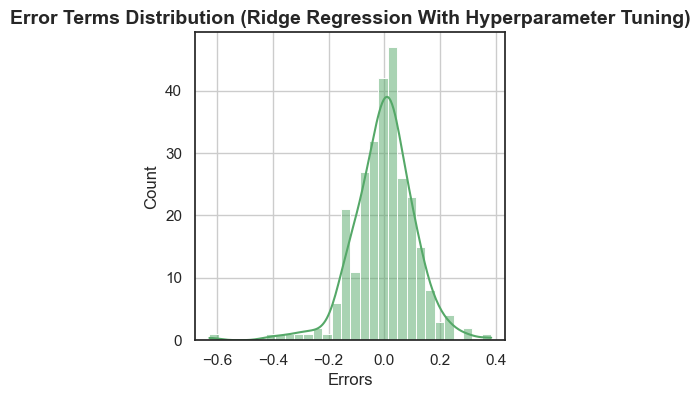

In [125]:
# Plot the histogram for Residuals (test set)
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(ridge_residuals_HP, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (Ridge Regression With Hyperparameter Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

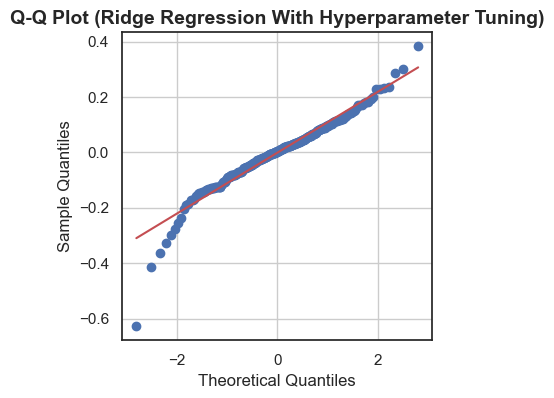

In [126]:
# Evaluate normality by comparing residuals against a theoretical normal distribution.
from scipy.stats import probplot

# Q-Q Plot
plt.figure(figsize=(4, 4), dpi=100)
probplot(ridge_residuals_HP, dist="norm", plot=plt)
plt.title('Q-Q Plot (Ridge Regression With Hyperparameter Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights :
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [128]:
# Creating a DataFrame to display features and their corresponding coefficients
ridge_df = pd.DataFrame({
    'Features': x_train_scaled.columns, 
    'Coefficient': ridge_model_HP.coef_.round(4),
    'Abs_Coefficient_Linear(Desc_Sort)': abs(ridge_model_HP.coef_).round(4)
})

# Sorting the DataFrame by the absolute value of coefficients in descending order
ridge_df_sorted = ridge_df.sort_values(by='Abs_Coefficient_Linear(Desc_Sort)', ascending=False)

# Resetting the index of the sorted DataFrame
ridge_df_sorted.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the largest absolute coefficients
ridge_df_sorted.head(10)

Features  Coefficient  Abs_Coefficient_Linear(Desc_Sort)
0             GrLivArea       0.6415                             0.6415
1         AgeOfProperty      -0.3328                             0.3328
2           TotalBsmtSF       0.3065                             0.3065
3   Exterior1st_BrkComm      -0.3012                             0.3012
4            GarageArea       0.2053                             0.2053
5               LotArea       0.1378                             0.1378
6  Neighborhood_MeadowV      -0.1259                             0.1259
7  Neighborhood_StoneBr       0.1213                             0.1213
8   Exterior1st_BrkFace       0.0972                             0.0972
9           MSZoning_FV       0.0959                             0.0959

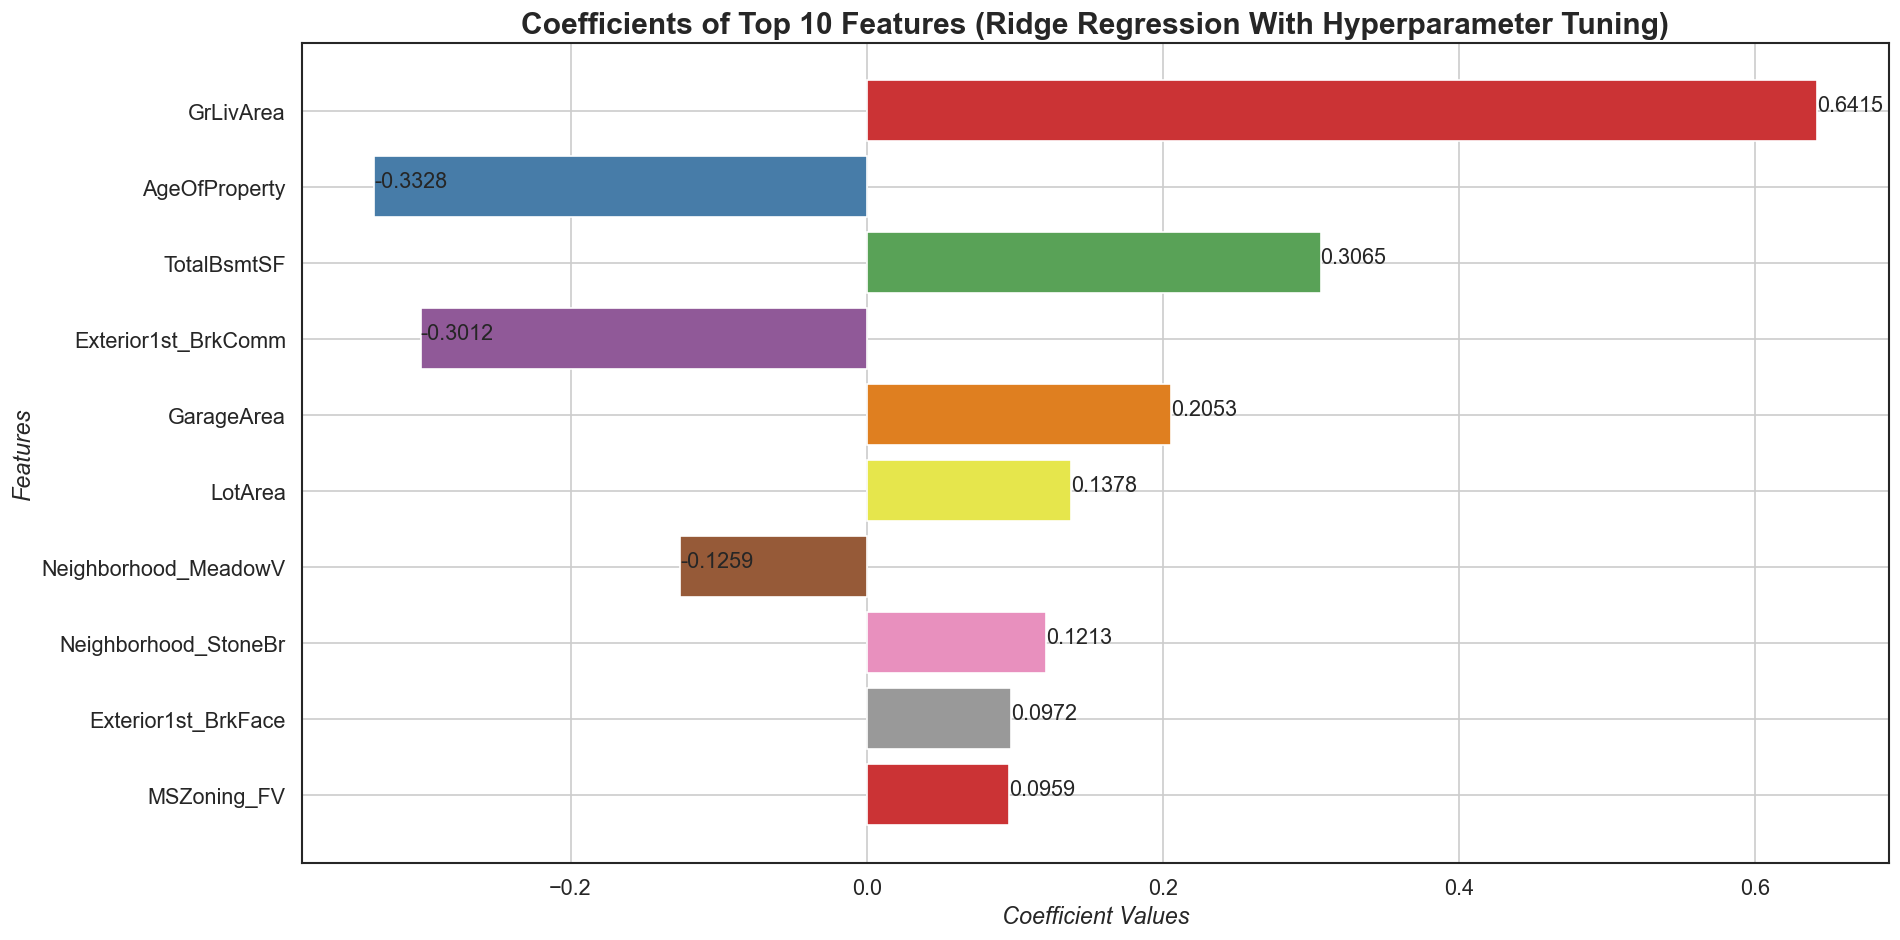

In [129]:
# Extracting the top 10 features based on the largest absolute coefficients
top10_ridge_df = ridge_df_sorted.loc[:9]

# Set Seaborn style for better visuals
sns.set(style='white')

# Create the plot with appropriate figure size and resolution
plt.figure(figsize=(16, 8), dpi=120)

# Plotting the barplot for the coefficients of the top 10 features
ax3 = sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

# Adding labels and title
plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficients of Top 10 Features (Ridge Regression With Hyperparameter Tuning)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual coefficient values
coef = top10_ridge_df['Coefficient']
for index, value in enumerate(coef):
    plt.text(value, index, f'{value:.4f}', fontsize=13)

# Additional formatting for grid and ticks
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout to ensure everything fits properly
plt.autoscale()
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the Ridge Regression model with hyperparameter tuning, that are significant in predicting the sale price of the house.

#### Lasso Regression

In [132]:
from sklearn.linear_model import Lasso

# Lasso Regression with alpha = 0.001
lasso_model = Lasso(alpha=0.001)

# Fit the model
lasso_model.fit(x_train_scaled, y_train)

# Predictions for training and testing datasets
lasso_train_pred = lasso_model.predict(x_train_scaled)
lasso_test_pred = lasso_model.predict(x_test_scaled)

# Training set evaluation
mae_lasso_train = mean_absolute_error(y_train, lasso_train_pred)
mse_lasso_train = mean_squared_error(y_train, lasso_train_pred)
rmse_lasso_train = np.sqrt(mse_lasso_train)
r2_lasso_train = r2_score(y_train, lasso_train_pred)

# Testing set evaluation
mae_lasso_test = mean_absolute_error(y_test, lasso_test_pred)
mse_lasso_test = mean_squared_error(y_test, lasso_test_pred)
rmse_lasso_test = np.sqrt(mse_lasso_test)
r2_lasso_test = r2_score(y_test, lasso_test_pred)

print("For Lasso Regression Model (Original Model, alpha = 0.001) :\n","*"*40)
print("\nFor Train Set :-\nR2 score :",r2_lasso_train,"\nMSE score :",mse_lasso_train,"\nMAE score :", mae_lasso_train,\
     "\nRMSE score :",rmse_lasso_train)
print("\nFor Test Set :-\nR2 score :",r2_lasso_test,"\nMSE score :",mse_lasso_test,"\nMAE score :",mae_lasso_test,\
      "\nRMSE score :",rmse_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model, alpha = 0.001) :
 ****************************************

For Train Set :-
R2 score : 0.9065532294679725 
MSE score : 0.013329712977668395 
MAE score : 0.08078718037677589 
RMSE score : 0.11545437617374403

For Test Set :-
R2 score : 0.9222440782305 
MSE score : 0.012518902349509647 
MAE score : 0.08296619292050036 
RMSE score : 0.1118879008182281 
 ****************************************


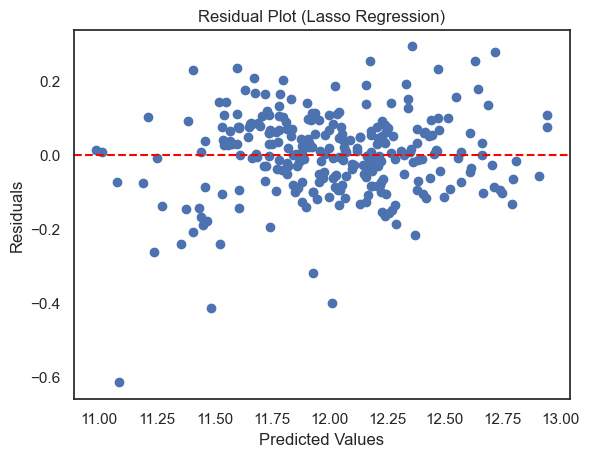

In [133]:
# Residuals for the test set
lasso_residuals = y_test - lasso_test_pred

plt.scatter(lasso_test_pred, lasso_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Lasso Regression)')
plt.show()

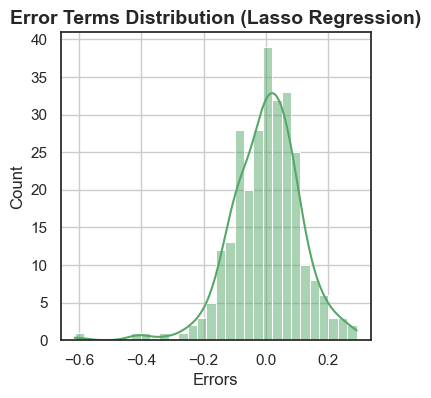

In [134]:
# Plot the histogram for Residuals (test set)
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(lasso_residuals, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (Lasso Regression)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

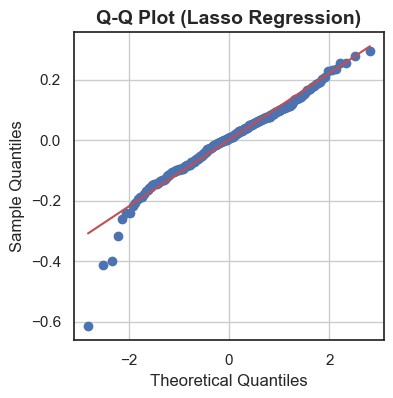

In [135]:
# Evaluate normality by comparing residuals against a theoretical normal distribution.
from scipy.stats import probplot

# Q-Q Plot
plt.figure(figsize=(4, 4), dpi=100)
probplot(lasso_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Lasso Regression)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights :
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [137]:
# Creating a DataFrame to display features and their corresponding coefficients
lasso_df = pd.DataFrame({
    'Features': x_train_scaled.columns, 
    'Coefficient': lasso_model.coef_.round(4),
    'Abs_Coefficient_Linear(Desc_Sort)': abs(lasso_model.coef_).round(4)
})

# Sorting the DataFrame by the absolute value of coefficients in descending order
lasso_df_sorted = lasso_df.sort_values(by='Abs_Coefficient_Linear(Desc_Sort)', ascending=False)

# Resetting the index of the sorted DataFrame
lasso_df_sorted.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the largest absolute coefficients
lasso_df_sorted.head(10)

Features  Coefficient  Abs_Coefficient_Linear(Desc_Sort)
0             GrLivArea       0.6727                             0.6727
1         AgeOfProperty      -0.2430                             0.2430
2           TotalBsmtSF       0.2356                             0.2356
3            GarageArea       0.2312                             0.2312
4               LotArea       0.1164                             0.1164
5           MSZoning_FV       0.0856                             0.0856
6  Neighborhood_Crawfor       0.0803                             0.0803
7           OverallQual       0.0714                             0.0714
8  Neighborhood_StoneBr       0.0649                             0.0649
9           MSZoning_RL       0.0587                             0.0587

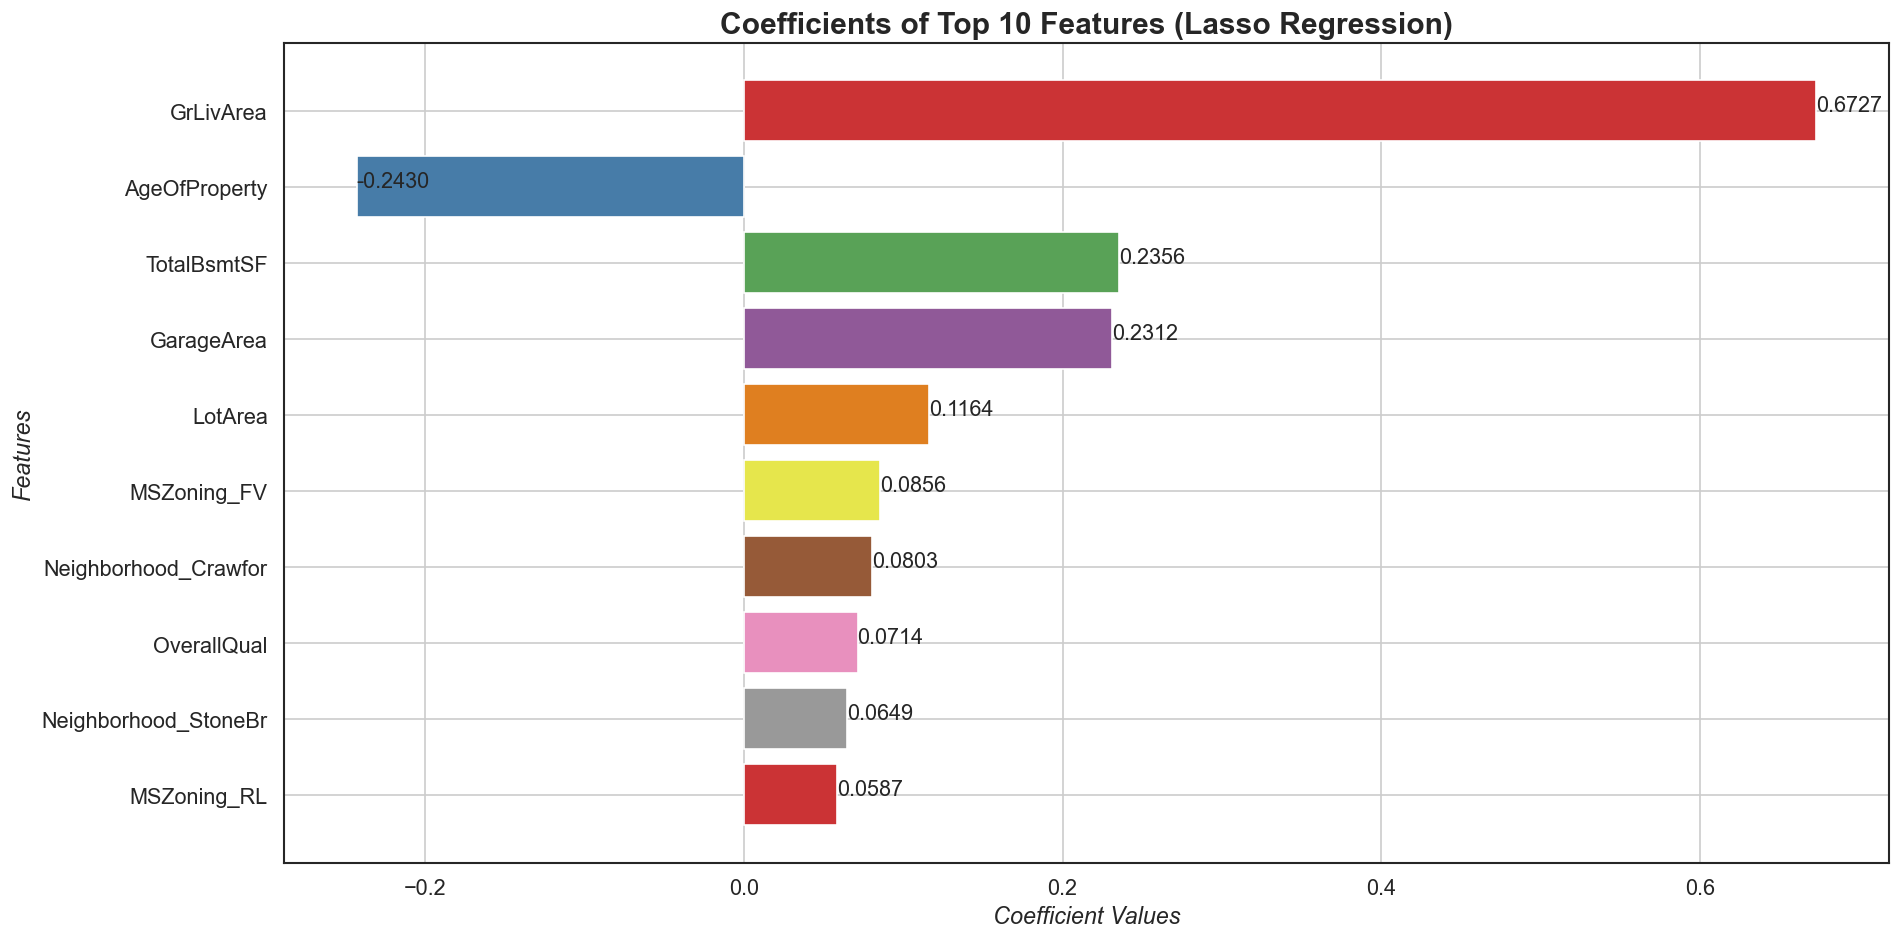

In [138]:
# Extracting the top 10 features based on the largest absolute coefficients
top10_lasso_df = lasso_df_sorted.loc[:9]

# Set Seaborn style for better visuals
sns.set(style='white')

# Create the plot with appropriate figure size and resolution
plt.figure(figsize=(16, 8), dpi=120)

# Plotting the barplot for the coefficients of the top 10 features
ax3 = sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

# Adding labels and title
plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficients of Top 10 Features (Lasso Regression)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual coefficient values
coef = top10_lasso_df['Coefficient']
for index, value in enumerate(coef):
    plt.text(value, index, f'{value:.4f}', fontsize=13)

# Additional formatting for grid and ticks
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout to ensure everything fits properly
plt.autoscale()
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the Lasso Regression model, that are significant in predicting the sale price of the house.

#### Lasso Regression With Hyperparameter Tuning

In [141]:
# Define the hyperparameter grid for alpha
param_grid = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                        0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                        0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                        8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Initialize the Ridge regression model
lasso = Lasso()

# Define the number of cross-validation folds
folds = 5

# Set up GridSearchCV for Ridge Regression
lasso_model_cv = GridSearchCV(
    estimator=lasso, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error',  # Use negative MAE as the scoring metric
    cv=folds, 
    return_train_score=True, 
    verbose=3  # Display detailed progress during training
)

# Fit the model using GridSearchCV
lasso_model_cv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .alpha=1e-05;, score=(train=-0.073, test=-0.088) total time=   0.0s
[CV 2/5] END .alpha=1e-05;, score=(train=-0.070, test=-0.091) total time=   0.0s
[CV 3/5] END .alpha=1e-05;, score=(train=-0.072, test=-0.083) total time=   0.0s
[CV 4/5] END .alpha=1e-05;, score=(train=-0.074, test=-0.085) total time=   0.0s
[CV 5/5] END .alpha=1e-05;, score=(train=-0.075, test=-0.083) total time=   0.0s
[CV 1/5] END alpha=0.0001;, score=(train=-0.074, test=-0.086) total time=   0.0s
[CV 2/5] END alpha=0.0001;, score=(train=-0.071, test=-0.088) total time=   0.0s
[CV 3/5] END alpha=0.0001;, score=(train=-0.073, test=-0.082) total time=   0.0s
[CV 4/5] END alpha=0.0001;, score=(train=-0.074, test=-0.083) total time=   0.0s
[CV 5/5] END alpha=0.0001;, score=(train=-0.075, test=-0.081) total time=   0.0s
[CV 1/5] END alpha=0.0002;, score=(train=-0.074, test=-0.084) total time=   0.0s
[CV 2/5] END alpha=0.0002;, score=(train=-0.072

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=3)

In [142]:
# Output the best hyperparameter and corresponding score
print(f"Best Alpha (Hyperparameter) : {lasso_model_cv.best_params_['alpha']}")
print(f"Best Negative Mean Absolute Error : {lasso_model_cv.best_score_:.4f}")

Best Alpha (Hyperparameter) : 0.0003
Best Negative Mean Absolute Error : -0.0821


In [143]:
# Lasso Regression with alpha = 0.0003 (regularization strength)
lasso_model_HP = Lasso(alpha=0.0003)
lasso_model_HP.fit(x_train_scaled, y_train)

# Predictions
lasso_train_pred_HP = lasso_model_HP.predict(x_train_scaled)
lasso_test_pred_HP = lasso_model_HP.predict(x_test_scaled)

# Training set evaluation
mae_lasso_train = mean_absolute_error(y_train, lasso_train_pred_HP)
mse_lasso_train = mean_squared_error(y_train, lasso_train_pred_HP)
rmse_lasso_train = np.sqrt(mse_lasso_train)
r2_lasso_train = r2_score(y_train, lasso_train_pred_HP)

# Testing set evaluation
mae_lasso_test = mean_absolute_error(y_test, lasso_test_pred_HP)
mse_lasso_test = mean_squared_error(y_test, lasso_test_pred_HP)
rmse_lasso_test = np.sqrt(mse_lasso_test)
r2_lasso_test = r2_score(y_test, lasso_test_pred_HP)

print("For Lasso Regression With Hyperparameter Tuning Model (Original Model, alpha = 0.0003) :\n","*"*40)
print("\nFor Train Set :-\nR2 score :",r2_lasso_train,"\nMSE score :",mse_lasso_train,"\nMAE score :", mae_lasso_train,\
     "\nRMSE score :",rmse_lasso_train)
print("\nFor Test Set :-\nR2 score :",r2_lasso_test,"\nMSE score :",mse_lasso_test,"\nMAE score :",mae_lasso_test,\
      "\nRMSE score :",rmse_lasso_test,"\n","*"*40)

For Lasso Regression With Hyperparameter Tuning Model (Original Model, alpha = 0.0003) :
 ****************************************

For Train Set :-
R2 score : 0.9159204655377389 
MSE score : 0.01199352374937126 
MAE score : 0.07514939055676867 
RMSE score : 0.10951494760703336

For Test Set :-
R2 score : 0.925614599621886 
MSE score : 0.011976239781753354 
MAE score : 0.08026195500820046 
RMSE score : 0.10943600770200526 
 ****************************************


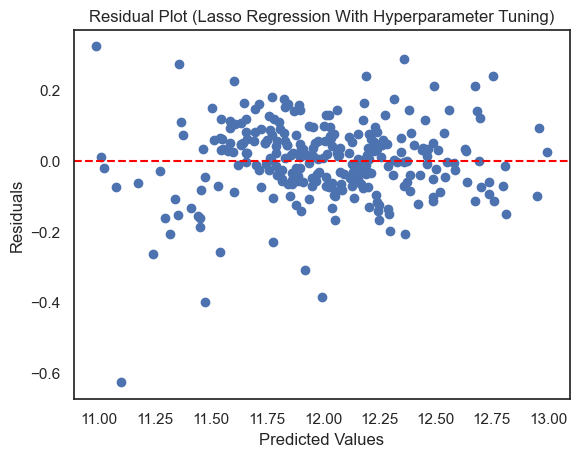

In [144]:
# Residuals for the test set
lasso_residuals_HP = y_test - lasso_test_pred_HP

plt.scatter(lasso_test_pred_HP, lasso_residuals_HP)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Lasso Regression With Hyperparameter Tuning)')
plt.show()

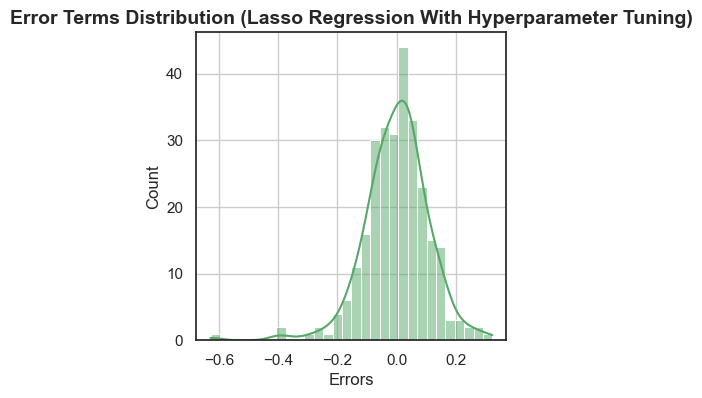

In [145]:
# Plot the histogram for Residuals (test set)
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(lasso_residuals_HP, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (Lasso Regression With Hyperparameter Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

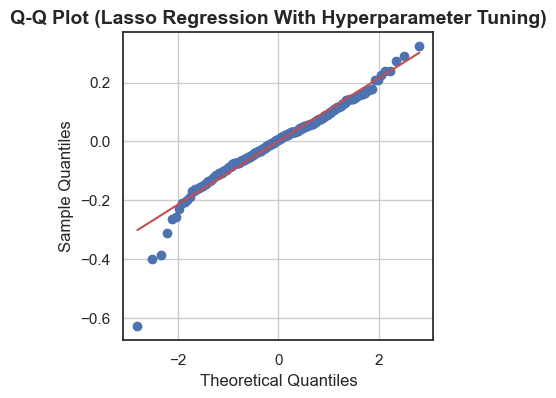

In [146]:
# Evaluate normality by comparing residuals against a theoretical normal distribution.
from scipy.stats import probplot

# Q-Q Plot
plt.figure(figsize=(4, 4), dpi=100)
probplot(lasso_residuals_HP, dist="norm", plot=plt)
plt.title('Q-Q Plot (Lasso Regression With Hyperparameter Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights :
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [148]:
# Creating a DataFrame to display features and their corresponding coefficients
lasso_df = pd.DataFrame({
    'Features': x_train_scaled.columns, 
    'Coefficient': lasso_model_HP.coef_.round(4),
    'Abs_Coefficient_Linear(Desc_Sort)': abs(lasso_model_HP.coef_).round(4)
})

# Sorting the DataFrame by the absolute value of coefficients in descending order
lasso_df_sorted = lasso_df.sort_values(by='Abs_Coefficient_Linear(Desc_Sort)', ascending=False)

# Resetting the index of the sorted DataFrame
lasso_df_sorted.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the largest absolute coefficients
lasso_df_sorted.head(10)

Features  Coefficient  Abs_Coefficient_Linear(Desc_Sort)
0             GrLivArea       0.7528                             0.7528
1         AgeOfProperty      -0.3380                             0.3380
2           TotalBsmtSF       0.2809                             0.2809
3   Exterior1st_BrkComm      -0.2518                             0.2518
4            GarageArea       0.2132                             0.2132
5               LotArea       0.1206                             0.1206
6  Neighborhood_StoneBr       0.1178                             0.1178
7           MSZoning_FV       0.1098                             0.1098
8  Neighborhood_Crawfor       0.0981                             0.0981
9        MSSubClass_160      -0.0745                             0.0745

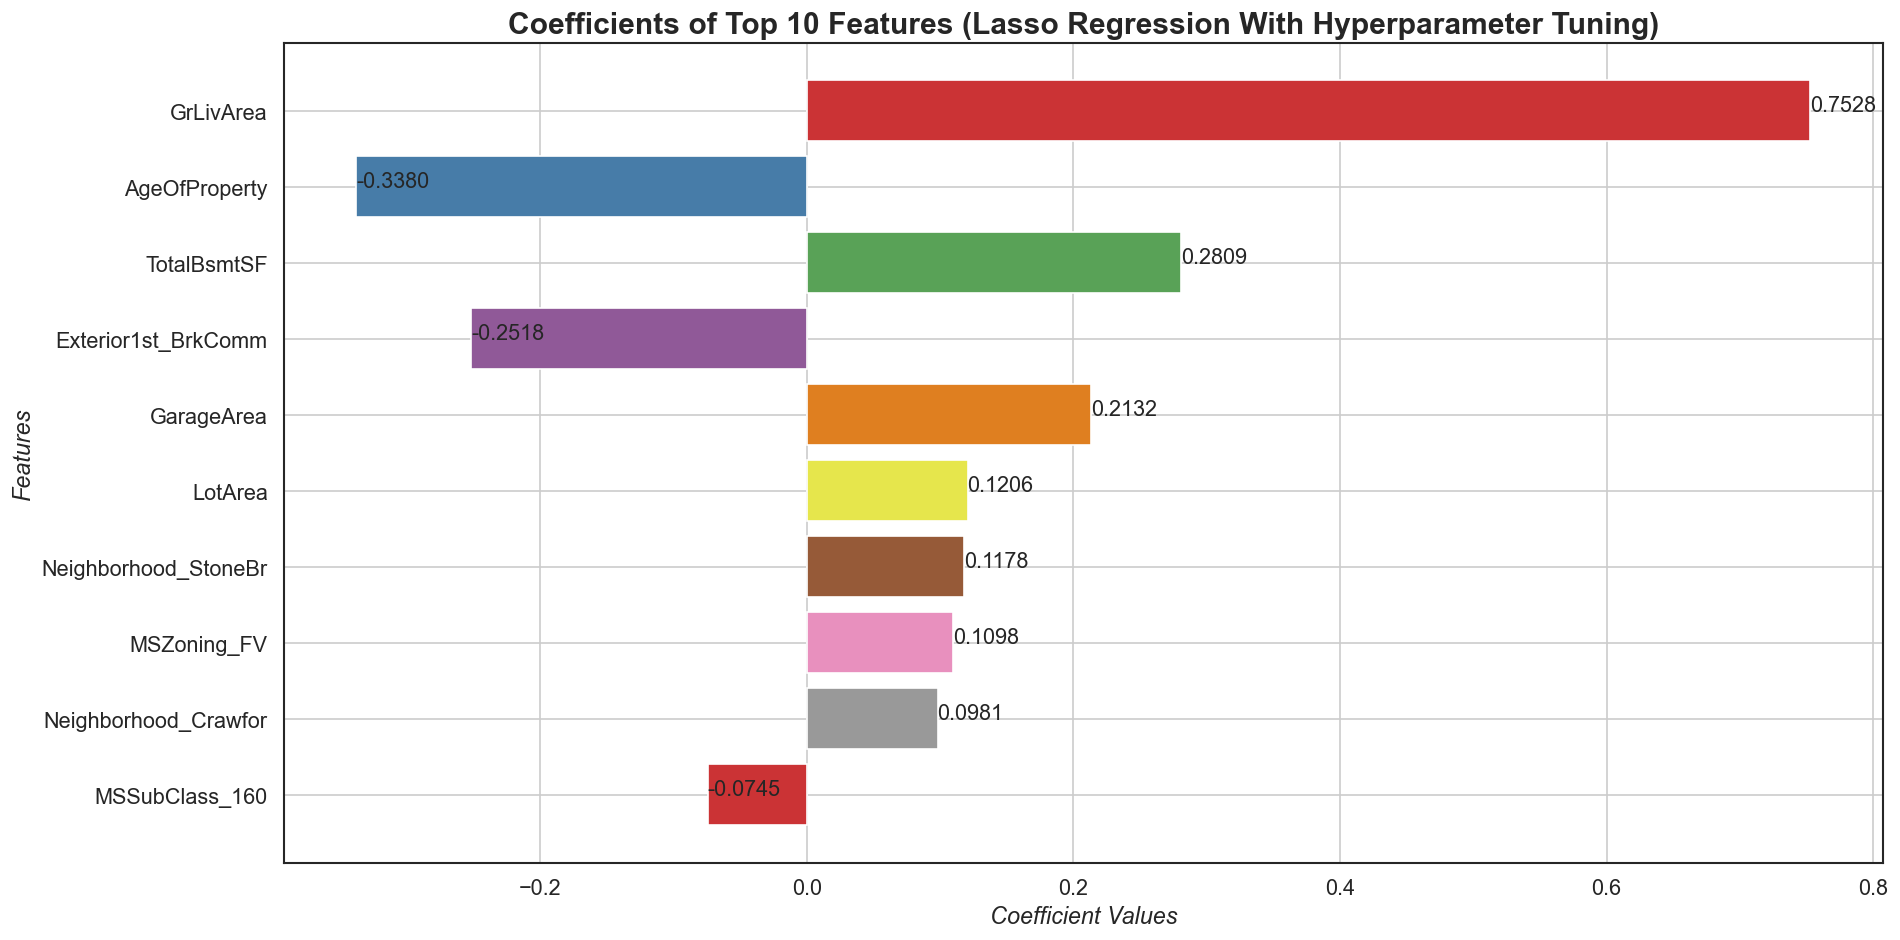

In [149]:
# Extracting the top 10 features based on the largest absolute coefficients
top10_lasso_df = lasso_df_sorted.loc[:9]

# Set Seaborn style for better visuals
sns.set(style='white')

# Create the plot with appropriate figure size and resolution
plt.figure(figsize=(16, 8), dpi=120)

# Plotting the barplot for the coefficients of the top 10 features
ax3 = sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

# Adding labels and title
plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficients of Top 10 Features (Lasso Regression With Hyperparameter Tuning)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual coefficient values
coef = top10_lasso_df['Coefficient']
for index, value in enumerate(coef):
    plt.text(value, index, f'{value:.4f}', fontsize=13)

# Additional formatting for grid and ticks
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout to ensure everything fits properly
plt.autoscale()
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the Lasso Regression model with hyperparameter tuning, that are significant in predicting the sale price of the house.

#### Support Vector Regressor (SVR)

In [152]:
from sklearn.svm import SVR

# Initialize and train SVR
svr_model = SVR(kernel='linear')  
svr_model.fit(x_train_scaled, y_train)

# Predictions on train and test data
svr_train_pred = svr_model.predict(x_train_scaled)
svr_test_pred = svr_model.predict(x_test_scaled)

# Training set evaluation
mae_svr_train = mean_absolute_error(y_train, svr_train_pred)
mse_svr_train = mean_squared_error(y_train, svr_train_pred)
rmse_svr_train = np.sqrt(mse_svr_train)
r2_svr_train = r2_score(y_train, svr_train_pred)

# Testing set evaluation
mae_svr_test = mean_absolute_error(y_test, svr_test_pred)
mse_svr_test = mean_squared_error(y_test, svr_test_pred)
rmse_svr_test = np.sqrt(mse_svr_test)
r2_svr_test = r2_score(y_test, svr_test_pred)

print("For Support Vector Regressor Model (Original Model) :\n","*"*40)
print("\nFor Train Set :-\nR2 score :",r2_svr_train,"\nMSE score :",mse_svr_train,"\nMAE score :", mae_svr_train,\
     "\nRMSE score :",rmse_svr_train)
print("\nFor Test Set :-\nR2 score :",r2_svr_test,"\nMSE score :",mse_svr_test,"\nMAE score :",mae_svr_test,\
      "\nRMSE score :",rmse_svr_test,"\n","*"*40)

For Support Vector Regressor Model (Original Model) :
 ****************************************

For Train Set :-
R2 score : 0.9148548442228577 
MSE score : 0.012145529283531301 
MAE score : 0.07593940513277886 
RMSE score : 0.11020675697765224

For Test Set :-
R2 score : 0.920200153668391 
MSE score : 0.012847979433550389 
MAE score : 0.08104286732315955 
RMSE score : 0.11334892780062099 
 ****************************************


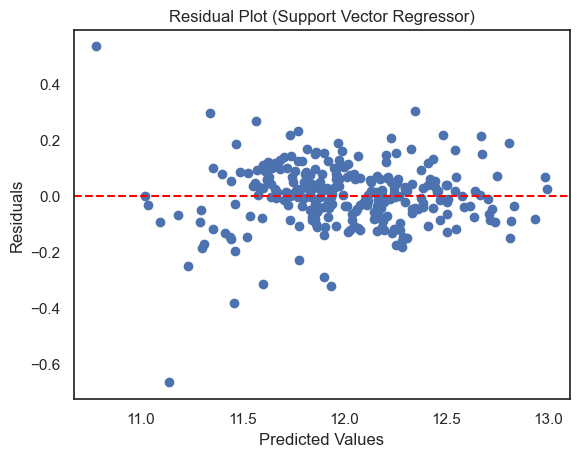

In [153]:
# Residuals for the test set
svr_residuals = y_test - svr_test_pred

plt.scatter(svr_test_pred, svr_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Support Vector Regressor)')
plt.show()

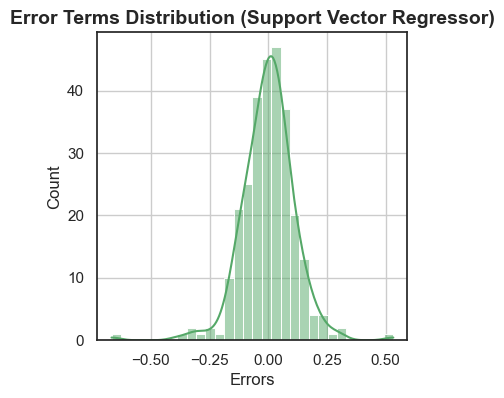

In [154]:
# Plot the histogram for Residuals (test set)
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(svr_residuals, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (Support Vector Regressor)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

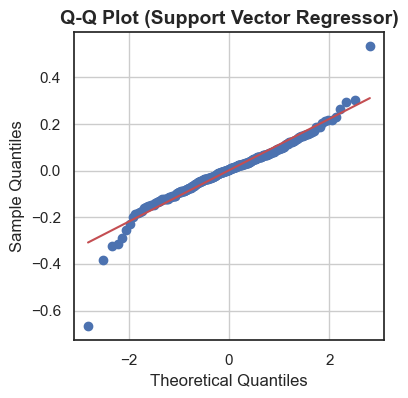

In [155]:
# Evaluate normality by comparing residuals against a theoretical normal distribution.
from scipy.stats import probplot

# Q-Q Plot
plt.figure(figsize=(4, 4), dpi=100)
probplot(svr_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Support Vector Regressor)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights :
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [157]:
# Flatten the 2D array to 1D
coefficients = svr_model.coef_.flatten()  # Converts (1, 107) to a 1D array with 107 elements
abs_coefficients = abs(coefficients)  # Absolute values of the coefficients

# Creating a DataFrame to display features and their corresponding coefficients
svr_df = pd.DataFrame({
    'Features' : x_train_scaled.columns, 
    'Coefficient' : coefficients.round(4),
    'Abs_Coefficient_Linear(Desc_Sort)' : abs_coefficients.round(4)
})

# Sorting the DataFrame by the absolute value of coefficients in descending order
svr_df_sorted = svr_df.sort_values(by='Abs_Coefficient_Linear(Desc_Sort)', ascending=False)

# Resetting the index of the sorted DataFrame
svr_df_sorted.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the largest absolute coefficients
print(svr_df_sorted.head(10))

               Features  Coefficient  Abs_Coefficient_Linear(Desc_Sort)
0             GrLivArea       0.7502                             0.7502
1   Exterior1st_BrkComm      -0.4575                             0.4575
2         AgeOfProperty      -0.3684                             0.3684
3           TotalBsmtSF       0.2912                             0.2912
4            GarageArea       0.2226                             0.2226
5               LotArea       0.1621                             0.1621
6       Foundation_Wood      -0.1454                             0.1454
7   Exterior1st_BrkFace       0.1366                             0.1366
8  Neighborhood_MeadowV      -0.1194                             0.1194
9  Neighborhood_StoneBr       0.1149                             0.1149


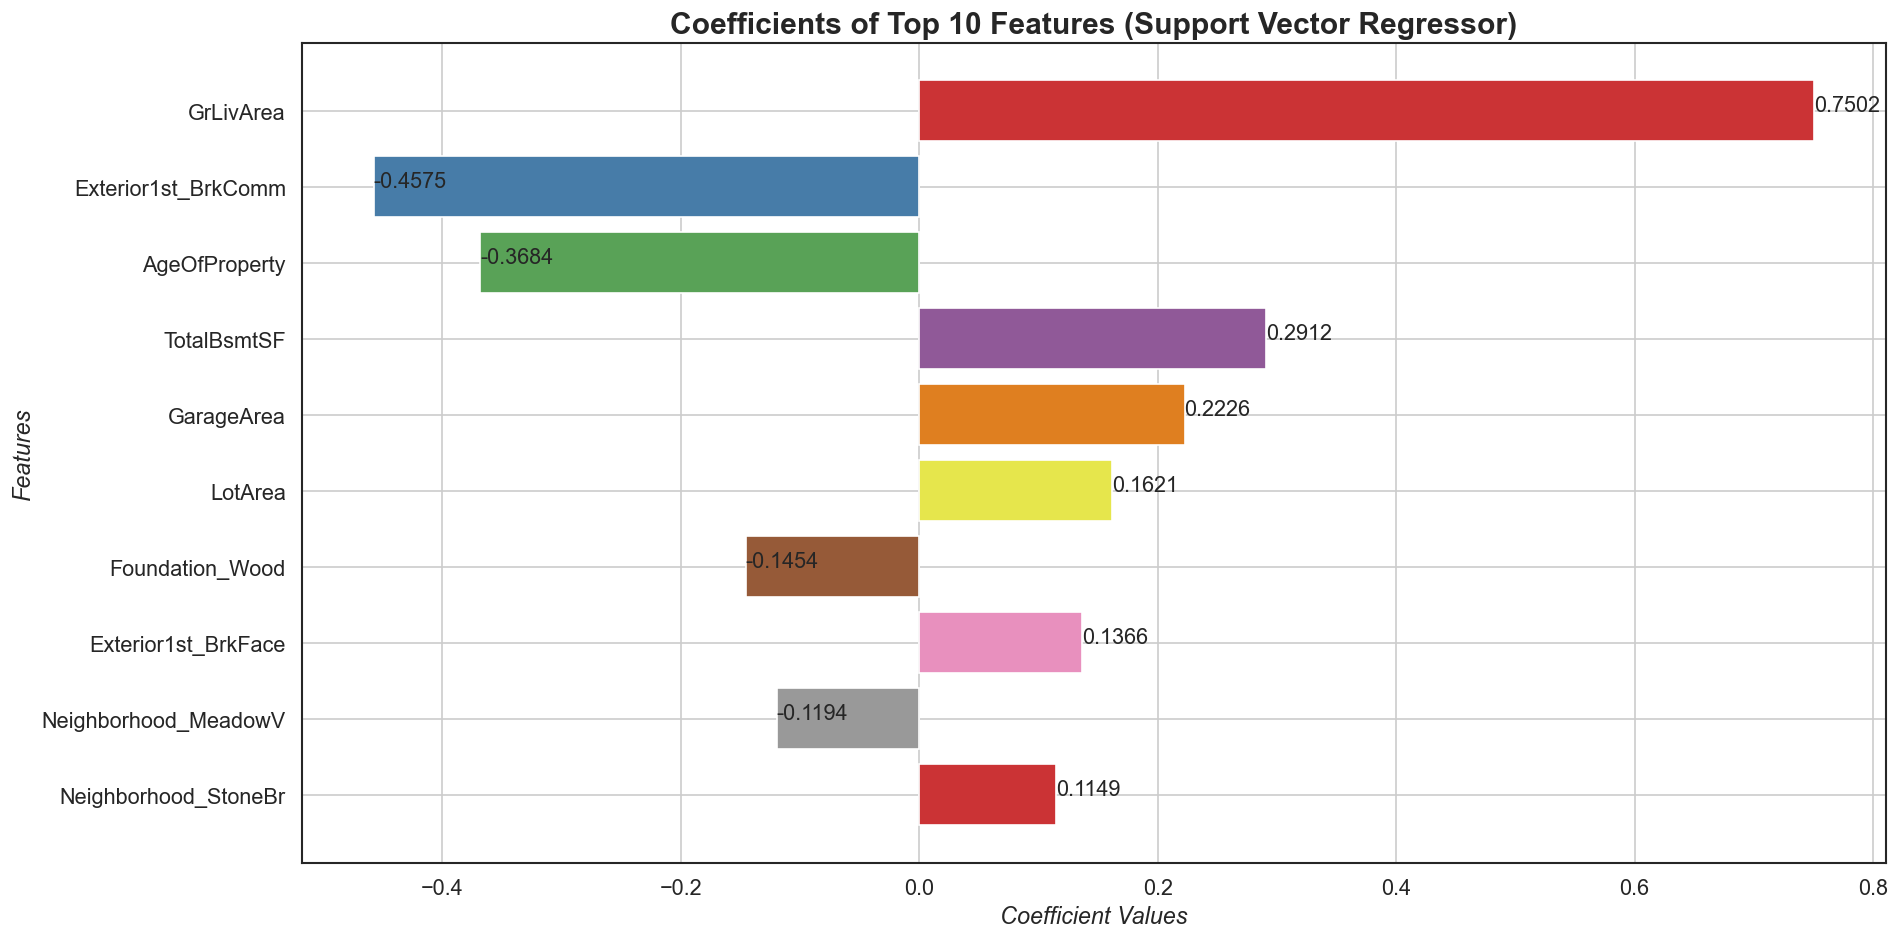

In [158]:
# Extracting the top 10 features based on the largest absolute coefficients
top10_svr_df = svr_df_sorted.loc[:9]

# Set Seaborn style for better visuals
sns.set(style='white')

# Create the plot with appropriate figure size and resolution
plt.figure(figsize=(16, 8), dpi=120)

# Plotting the barplot for the coefficients of the top 10 features
ax3 = sns.barplot(y=top10_svr_df['Features'], x=top10_svr_df['Coefficient'], palette='Set1')

# Adding labels and title
plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficients of Top 10 Features (Support Vector Regressor)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual coefficient values
coef = top10_svr_df['Coefficient']
for index, value in enumerate(coef):
    plt.text(value, index, f'{value:.4f}', fontsize=13)

# Additional formatting for grid and ticks
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout to ensure everything fits properly
plt.autoscale()
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the Supprot Vector Regressor model, that are significant in predicting the sale price of the house.

#### SVR With Hyperparameter Tuning

In [161]:
# Define the hyperparameter grid for C and epsilon
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1],  # Epsilon parameter for the margin of tolerance
    'gamma': ['scale', 'auto', 0.1, 1]  # Gamma for the rbf kernel, scale and auto are common values
}

# Initialize the SVR model
svr = SVR()

# Define the number of cross-validation folds
folds = 5

# Set up GridSearchCV for SVR
svr_model_cv = GridSearchCV(
    estimator=svr, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error',  # Use negative MAE as the scoring metric
    cv=folds, 
    return_train_score=True, 
    verbose=3  # Display detailed progress during training
)

# Fit the model using GridSearchCV
svr_model_cv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=scale;, score=(train=-0.106, test=-0.115) total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=scale;, score=(train=-0.108, test=-0.104) total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=scale;, score=(train=-0.105, test=-0.116) total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=scale;, score=(train=-0.109, test=-0.108) total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=scale;, score=(train=-0.106, test=-0.116) total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=auto;, score=(train=-0.103, test=-0.113) total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=auto;, score=(train=-0.104, test=-0.103) total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=auto;, score=(train=-0.102, test=-0.115) total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=auto;, score=(train=-0.105, test=-0.105) total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.01

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
                         'gamma': ['scale', 'auto', 0.1, 1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=3)

In [162]:
# Output the best hyperparameter and corresponding score
print(f"Best Alpha (Hyperparameter) : {svr_model_cv.best_params_}")
print(f"Best Negative Mean Absolute Error : {svr_model_cv.best_score_:.4f}")

Best Alpha (Hyperparameter) : {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}
Best Negative Mean Absolute Error : -0.0829


In [163]:
# SVR with kernel='linear', C=10, epsilon=0.01, gamma='scale' (regularization strength)
svr_model_HP = SVR(kernel='linear', C=10, epsilon=0.01, gamma='scale')
svr_model_HP.fit(x_train_scaled, y_train)

# Predictions
svr_train_pred_HP = svr_model_HP.predict(x_train_scaled)
svr_test_pred_HP = svr_model_HP.predict(x_test_scaled)

# Training set evaluation
mae_svr_train = mean_absolute_error(y_train, svr_train_pred_HP)
mse_svr_train = mean_squared_error(y_train, svr_train_pred_HP)
rmse_svr_train = np.sqrt(mse_svr_train)
r2_svr_train = r2_score(y_train, svr_train_pred_HP)

# Testing set evaluation
mae_svr_test = mean_absolute_error(y_test, svr_test_pred_HP)
mse_svr_test = mean_squared_error(y_test, svr_test_pred_HP)
rmse_svr_test = np.sqrt(mse_svr_test)
r2_svr_test = r2_score(y_test, svr_test_pred_HP)

print("For Support Vector Regressor With Hyperparameter Tuning Model (Original Model, {kernel='linear', C=10, epsilon=0.01, gamma='scale'}) :\n","*"*40)
print("\nFor Train Set :-\nR2 score :",r2_svr_train,"\nMSE score :",mse_svr_train,"\nMAE score :", mae_svr_train,\
     "\nRMSE score :",rmse_svr_train)
print("\nFor Test Set :-\nR2 score :",r2_svr_test,"\nMSE score :",mse_svr_test,"\nMAE score :",mae_svr_test,\
      "\nRMSE score :",rmse_svr_test,"\n","*"*40)

For Support Vector Regressor With Hyperparameter Tuning Model (Original Model, {kernel='linear', C=10, epsilon=0.01, gamma='scale'}) :
 ****************************************

For Train Set :-
R2 score : 0.9124114746705054 
MSE score : 0.012494063691363702 
MAE score : 0.06980737698648729 
RMSE score : 0.11177684774300849

For Test Set :-
R2 score : 0.9100290484951069 
MSE score : 0.014485553390018892 
MAE score : 0.08261766172030202 
RMSE score : 0.1203559445562158 
 ****************************************


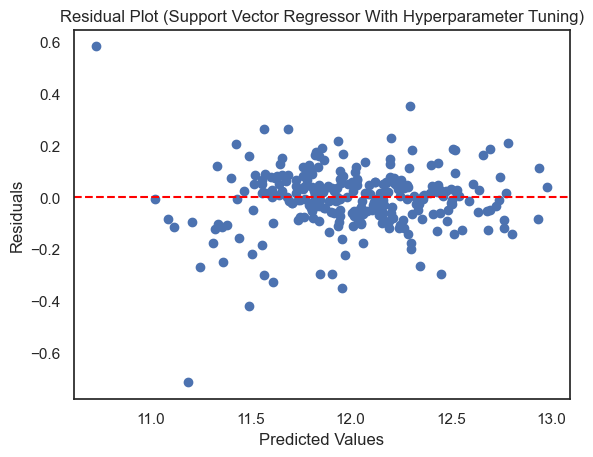

In [164]:
# Residuals for the test set
svr_residuals_HP = y_test - svr_test_pred_HP

plt.scatter(svr_test_pred_HP, svr_residuals_HP)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Support Vector Regressor With Hyperparameter Tuning)')
plt.show()

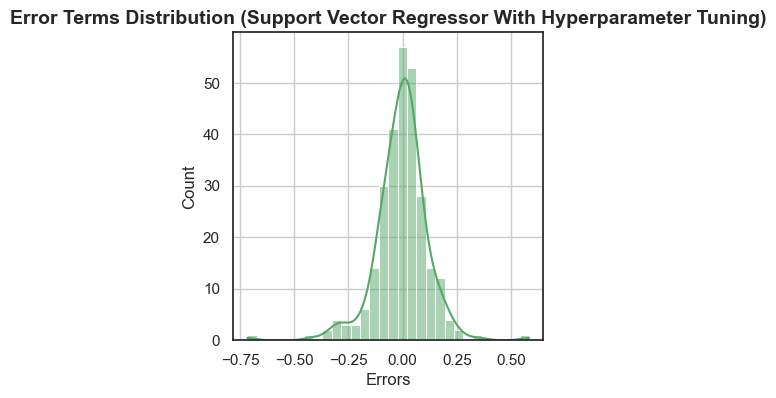

In [165]:
# Plot the histogram for Residuals (test set)
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(svr_residuals_HP, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (Support Vector Regressor With Hyperparameter Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

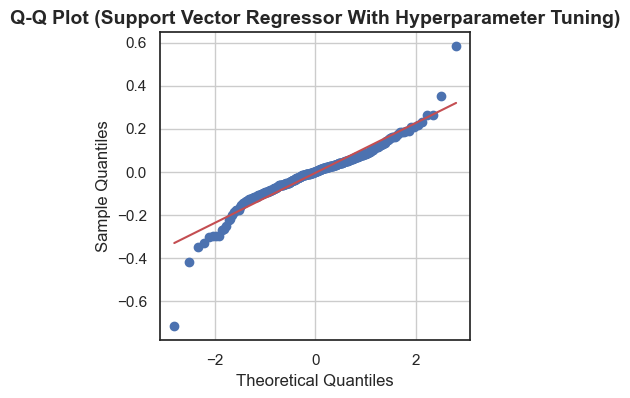

In [166]:
# Evaluate normality by comparing residuals against a theoretical normal distribution.
from scipy.stats import probplot

# Q-Q Plot
plt.figure(figsize=(4, 4), dpi=100)
probplot(svr_residuals_HP, dist="norm", plot=plt)
plt.title('Q-Q Plot (Support Vector Regressor With Hyperparameter Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights :
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [168]:
# Flatten the 2D array to 1D
coefficients = svr_model_HP.coef_.flatten()  # Converts (1, 107) to a 1D array with 107 elements
abs_coefficients = abs(coefficients)  # Absolute values of the coefficients

# Creating a DataFrame to display features and their corresponding coefficients
svr_df = pd.DataFrame({
    'Features' : x_train_scaled.columns, 
    'Coefficient' : coefficients.round(4),
    'Abs_Coefficient_Linear(Desc_Sort)' : abs_coefficients.round(4)
})

# Sorting the DataFrame by the absolute value of coefficients in descending order
svr_df_sorted = svr_df.sort_values(by='Abs_Coefficient_Linear(Desc_Sort)', ascending=False)

# Resetting the index of the sorted DataFrame
svr_df_sorted.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the largest absolute coefficients
print(svr_df_sorted.head(10))

               Features  Coefficient  Abs_Coefficient_Linear(Desc_Sort)
0             GrLivArea       0.8044                             0.8044
1   Exterior1st_BrkComm      -0.6118                             0.6118
2         AgeOfProperty      -0.4807                             0.4807
3           TotalBsmtSF       0.3572                             0.3572
4            GarageArea       0.2167                             0.2167
5               LotArea       0.1721                             0.1721
6  Neighborhood_MeadowV      -0.1604                             0.1604
7   Exterior1st_BrkFace       0.1526                             0.1526
8             BsmtUnfSF      -0.1416                             0.1416
9    Exterior1st_Stucco       0.1082                             0.1082


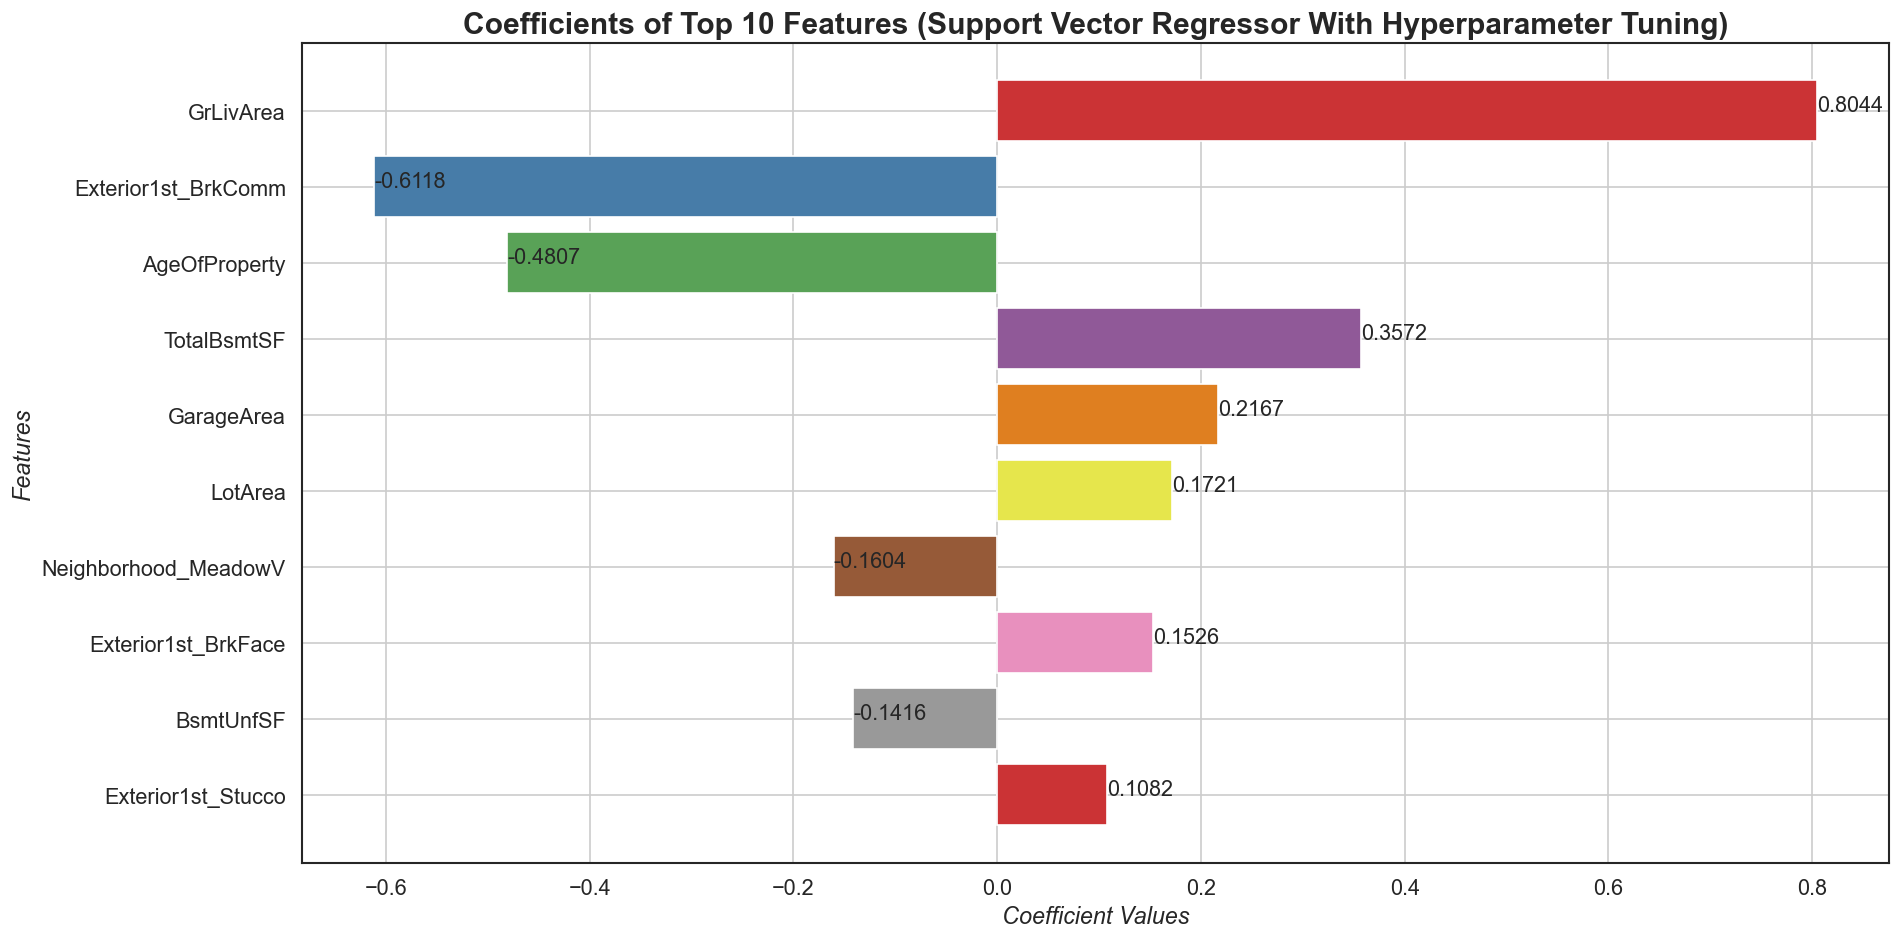

In [169]:
# Extracting the top 10 features based on the largest absolute coefficients
top10_svr_df = svr_df_sorted.loc[:9]

# Set Seaborn style for better visuals
sns.set(style='white')

# Create the plot with appropriate figure size and resolution
plt.figure(figsize=(16, 8), dpi=120)

# Plotting the barplot for the coefficients of the top 10 features
ax3 = sns.barplot(y=top10_svr_df['Features'], x=top10_svr_df['Coefficient'], palette='Set1')

# Adding labels and title
plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficients of Top 10 Features (Support Vector Regressor With Hyperparameter Tuning)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual coefficient values
coef = top10_svr_df['Coefficient']
for index, value in enumerate(coef):
    plt.text(value, index, f'{value:.4f}', fontsize=13)

# Additional formatting for grid and ticks
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout to ensure everything fits properly
plt.autoscale()
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the SVR model with hyperparameter tuning, that are significant in predicting the sale price of the house.

#### Random Forest Regressor

In [172]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)  # You can tune the parameters as needed
rf_model.fit(x_train, y_train)

# Predictions on train and test data
rf_train_pred = rf_model.predict(x_train)
rf_test_pred = rf_model.predict(x_test)

# Training set evaluation
mae_rf_train = mean_absolute_error(y_train, rf_train_pred)
mse_rf_train = mean_squared_error(y_train, rf_train_pred)
rmse_rf_train = np.sqrt(mse_rf_train)
r2_rf_train = r2_score(y_train, rf_train_pred)

# Testing set evaluation
mae_rf_test = mean_absolute_error(y_test, rf_test_pred)
mse_rf_test = mean_squared_error(y_test, rf_test_pred)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, rf_test_pred)

print("For Random Forest Regressor Model :\n","*"*40)
print("\nFor Train Set :-\nR2 score :",r2_rf_train,"\nMSE score :",mse_rf_train,"\nMAE score :", mae_rf_train,\
     "\nRMSE score :",rmse_rf_train)
print("\nFor Test Set :-\nR2 score :",r2_rf_test,"\nMSE score :",mse_rf_test,"\nMAE score :",mae_rf_test,\
      "\nRMSE score :",rmse_rf_test,"\n","*"*40)

For Random Forest Regressor Model :
 ****************************************

For Train Set :-
R2 score : 0.9811278649685484 
MSE score : 0.002692015377447763 
MAE score : 0.03569924405369887 
RMSE score : 0.05188463527334237

For Test Set :-
R2 score : 0.8894116397995678 
MSE score : 0.017805008941256775 
MAE score : 0.09543594244651761 
RMSE score : 0.13343541112184867 
 ****************************************


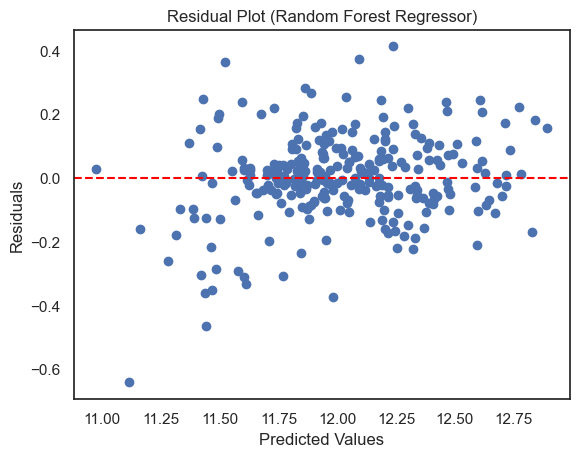

In [173]:
# Residuals for the test set
rf_residuals = y_test - rf_test_pred

# Plotting Residuals vs Predicted Values
plt.scatter(rf_test_pred, rf_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regressor)')
plt.show()

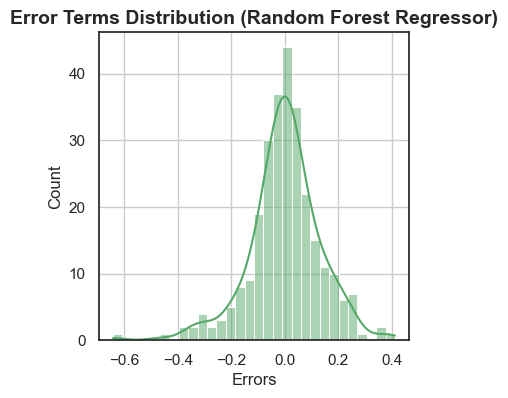

In [174]:
# Plot the histogram for Residuals (test set)
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(rf_residuals, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (Random Forest Regressor)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

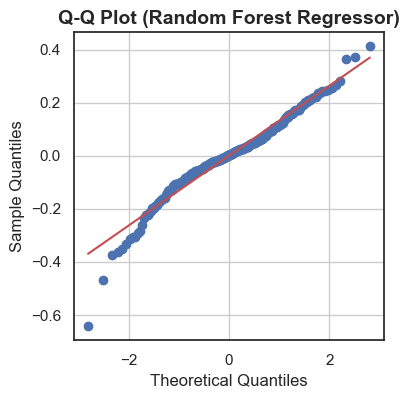

In [175]:
# Evaluate normality by comparing residuals against a theoretical normal distribution.
# Q-Q Plot
plt.figure(figsize=(4, 4), dpi=100)
probplot(rf_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Random Forest Regressor)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights:
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [177]:
# Creating a DataFrame to display features and their corresponding importance (from Random Forest)
rf_df = pd.DataFrame({
    'Features': x_train.columns, 
    'Feature_Importance': rf_model.feature_importances_.round(4)
})

# Sorting the DataFrame by feature importance in descending order
rf_df_sorted = rf_df.sort_values(by='Feature_Importance', ascending=False)

# Resetting the index of the sorted DataFrame
rf_df_sorted.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the largest feature importances
rf_df_sorted.head(10)

Features  Feature_Importance
0    OverallQual              0.5582
1      GrLivArea              0.1158
2    TotalBsmtSF              0.0710
3     GarageArea              0.0595
4  AgeOfProperty              0.0273
5        LotArea              0.0185
6   GarageFinish              0.0172
7       BsmtQual              0.0137
8   BsmtFinType1              0.0125
9    OverallCond              0.0115

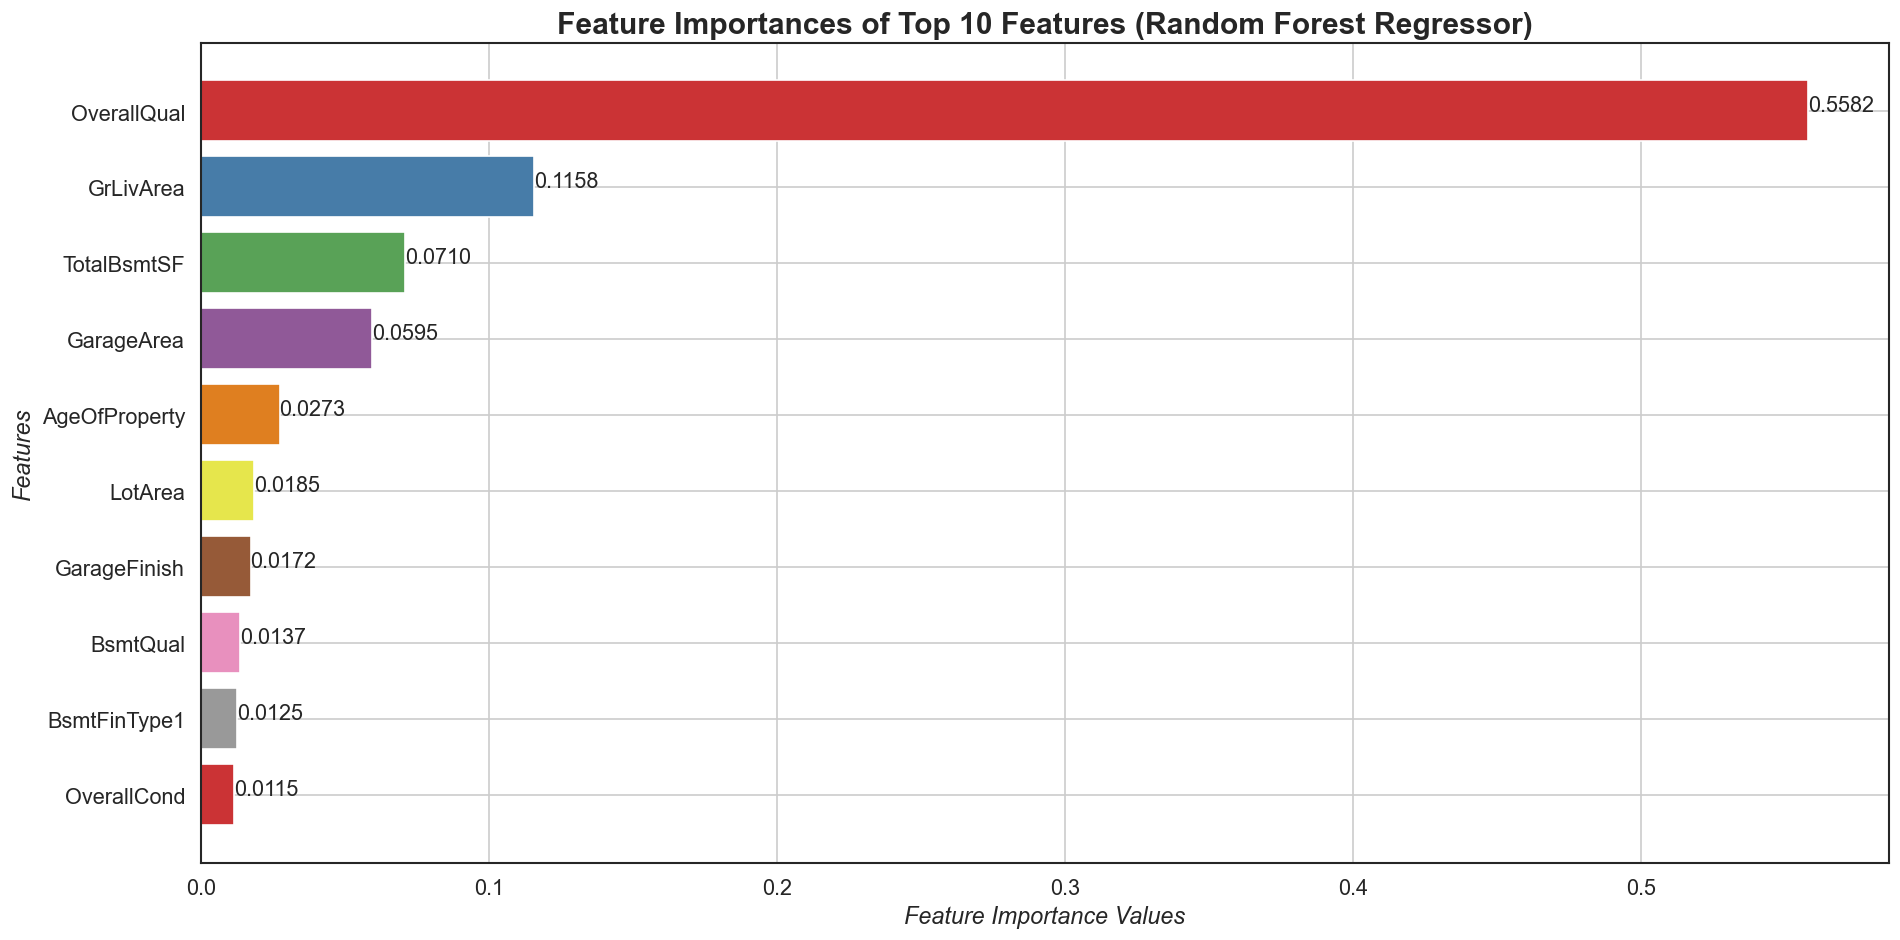

In [178]:
# Extracting the top 10 features based on the largest feature importances
top10_rf_df = rf_df_sorted.loc[:9]

# Set Seaborn style for better visuals
sns.set(style='white')

# Create the plot with appropriate figure size and resolution
plt.figure(figsize=(16, 8), dpi=120)

# Plotting the barplot for the feature importances of the top 10 features
ax3 = sns.barplot(y=top10_rf_df['Features'], x=top10_rf_df['Feature_Importance'], palette='Set1')

# Adding labels and title
plt.xlabel('Feature Importance Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Feature Importances of Top 10 Features (Random Forest Regressor)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual feature importance values
feature_importances = top10_rf_df['Feature_Importance']
for index, value in enumerate(feature_importances):
    plt.text(value, index, f'{value:.4f}', fontsize=13)

# Additional formatting for grid and ticks
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout to ensure everything fits properly
plt.autoscale()
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the Random Forest Regressor model, that are significant in predicting the sale price of the house.

#### Random Forest Regressor With Hyperparameter Tuning

In [181]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV for RandomForestRegressor
rf_model_cv = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    scoring='neg_mean_absolute_error',
    n_iter=20,  # Number of random samples
    cv=5, 
    random_state=42, 
    verbose=3, 
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model using RandomizedSearchCV
rf_model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=3)

In [182]:
# Output the best hyperparameter and corresponding score
print(f"Best Alpha (Hyperparameter) : {rf_model_cv.best_params_}")
print(f"Best Negative Mean Absolute Error : {rf_model_cv.best_score_:.4f}")

Best Alpha (Hyperparameter) : {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Negative Mean Absolute Error : -0.0937


In [183]:
# Initialize and train RandomForestRegressor with a specific number of trees (n_estimators) and other parameters
rf_model_HP = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False, random_state=42)
rf_model_HP.fit(x_train, y_train)

# Predictions
rf_train_pred_HP = rf_model_HP.predict(x_train)
rf_test_pred_HP = rf_model_HP.predict(x_test)

# Training set evaluation
mae_rf_train = mean_absolute_error(y_train, rf_train_pred_HP)
mse_rf_train = mean_squared_error(y_train, rf_train_pred_HP)
rmse_rf_train = np.sqrt(mse_rf_train)
r2_rf_train = r2_score(y_train, rf_train_pred_HP)

# Testing set evaluation
mae_rf_test = mean_absolute_error(y_test, rf_test_pred_HP)
mse_rf_test = mean_squared_error(y_test, rf_test_pred_HP)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, rf_test_pred_HP)

print("For Random Forest Regressor With Hyperparameter Tuning Model :\n","*"*40)
print("\nFor Train Set :-\nR2 score :",r2_rf_train,"\nMSE score :",mse_rf_train,"\nMAE score :", mae_rf_train,\
     "\nRMSE score :",rmse_rf_train)
print("\nFor Test Set :-\nR2 score :",r2_rf_test,"\nMSE score :",mse_rf_test,"\nMAE score :",mae_rf_test,\
      "\nRMSE score :",rmse_rf_test,"\n","*"*40)

For Random Forest Regressor With Hyperparameter Tuning Model :
 ****************************************

For Train Set :-
R2 score : 0.9912387848046672 
MSE score : 0.0012497433910714714 
MAE score : 0.021941628303812664 
RMSE score : 0.035351709874792074

For Test Set :-
R2 score : 0.8702269678472914 
MSE score : 0.02089379021106012 
MAE score : 0.09767608992817886 
RMSE score : 0.14454684434832923 
 ****************************************


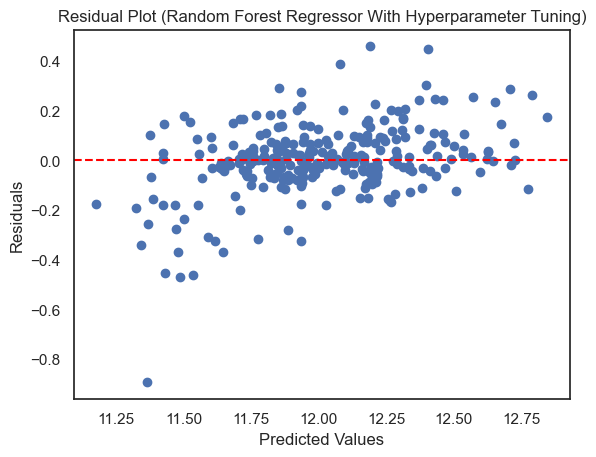

In [184]:
# Residuals for the test set
rf_residuals_HP = y_test - rf_test_pred_HP

# Plotting Residuals vs Predicted Values
plt.scatter(rf_test_pred_HP, rf_residuals_HP)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regressor With Hyperparameter Tuning)')
plt.show()

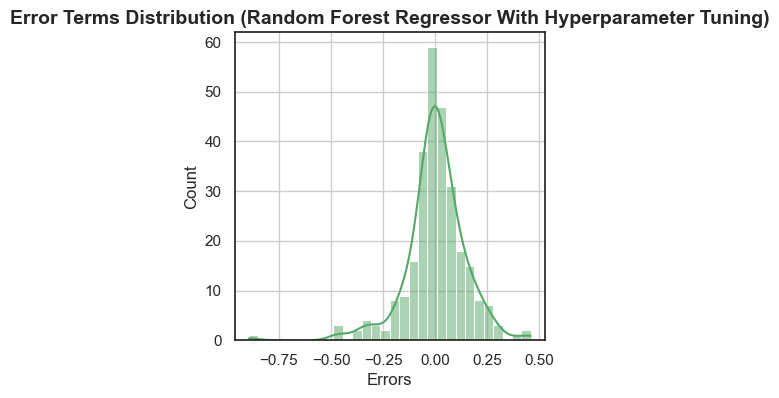

In [185]:
# Plot the histogram for Residuals (test set)
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(rf_residuals_HP, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (Random Forest Regressor With Hyperparameter Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

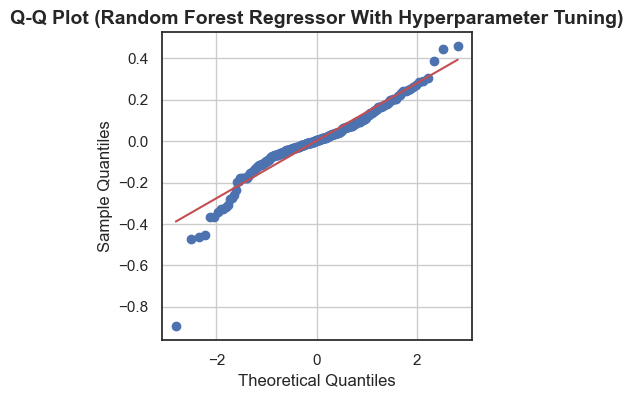

In [186]:
# Evaluate normality by comparing residuals against a theoretical normal distribution.
# Q-Q Plot
plt.figure(figsize=(4, 4), dpi=100)
probplot(rf_residuals_HP, dist="norm", plot=plt)
plt.title('Q-Q Plot (Random Forest Regressor With Hyperparameter Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights:
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [188]:
# Creating a DataFrame to display features and their corresponding importance (from Random Forest)
rf_df = pd.DataFrame({
    'Features': x_train.columns, 
    'Feature_Importance': rf_model_HP.feature_importances_.round(4)
})

# Sorting the DataFrame by feature importance in descending order
rf_df_sorted = rf_df.sort_values(by='Feature_Importance', ascending=False)

# Resetting the index of the sorted DataFrame
rf_df_sorted.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the largest feature importances
rf_df_sorted.head(10)

Features  Feature_Importance
0      GrLivArea              0.1029
1    OverallQual              0.0908
2       BsmtQual              0.0851
3     GarageArea              0.0804
4    TotalBsmtSF              0.0751
5  AgeOfProperty              0.0670
6   GarageFinish              0.0586
7       FullBath              0.0472
8        LotArea              0.0346
9     Fireplaces              0.0311

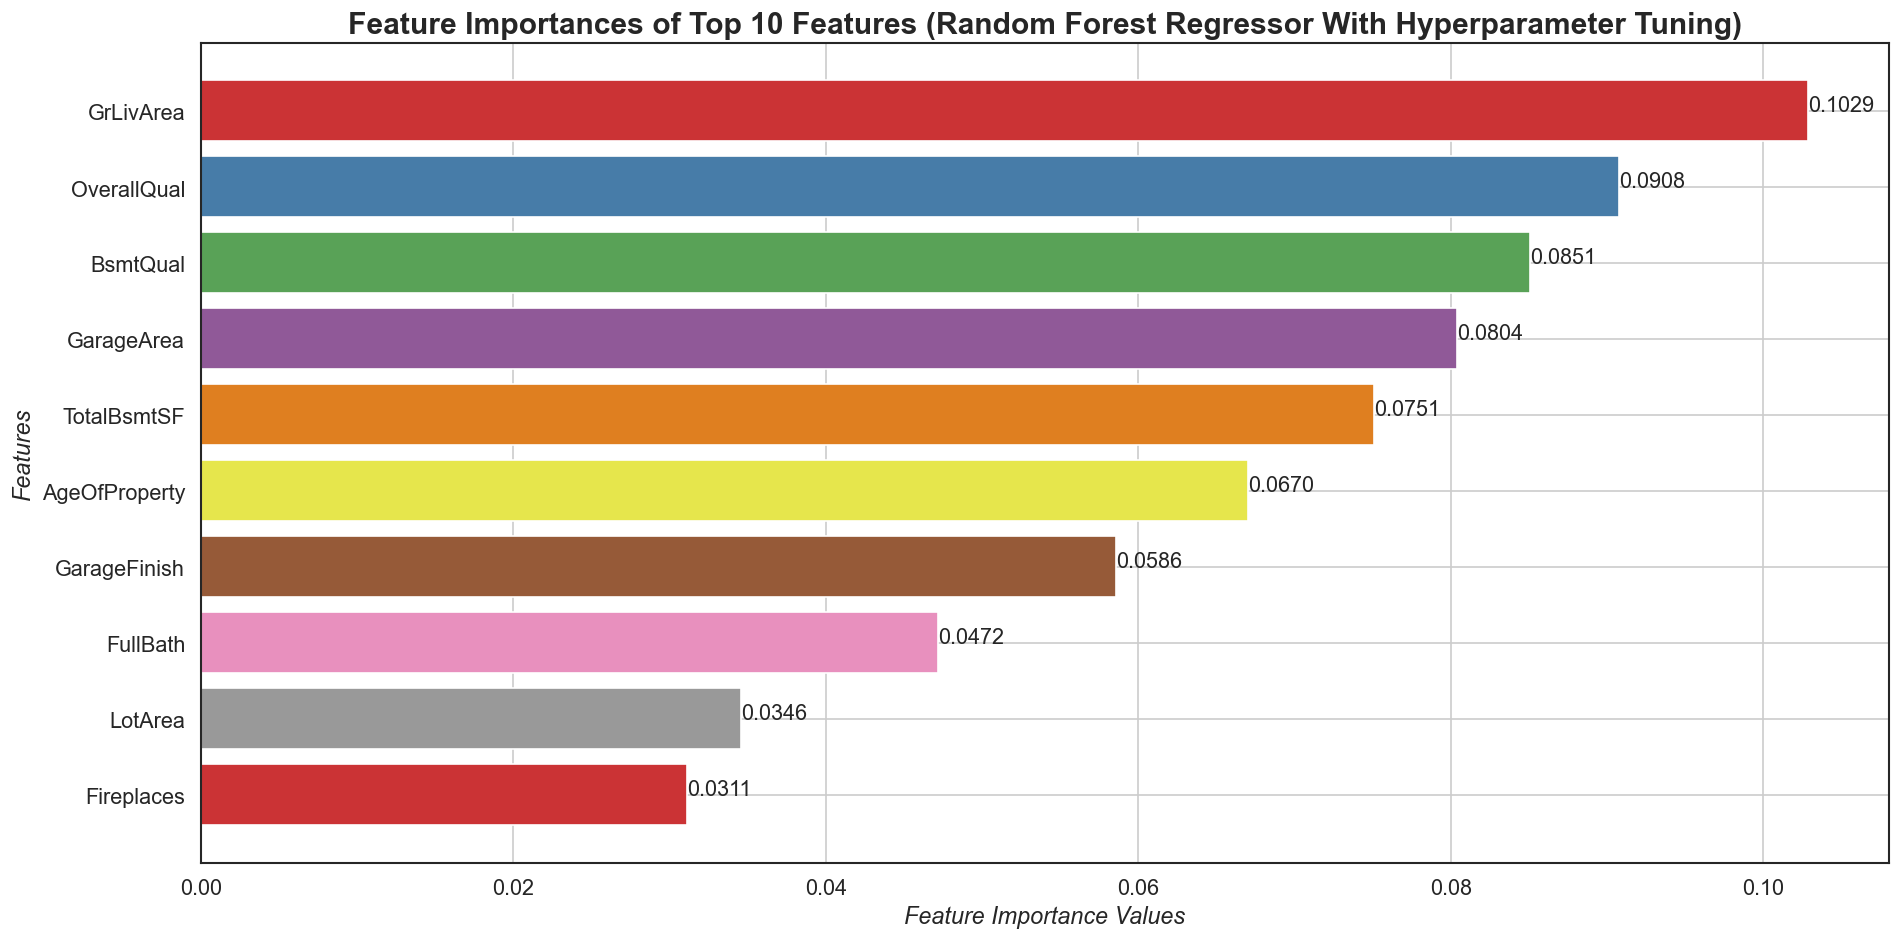

In [189]:
# Extracting the top 10 features based on the largest feature importances
top10_rf_df = rf_df_sorted.loc[:9]

# Set Seaborn style for better visuals
sns.set(style='white')

# Create the plot with appropriate figure size and resolution
plt.figure(figsize=(16, 8), dpi=120)

# Plotting the barplot for the feature importances of the top 10 features
ax3 = sns.barplot(y=top10_rf_df['Features'], x=top10_rf_df['Feature_Importance'], palette='Set1')

# Adding labels and title
plt.xlabel('Feature Importance Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Feature Importances of Top 10 Features (Random Forest Regressor With Hyperparameter Tuning)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual feature importance values
feature_importances = top10_rf_df['Feature_Importance']
for index, value in enumerate(feature_importances):
    plt.text(value, index, f'{value:.4f}', fontsize=13)

# Additional formatting for grid and ticks
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout to ensure everything fits properly
plt.autoscale()
plt.tight_layout()

# Show the plot
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the Random Forest Regressor model with hyperparameter tuning, that are significant in predicting the sale price of the house.

#### CatBoost

In [192]:
from catboost import CatBoostRegressor

# Initialize CatBoost Regressor with default parameters
cat_model = CatBoostRegressor(random_state=42)

# Fit the model to the training data
cat_model.fit(x_train, y_train)

Learning rate set to 0.041588
0:	learn: 0.3677347	total: 155ms	remaining: 2m 34s
1:	learn: 0.3586736	total: 165ms	remaining: 1m 22s
2:	learn: 0.3486561	total: 174ms	remaining: 57.7s
3:	learn: 0.3390621	total: 194ms	remaining: 48.2s
4:	learn: 0.3302654	total: 204ms	remaining: 40.5s
5:	learn: 0.3219740	total: 213ms	remaining: 35.2s
6:	learn: 0.3141295	total: 219ms	remaining: 31s
7:	learn: 0.3064363	total: 228ms	remaining: 28.2s
8:	learn: 0.2988363	total: 235ms	remaining: 25.8s
9:	learn: 0.2915144	total: 244ms	remaining: 24.1s
10:	learn: 0.2847585	total: 254ms	remaining: 22.9s
11:	learn: 0.2778348	total: 263ms	remaining: 21.6s
12:	learn: 0.2716876	total: 271ms	remaining: 20.6s
13:	learn: 0.2660024	total: 280ms	remaining: 19.7s
14:	learn: 0.2603945	total: 288ms	remaining: 18.9s
15:	learn: 0.2550232	total: 296ms	remaining: 18.2s
16:	learn: 0.2496869	total: 304ms	remaining: 17.6s
17:	learn: 0.2448443	total: 312ms	remaining: 17s
18:	learn: 0.2406443	total: 320ms	remaining: 16.5s
19:	learn: 0.

In [193]:
# Predictions on train and test data
cat_train_pred = cat_model.predict(x_train)
cat_test_pred = cat_model.predict(x_test)

# Training set evaluation
mae_cat_train = mean_absolute_error(y_train, cat_train_pred)
mse_cat_train = mean_squared_error(y_train, cat_train_pred)
rmse_cat_train = np.sqrt(mse_cat_train)
r2_cat_train = r2_score(y_train, cat_train_pred)

# Testing set evaluation
mae_cat_test = mean_absolute_error(y_test, cat_test_pred)
mse_cat_test = mean_squared_error(y_test, cat_test_pred)
rmse_cat_test = np.sqrt(mse_cat_test)
r2_cat_test = r2_score(y_test, cat_test_pred)

# Print results
print("For CatBoost Regressor :\n", "*"*40)
print("\nFor Train Set :-\nR2 score :", r2_cat_train, "\nMSE score :", mse_cat_train, "\nMAE score :", mae_cat_train, \
      "\nRMSE score :", rmse_cat_train)
print("\nFor Test Set :-\nR2 score :", r2_cat_test, "\nMSE score :", mse_cat_test, "\nMAE score :", mae_cat_test, \
      "\nRMSE score :", rmse_cat_test, "\n", "*"*40)

For CatBoost Regressor :
 ****************************************

For Train Set :-
R2 score : 0.9894659849337496 
MSE score : 0.0015026243982121067 
MAE score : 0.029299998640721886 
RMSE score : 0.038763699490787853

For Test Set :-
R2 score : 0.9207067340047527 
MSE score : 0.012766418703270672 
MAE score : 0.08003941353624475 
RMSE score : 0.11298857775576553 
 ****************************************


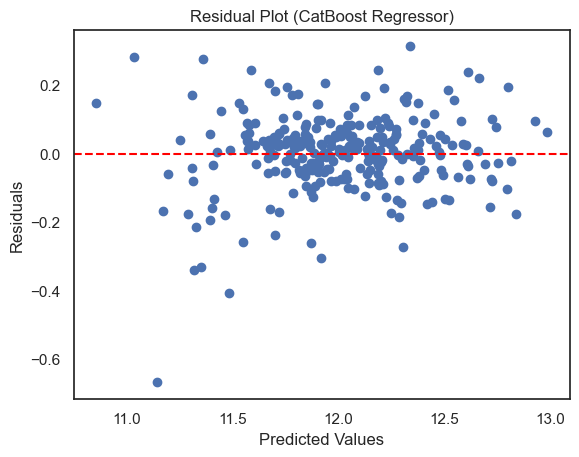

In [194]:
# Residuals for the test set
catboost_residuals = y_test - cat_test_pred

# Residuals vs Predicted Values Plot
plt.scatter(cat_test_pred, catboost_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (CatBoost Regressor)')
plt.show()

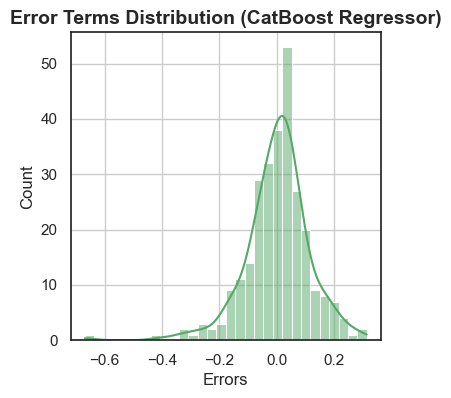

In [195]:
# Histogram for Residuals
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(catboost_residuals, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (CatBoost Regressor)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

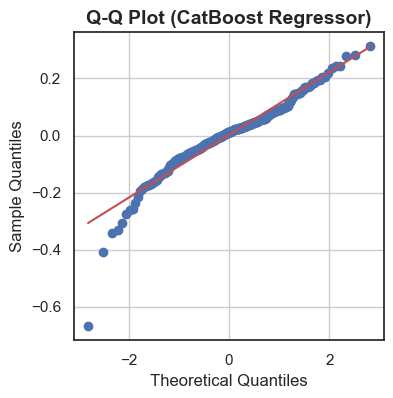

In [196]:
# Q-Q Plot for Residuals
from scipy.stats import probplot
plt.figure(figsize=(4, 4), dpi=100)
probplot(catboost_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (CatBoost Regressor)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights:
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [198]:
# Extracting feature importance
feature_importance = cat_model.get_feature_importance(prettified=True)

# Sorting the importance values in descending order
feature_importance_sorted = feature_importance.sort_values(by='Importances', ascending=False)

# Display the top 10 features
top10_features = feature_importance_sorted.head(10)
top10_features

Feature Id  Importances
0      GrLivArea    18.128765
1    OverallQual    17.819629
2    TotalBsmtSF     9.039144
3  AgeOfProperty     8.353609
4     GarageArea     5.436615
5    OverallCond     4.281547
6        LotArea     3.501357
7     Fireplaces     3.489097
8   GarageFinish     3.250044
9       BsmtQual     2.504491

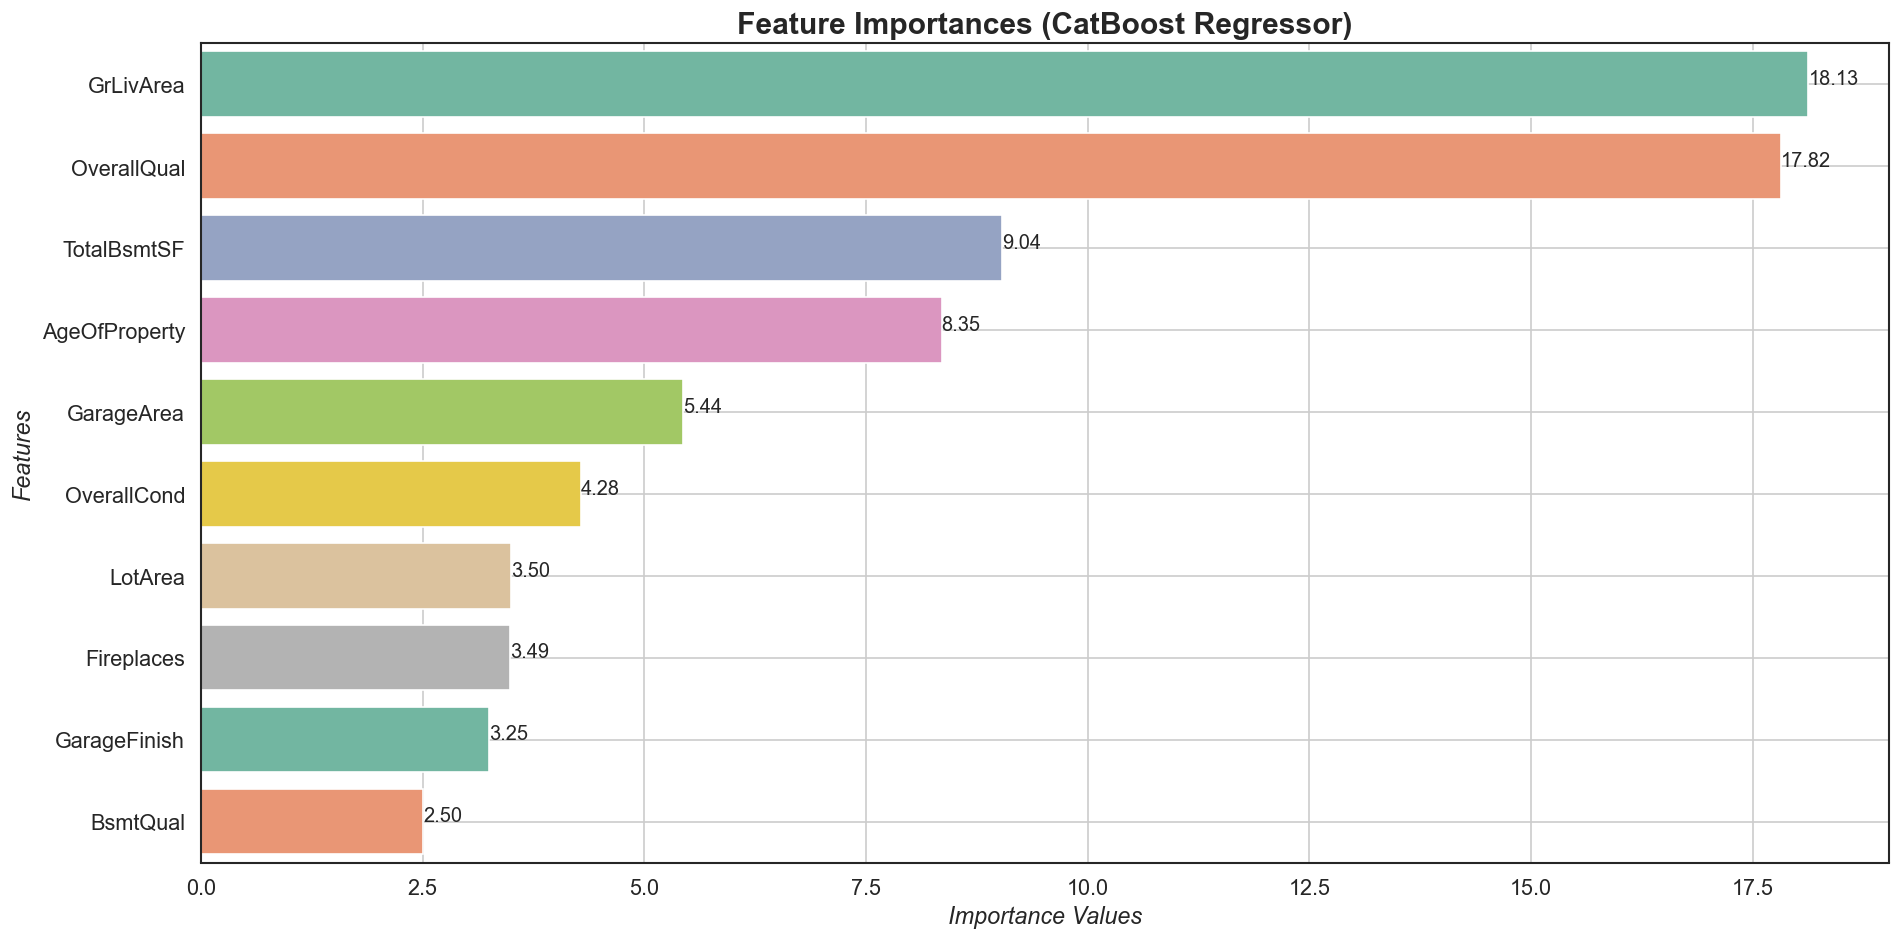

In [199]:
# Bar plot for the top 10 features
plt.figure(figsize=(16, 8), dpi=120)
sns.barplot(y=top10_features['Feature Id'], x=top10_features['Importances'], palette='Set2')

# Adding labels and title
plt.xlabel('Importance Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Feature Importances (CatBoost Regressor)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual importance values
for index, value in enumerate(top10_features['Importances']):
    plt.text(value, index, f'{value:.2f}', fontsize=12)

# Additional formatting
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Insights :
- The chart mentioned above displays the Top 10 predictors based on the CatBoost model, that are significant in predicting the sale price of the house.

#### LightGBM

In [202]:
from lightgbm import LGBMRegressor

# Create an instance of LGBMRegressor
lgb_model = LGBMRegressor(
    objective='regression',  # Specify the objective function
    metric='rmse',          # Set the evaluation metric (Root Mean Squared Error)
    num_leaves=31,          # Number of leaves in each tree
    learning_rate=0.1,      # Learning rate
    n_estimators=100         # Number of boosting rounds
)

# Fit the model on the training data
lgb_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1969
[LightGBM] [Info] Number of data points in the train set: 1104, number of used features: 72
[LightGBM] [Info] Start training from score 12.004294


LGBMRegressor(metric='rmse', objective='regression')

In [203]:
# Make predictions on train and test data
lgb_train_pred = lgb_model.predict(x_train)
lgb_test_pred = lgb_model.predict(x_test)

# Training set evaluation
mae_lgb_train = mean_absolute_error(y_train, lgb_train_pred)
mse_lgb_train = mean_squared_error(y_train, lgb_train_pred)
rmse_lgb_train = np.sqrt(mse_lgb_train)
r2_lgb_train = r2_score(y_train, lgb_train_pred)

# Testing set evaluation
mae_lgb_test = mean_absolute_error(y_test, lgb_test_pred)
mse_lgb_test = mean_squared_error(y_test, lgb_test_pred)
rmse_lgb_test = np.sqrt(mse_lgb_test)
r2_lgb_test = r2_score(y_test, lgb_test_pred)

# Print results
print("For LightGBM Regressor:\n", "*"*40)
print("\nFor Train Set :-\nR2 score :", r2_lgb_train, "\nMSE score :", mse_lgb_train, "\nMAE score :", mae_lgb_train, \
      "\nRMSE score :", rmse_lgb_train)
print("\nFor Test Set :-\nR2 score :", r2_lgb_test, "\nMSE score :", mse_lgb_test, "\nMAE score :", mae_lgb_test, \
      "\nRMSE score :", rmse_lgb_test, "\n", "*"*40)

For LightGBM Regressor:
 ****************************************

For Train Set :-
R2 score : 0.9858518601962811 
MSE score : 0.0020181611593186304 
MAE score : 0.028991709145232657 
RMSE score : 0.044923948616730366

For Test Set :-
R2 score : 0.912764856145103 
MSE score : 0.014045081358591222 
MAE score : 0.08252967338371625 
RMSE score : 0.11851194605857766 
 ****************************************


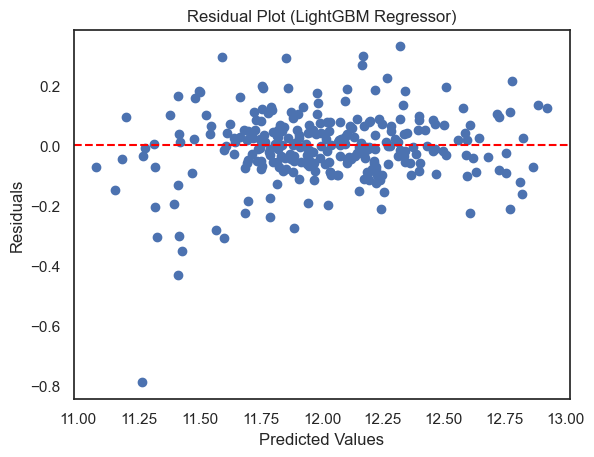

In [204]:
# Residuals for the test set
lgb_residuals = y_test - lgb_test_pred

# Residuals vs Predicted Values Plot
plt.scatter(lgb_test_pred, lgb_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (LightGBM Regressor)')
plt.show()

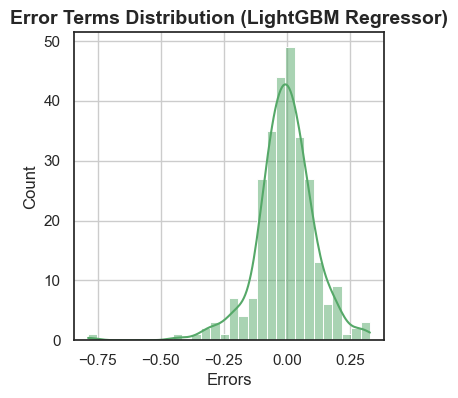

In [205]:
# Histogram for Residuals
plt.figure(figsize=(4, 4), dpi=100)
sns.histplot(lgb_residuals, bins=30, color='g', kde=True)
plt.title('Error Terms Distribution (LightGBM Regressor)', fontsize=14, fontweight='bold')
plt.xlabel('Errors', fontsize=12)
plt.grid(visible=True)
plt.show()

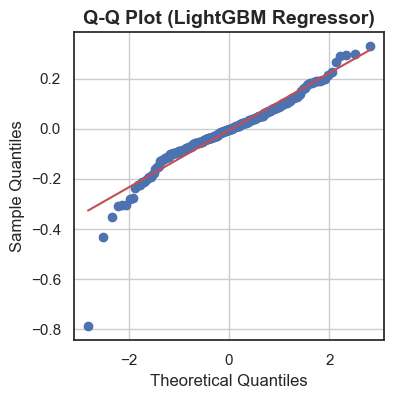

In [206]:
# Q-Q Plot for Residuals
from scipy.stats import probplot
plt.figure(figsize=(4, 4), dpi=100)
probplot(lgb_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (LightGBM Regressor)', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(visible=True)
plt.show()

#### Insights:
- The residuals vs. predicted values plot shows no patterns, indicating linearity.
- Residuals are approximately normally distributed (confirmed by the histogram/Q-Q plot).
- Residuals exhibit constant variance, with no signs of heteroscedasticity.
- The model satisfies key assumptions and is reliable for interpretation and prediction.

In [208]:
# Extract feature importance
feature_importance = lgb_model.feature_importances_

# Get feature names 
feature_names = x_train.columns 

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importances': feature_importance})

# Sort features by importance in descending order
importances_df = importances_df.sort_values(by='Importances', ascending=False)

# Display the top 10 features
top10_features = importances_df.head(10)
top10_features

Feature  Importances
12      GrLivArea          339
10    TotalBsmtSF          270
1         LotArea          265
23  AgeOfProperty          244
19     GarageArea          238
9       BsmtUnfSF          190
0     LotFrontage          149
4     OverallCond          129
3     OverallQual          112
5      MasVnrArea           96

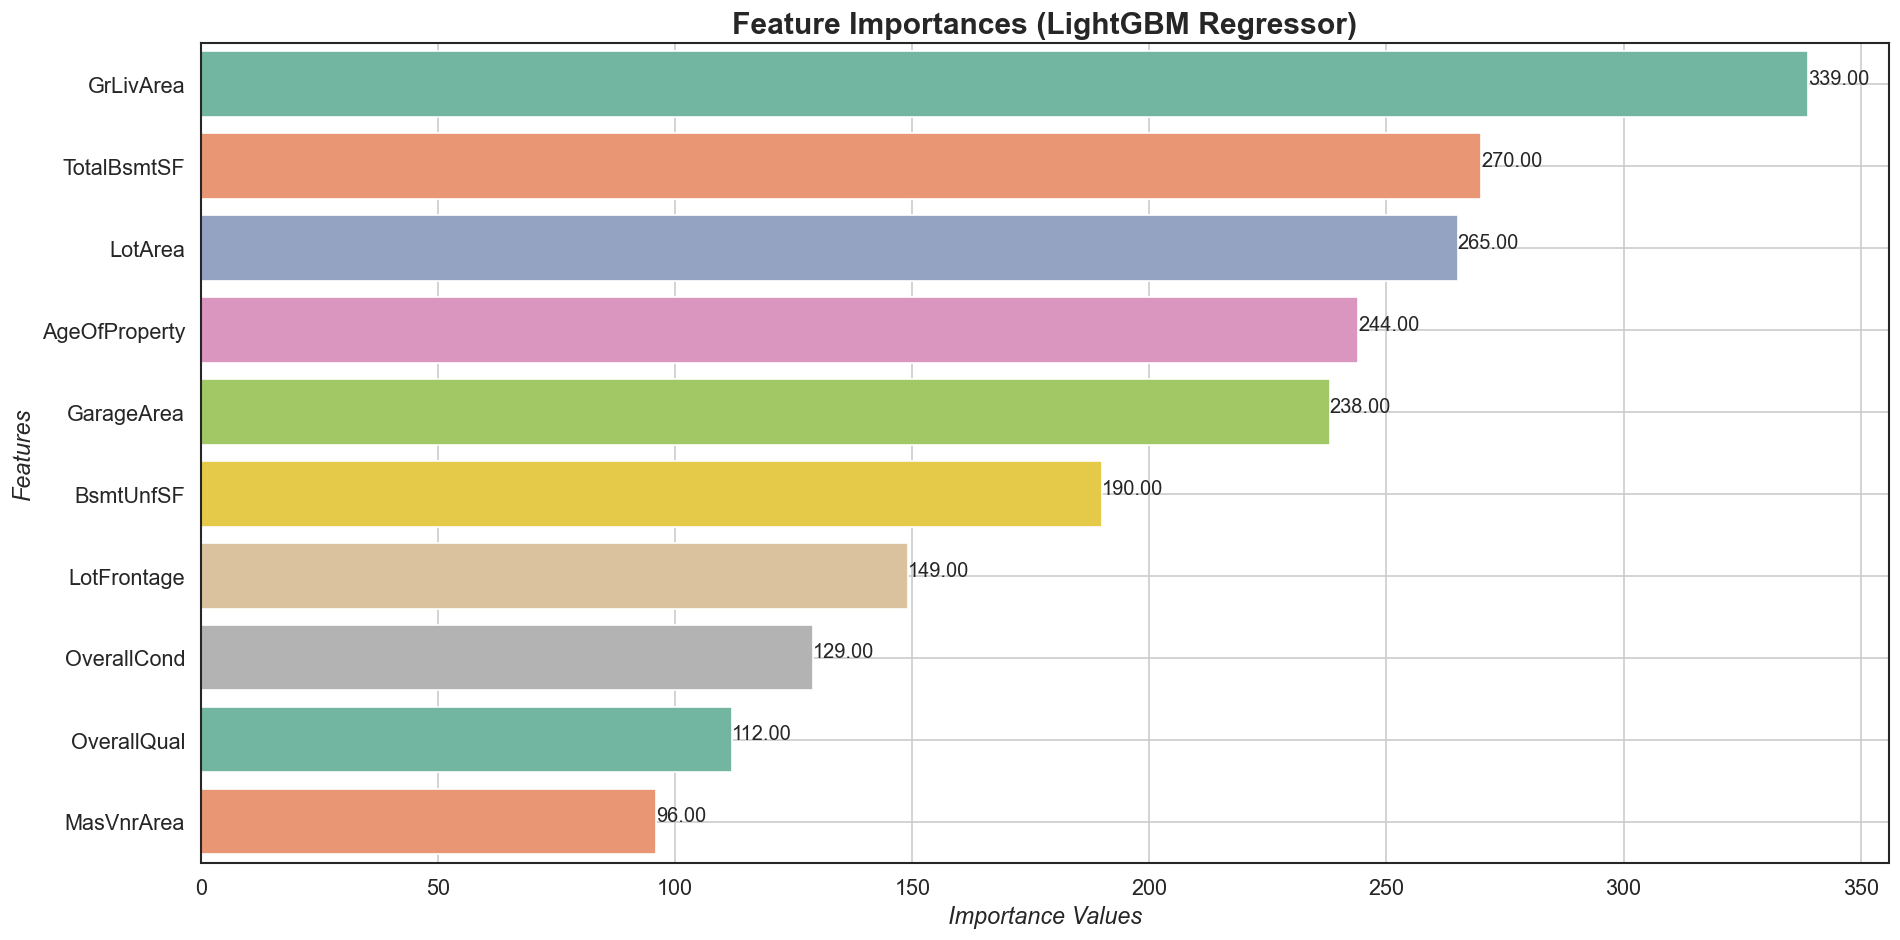

In [209]:
# Bar plot for the top 10 features
plt.figure(figsize=(16, 8), dpi=120)
sns.barplot(y=top10_features['Feature'], x=top10_features['Importances'], palette='Set2')

# Adding labels and title
plt.xlabel('Importance Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Feature Importances (LightGBM Regressor)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual importance values
for index, value in enumerate(top10_features['Importances']):
    plt.text(value, index, f'{value:.2f}', fontsize=12)

# Additional formatting
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Evaluate all models

In [211]:
# Function to calculate evaluation metrics
def evaluate_regression_models(models, x_test, y_test, x_test_scaled=None, unscaled_models=None):
    for name, model in models.items():
        if unscaled_models and name in unscaled_models:
            y_pred = model.predict(x_test)  # Use unscaled test data
        elif x_test_scaled is not None:
            y_pred = model.predict(x_test_scaled)  # Use scaled test data
        else:
            y_pred = model.predict(x_test)  # Default to original test data

        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        # Print metrics
        print(f"{name} Regression Metrics :")
        print(f"R² Score : {r2:.4f}")
        print(f"Mean Squared Error (MSE) : {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE) : {rmse:.4f}")
        print(f"Mean Absolute Error (MAE) : {mae:.4f}")
        print('*' * 50)

# Dictionary of regression models
models = {
    'Linear Regression': lr_model,
    'Ridge (no tuning)': ridge_model,
    'Ridge (with tuning)': ridge_model_HP,
    'Lasso (no tuning)': lasso_model,
    'Lasso (with tuning)': lasso_model_HP,
    'SVR (no tuning)': svr_model,
    'SVR (with tuning)': svr_model_HP,
    'Random Forest (no tuning)': rf_model,
    'Random Forest (with tuning)': rf_model_HP,
    'CatBoost': cat_model,
    'LightGBM': lgb_model
}

# Example usage
evaluate_regression_models(
    models=models,
    x_test=x_test,
    y_test=y_test,
    x_test_scaled=x_test_scaled,  # Pass scaled data if available
    unscaled_models=['Random Forest (no tuning)', 'Random Forest (with tuning)', 'LightGBM', 'CatBoost']
)

Linear Regression Regression Metrics :
R² Score : 0.9161
Mean Squared Error (MSE) : 0.0135
Root Mean Squared Error (RMSE) : 0.1162
Mean Absolute Error (MAE) : 0.0818
**************************************************
Ridge (no tuning) Regression Metrics :
R² Score : 0.9222
Mean Squared Error (MSE) : 0.0125
Root Mean Squared Error (RMSE) : 0.1119
Mean Absolute Error (MAE) : 0.0809
**************************************************
Ridge (with tuning) Regression Metrics :
R² Score : 0.9219
Mean Squared Error (MSE) : 0.0126
Root Mean Squared Error (RMSE) : 0.1121
Mean Absolute Error (MAE) : 0.0809
**************************************************
Lasso (no tuning) Regression Metrics :
R² Score : 0.9222
Mean Squared Error (MSE) : 0.0125
Root Mean Squared Error (RMSE) : 0.1119
Mean Absolute Error (MAE) : 0.0830
**************************************************
Lasso (with tuning) Regression Metrics :
R² Score : 0.9256
Mean Squared Error (MSE) : 0.0120
Root Mean Squared Error (RMSE) : 0.10

#### Compare all models

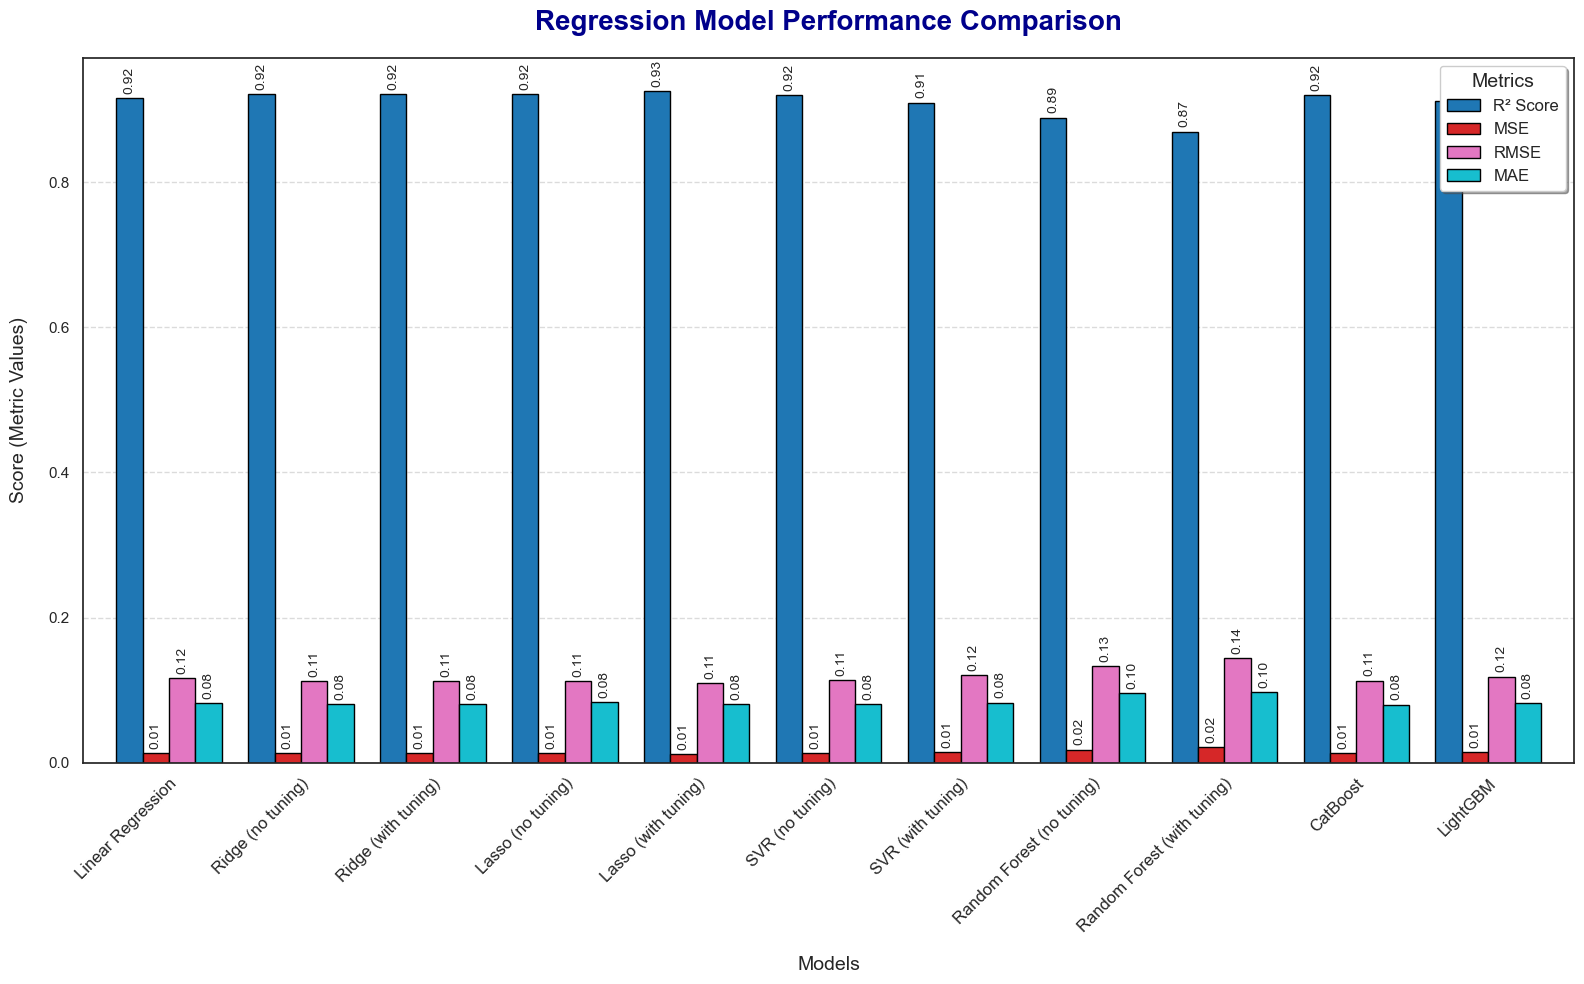

In [213]:
def plot_regression_model_comparison(models, x_test, y_test, x_test_scaled=None, unscaled_models=[]):
    # Initialize metrics storage
    metrics = {"R² Score": [], "MSE": [], "RMSE": [], "MAE": []}
    model_names = []

    for name, model in models.items():
        # Use unscaled test data for specified models
        if unscaled_models and name in unscaled_models:
            y_pred = model.predict(x_test)
        elif x_test_scaled is not None:
            y_pred = model.predict(x_test_scaled)  # Use scaled test data
        else:
            y_pred = model.predict(x_test)  # Default to original test data

        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        # Append metrics
        metrics["R² Score"].append(r2)
        metrics["MSE"].append(mse)
        metrics["RMSE"].append(rmse)
        metrics["MAE"].append(mae)
        model_names.append(name)

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame(metrics, index=model_names)

    # Improve plot appearance
    fig, ax = plt.subplots(figsize=(16, 10))
    metrics_df.plot(kind='bar', ax=ax, edgecolor='black', colormap='tab10', width=0.8)

    # Add titles and labels
    ax.set_title("Regression Model Performance Comparison", fontsize=20, fontweight='bold', color='darkblue', pad=20)
    ax.set_ylabel("Score (Metric Values)", fontsize=14, labelpad=15)
    ax.set_xlabel("Models", fontsize=14, labelpad=15)

    # Customize x-axis ticks
    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels(model_names, rotation=45, fontsize=12, ha='right', rotation_mode='anchor')

    # Customize legend
    ax.legend(title="Metrics", fontsize=12, title_fontsize=14, loc="upper right", frameon=True, shadow=True)

    # Add grid lines for readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars with exact values
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3, rotation=90)

    # Tight layout for better appearance
    plt.tight_layout()
    plt.show()

# Dictionary of regression models
models = {
    'Linear Regression': lr_model,
    'Ridge (no tuning)': ridge_model,
    'Ridge (with tuning)': ridge_model_HP,
    'Lasso (no tuning)': lasso_model,
    'Lasso (with tuning)': lasso_model_HP,
    'SVR (no tuning)': svr_model,
    'SVR (with tuning)': svr_model_HP,
    'Random Forest (no tuning)': rf_model,
    'Random Forest (with tuning)': rf_model_HP,
    'CatBoost': cat_model,
    'LightGBM': lgb_model
}

# Call the function
plot_regression_model_comparison(
    models=models,
    x_test=x_test,
    y_test=y_test,
    x_test_scaled=x_test_scaled,  # Scaled test data for Ridge, Lasso, and SVR
    unscaled_models=['Random Forest (no tuning)', 'Random Forest (with tuning)', 'LightGBM', 'CatBoost']
)

#### Top 10 features among all models 

In [215]:
# List of models in a dictionary
models = {
    'Linear Regression': lr_model,
    'Ridge (no tuning)': ridge_model,
    'Ridge (with tuning)': ridge_model_HP,
    'Lasso (no tuning)': lasso_model,
    'Lasso (with tuning)': lasso_model_HP,
    'SVR (no tuning)': svr_model,
    'SVR (with tuning)': svr_model_HP,
    'Random Forest (no tuning)': rf_model,
    'Random Forest (with tuning)': rf_model_HP,
    'CatBoost': cat_model,
    'LightGBM': lgb_model
}

# Initialize an empty DataFrame to store the results
all_importances = pd.DataFrame()

# Loop through each model to extract feature importances
for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):  # Check if model has feature_importances_
        # Extract feature importances
        feature_importance = model.feature_importances_
        
        # Get feature names (ensure this matches your feature names in the training data)
        feature_names = x_train.columns
        
        # Check if both have the same length
        if len(feature_importance) == len(feature_names):
            # Create a DataFrame for the current model
            importances_df = pd.DataFrame({'Feature': feature_names, 'Importances': feature_importance})
            
            # Sort features by importance in descending order
            importances_df = importances_df.sort_values(by='Importances', ascending=False)
            
            # Add model name as a column for identification
            importances_df['Model'] = model_name
            
            # Append to the all_importances DataFrame
            all_importances = pd.concat([all_importances, importances_df])
    
    elif hasattr(model, 'coef_'):  # Models like Linear Regression, Lasso, etc.
        # Extract feature coefficients for models like Linear Regression, Lasso, etc.
        feature_importance = model.coef_
        
        # Get feature names (ensure this matches your feature names in the training data)
        feature_names = x_train.columns
        
        # Check if both have the same length
        if len(feature_importance) == len(feature_names):
            # Create a DataFrame for the current model
            importances_df = pd.DataFrame({'Feature': feature_names, 'Importances': feature_importance})
            
            # Sort features by importance in descending order
            importances_df = importances_df.sort_values(by='Importances', ascending=False)
            
            # Add model name as a column for identification
            importances_df['Model'] = model_name
            
            # Append to the all_importances DataFrame
            all_importances = pd.concat([all_importances, importances_df])

# Display the top 10 important features across all models based on average importance
top10_features_all_models = all_importances.groupby('Feature').agg({'Importances': 'mean'}).sort_values(by='Importances', ascending=False).head(10)
print(top10_features_all_models)

               Importances
Feature                   
GrLivArea        40.093016
TotalBsmtSF      31.180161
LotArea          29.910688
AgeOfProperty    27.867087
GarageArea       27.180511
BsmtUnfSF        21.240557
LotFrontage      16.760088
OverallCond      14.837400
OverallQual      14.529021
MasVnrArea       10.795075


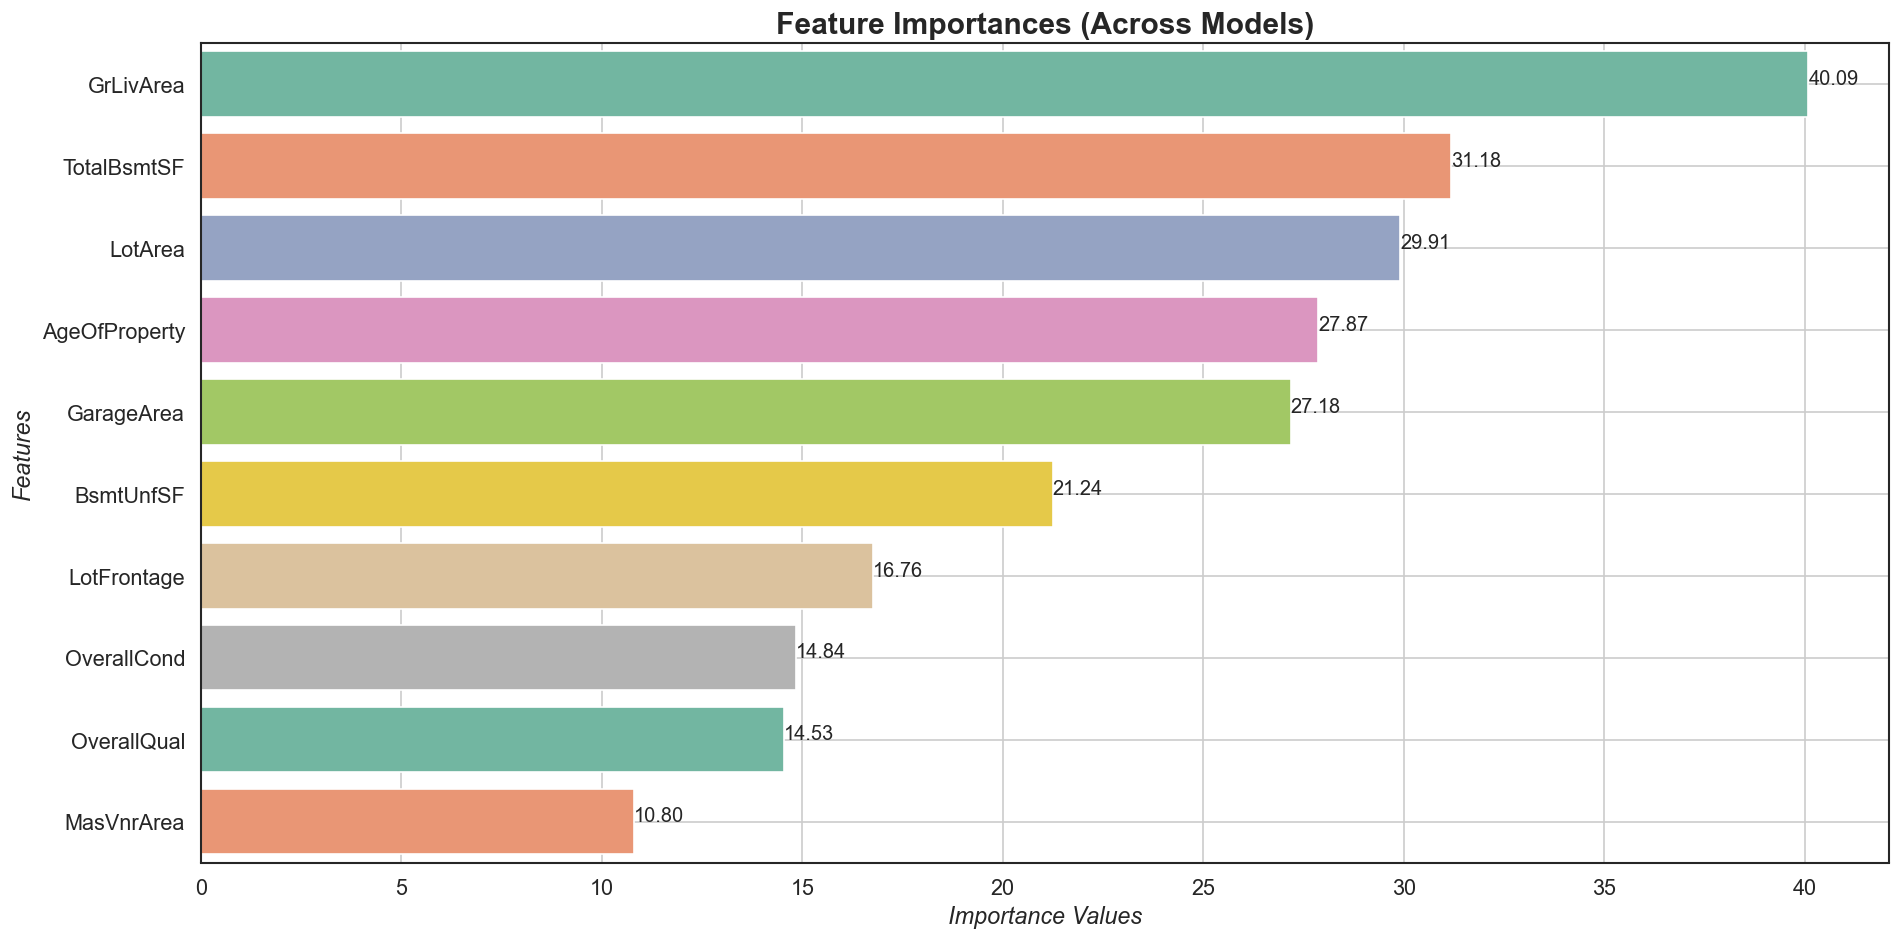

In [216]:
# Reset index to make 'Feature' a regular column
top10_features_all_models = top10_features_all_models.reset_index()

# Bar plot for the top 10 features
plt.figure(figsize=(16, 8), dpi=120)
sns.barplot(y=top10_features_all_models['Feature'], x=top10_features_all_models['Importances'], palette='Set2')

# Adding labels and title
plt.xlabel('Importance Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Feature Importances (Across Models)', fontsize=18, fontweight='bold')

# Annotating the bars with the actual importance values
for index, value in enumerate(top10_features_all_models['Importances']):
    plt.text(value, index, f'{value:.2f}', fontsize=12)

# Additional formatting
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust layout for better visualization and display
plt.tight_layout()
plt.show()

### Insights :

Here are the insights for the top 10 features :

**GrLivArea :** 
- Larger living spaces are a key determinant of higher house prices, reflecting greater comfort and utility for the homeowner.

**TotalBsmtSF :** 
- A larger basement area typically adds to the house's value, offering additional usable space for storage or living areas.

**LotArea :** 
- The size of the lot influences property prices, with larger lots providing more potential for expansion, landscaping, or development.

**AgeOfProperty :** 
- The age of the property can impact its value, with older homes sometimes being valued lower due to wear and tear, or higher for their historic charm.

**GarageArea :** 
- Larger garage spaces are valued as they provide more storage and parking options, which are key considerations for many homebuyers.

**BsmtUnfSF :** 
- An unfinished basement, while less valuable than a finished one, still adds potential for future customization or expansion, influencing property value.

**LotFrontage :** 
- A larger lot frontage is desirable for better curb appeal and potential development opportunities, often leading to higher prices.

**OverallCond :** 
- The overall condition of a property directly impacts its value, with well-maintained homes commanding higher prices.

**OverallQual :** 
- A higher quality of construction and materials typically leads to better property prices, reflecting the durability and luxury of the home.

**MasVnrArea :** 
- The size of masonry veneer (external finish) is an indicator of the house's aesthetic appeal and quality, influencing its overall value.

<br><br>
## Task3 :- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.

__(1) Gather Customer Preferences__

-   `Budget :` Obtain the customer's maximum budget for purchasing a house.
-   `Desired Area :` Inquire about the preferred location (neighborhood, city, or even a specific region). This can be narrowed down using the Neighborhood column in your dataset.
-   `Required Features :` Determine the essential features for the customer, such as :
  -   `Number of Bedrooms :` BedroomAbvGr
  -   `Number of Bathrooms :` FullBath, HalfBath
  -   `Square Footage :` GrLivArea, LotArea
  -   `Garage Size :` GarageArea, GarageType
  -   `Basement :` TotalBsmtSF, BsmtQual, BsmtExposure, BsmtFinType1
  -   `Overall Quality :` OverallQual
  -   `Overall Condition :` OverallCond
  -   `Fireplaces :` Fireplaces

__(2) Utilize the House Price Prediction Model__

-   `Filter Data :`
    - `Area :` Use the Neighborhood column and any other relevant location-based features to filter the dataset to include only properties in the desired area.
    - `Budget :` Filter the data to include only properties with a predicted price within the customer's budget. You can use your trained LightGBM model to predict prices for the filtered dataset.
-   `Apply Feature Filters :`
    - `Number of Bedrooms/Bathrooms :` Filter the data to include only properties that meet the customer's requirements for the number of bedrooms and bathrooms.
    - `Square Footage `: Filter based on minimum and maximum desired living area and lot size.
    - `Garage :` Filter based on garage size, type (attached, detached, etc.), and whether a garage is even desired.
    - `Basement :` Filter based on basement size, quality, exposure, and finished area.
    - `Overall Quality/Condition :` Filter based on desired overall quality and condition ratings.
    - `Fireplaces :` Filter based on the desired number of fireplaces.
    - `Rank Results :` Sort the filtered properties by predicted price in ascending order to present the most affordable options first.

__(3) Generate Suggestions__

-    `Present Top Matches :` Show the customer a list of houses that best match their criteria, sorted by predicted price. Include key details for each house, such as :
       - Address (if available)
       - Predicted price
       - Key features (bedrooms, bathrooms, square footage, garage, etc.)
       - Neighborhood
-    `Highlight Key Features :` Emphasize the features that align with the customer's preferences.
-    `Provide Comparative Analysis :` If possible, compare the predicted price to the listing price (if available) to identify potential bargains or overpriced properties.

__(4) Refine Suggestions Based on Feedback__

-    `Iterative Process :` Allow the customer to provide feedback on the initial suggestions.
-    `Adjust Filters :` Based on the customer's feedback, refine the search criteria (e.g., adjust budget, add or remove features, change area preferences).
-    `Re-run the Model :` Re-run the prediction model with the updated criteria to generate a new set of suggestions.

__Example :__

- Based on your budget of $300,000, preference for the 'CollgCr' neighborhood, and desire for at least 3 bedrooms, 2 bathrooms, and a 2-car garage, here are a few houses that might interest you :

    - `House A :` Predicted price : $280,000. 3 bedrooms, 2.5 bathrooms, 2-car attached garage, located in 'CollgCr'.
      
    - `House B :` Predicted price : $295,000. 3 bedrooms, 2 bathrooms, 2-car attached garage, larger lot size, located in 'CollgCr'.


__Important Considerations :__

-    `Data Quality :` Ensure the quality and completeness of the data used to train the model and for the search.

-    `Feature Engineering :` Create and use relevant features (e.g., age of property, number of stories, proximity to amenities) to improve model accuracy and the quality of suggestions.

-    `User Interface :` Develop a user-friendly interface that allows customers to easily input their preferences, view suggestions, and refine their search.

-    `Transparency :` Be transparent with customers about how the suggestions are generated and the limitations of the model.

By implementing these steps and continuously refining the process, you can effectively use your house price prediction model to provide valuable and personalized suggestions to home buyers.

<br><br><br>

# **Model Comparison Report**
<br>

# **1. Objective**
The goal of this project is to identify the best regression model for predicting house prices. Several models were trained and evaluated using a dataset containing numerous numerical and categorical features, with performance measured using standard regression metrics.<br><br>

# **2. Dataset Summary**
- **Number of rows :** 1460
- **Number of features :** 81 (numerical and categorical features)
- **Target variable :** SalePrice (continuous variable)
- **Data preprocessing :**
  - **Feature Engineering :**
     - Converted categorical variables to numerical using one-hot encoding and ordinal encoding.
     - Removed irrelevant or redundant columns.
  - **Outlier Handling :** Outliers were identified and treated to minimize their impact on model performance.
  - **Target Variable Transformation :** The target variable was log-transformed to normalize its distribution and improve model accuracy.
  - **Scaling :** Continuous variables were scaled using MinMaxScaler to handle outliers.  <br><br>

# **3. Models Evaluated**
1. Linear Regression
2. Ridge Regression (with and without tuning)
3. Lasso Regression (with and without tuning)
4. Support Vector Regressor (SVR) (with and without tuning)
5. Random Forest Regressor (with and without tuning)
6. CatBoost Regressor
7. LightGBM Regressor

## Evaluation Metrics
The models were evaluated on the following metrics :
- **R² Score :** Proportion of variance in the target variable explained by the model. Higher values indicate better performance. 
- **Mean Squared Error (MSE) :** Average squared difference between predicted and actual values. Lower values indicate better performance.
- **Root Mean Squared Error (RMSE) :** Square root of MSE, representing error in the same units as the target variable. Lower values are preferred.
- **Mean Absolute Error (MAE) :** Average absolute difference between predicted and actual values. Provides an intuitive measure of error magnitude.

These metrics were computed on both training and validation datasets to evaluate model performance and generalization capability. <br><br>

# **4. Model Performance Summary**

| **Model**                  | **Parameters**                                                                 | **R² Score** | **MSE**  | **RMSE**  | **MAE**  |  
|----------------------------|-------------------------------------------------------------------------------|--------------|----------|-----------|----------|  
| Linear Regression          | Default                                                                       | 0.9161       | 0.0135   | 0.1162    | 0.0818   |  
| Ridge (no tuning)          | alpha=1.0                                                                    | 0.9222       | 0.0125   | 0.1119    | 0.0809   |  
| Ridge (with tuning)        | alpha=0.8                                                                    | 0.9219       | 0.0126   | 0.1121    | 0.0809   |  
| Lasso (no tuning)          | alpha=0.001                                                                    | 0.9222       | 0.0125   | 0.1119    | 0.0830   |  
| Lasso (with tuning)        | alpha=0.0003                                                                   | 0.9256       | 0.0120   | 0.1094    | 0.0803   |  
| SVR (no tuning)            | kernel='linear'                                               | 0.9202       | 0.0128   | 0.1133    | 0.0810   |  
| SVR (with tuning)          | kernel='linear', C: 10, epsilon: 0.01, gamma: 'scale'                                                | 0.9100       | 0.0145   | 0.1204    | 0.0826   |  
| Random Forest (no tuning)  | Default                                             | 0.8894       | 0.0178   | 0.1334    | 0.0954   |  
| Random Forest (with tuning)| n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False      | 0.8702       | 0.0209   | 0.1445    | 0.0977   |  
| CatBoost                   | Default                                   | 0.9207       | 0.0128   | 0.1130    | 0.0800   |  
| LightGBM                   | Default                         | 0.9128       | 0.0140   | 0.1185    | 0.0825   |  


<br>

# **5. Analysis and Insights**
1. **Linear Regression :**
   - `Strengths :` Simple to implement and interpret, performed well with high R² score (0.9161).
   - `Weaknesses :` Sensitive to multicollinearity and outliers.<br><br>

2. **Ridge Regression :**
   - `Strengths :` Mitigated multicollinearity through L2 regularization. Consistently good performance with R² ~0.922.
   - `Weaknesses :` Regularization introduced a slight bias, limiting further performance improvement with tuning.<br><br>

3. **Lasso Regression :**
   - `Strengths :` Excellent feature selection capability through L1 regularization, achieved the best R² score (0.9256).
   - `Weaknesses :` May eliminate important features if the regularization parameter is not carefully tuned.<br><br>

4. **Support Vector Regressor (SVR) :**
   - `Strengths :` Effective for non-linear relationships, achieved R² score of 0.9202 without tuning.
   - `Weaknesses :` Computationally expensive, especially with large datasets. Performance degraded with tuning.<br><br>

5. **Random Forest Regressor :**
   - `Strengths :` Robust to outliers and capable of capturing complex interactions between features.
   - `Weaknesses :` Underperformed due to overfitting and sensitivity to parameter tuning.<br><br>
     
6. **CatBoost Regressor :**
   - `Strengths :` Handled categorical data efficiently and performed consistently, with R² score of 0.9207. Minimal tuning required.
   - `Weaknesses :` Computationally more expensive compared to linear models.<br><br>

7. **LightGBM Regressor :**
   - `Strengths :` Fast training, good performance (R² score: 0.9128). Handles large datasets efficiently.
   - `Weaknesses :` Slightly underperformed compared to CatBoost and Lasso.<br><br>

# **6. Recommendation**
Based on the performance metrics, **Lasso Regression (with tuning)** is the recommended model for house price prediction.

### Reasons for Choosing Lasso Regression :
- **Best Performance :** Lasso (with tuning) achieved the highest R² score (0.9256) and lowest MSE (0.0120), RMSE (0.1094), and MAE (0.0803).
- **Feature Selection :** Lasso's ability to reduce dimensionality by eliminating irrelevant features improves interpretability and reduces overfitting.
- **Computational Efficiency :** Lasso is computationally less expensive compared to ensemble models like Random Forest, CatBoost, and LightGBM.<br><br>

**Alternative Option :**
- CatBoost Regressor is a viable alternative if categorical data handling and model interpretability are priorities. It offers competitive performance with an R² score of 0.9207 and low MAE (0.0800).<br><br><br>

**Future Steps :**
- Fine-tune hyperparameters for CatBoost and LightGBM for potential performance improvements.
- Explore advanced techniques such as stacking or blending multiple models to leverage individual strengths.
- Perform further feature engineering to extract meaningful insights from the dataset.
- PCA and RFE were applied for dimensionality reduction, but as the models ran efficiently with all features, the full feature set was retained for evaluation.
<br><br><br><br>

# **Report on Challenges Faced**


## **1. Introduction**

This report documents the challenges faced and solutions implemented during the house price prediction project. The project aimed to predict house prices using a dataset with numerous numerical and categorical features. Addressing these challenges required careful planning, optimization techniques, and the application of appropriate machine learning models.<br><br>

## **2. Challenges and Solutions**

**Challenge 1 : Missing Values in Categorical and Numeric Columns**
- **Problem :** The dataset contained missing values in both categorical and numerical columns. These missing values could impact the model’s performance, as many machine learning algorithms cannot handle missing data directly. Additionally, improper handling could lead to bias or poor predictions.  
- **Solution :**  
  - `Categorical Columns :` Missing values were handled by filling them with a special placeholder (e.g., "None") for categorical features, indicating the absence of data. This allowed the model to handle missing data without assuming it is a valid category.
  - `Numerical Columns :` For numerical features, missing values were imputed using the mean or median depending on the distribution of the column.<br><br>

**Challenge 2 : Handling Outliers**  
- **Problem :** The dataset contained outliers in several numerical columns, which could distort model predictions and inflate errors.
- **Solution :**  
  - `Outlier Removal :` For columns with outliers, points that had no meaningful impact on the overall data distribution were removed. This helped ensure that the model wasn’t influenced by extreme values, while still retaining the integrity of the data.<br><br>

**Challenge 3 : Imbalanced Data Feature with 80% Same Value**  
- **Problem :** Some features had 80% of the values as the same, meaning these features could not add significant value to predicting the house prices.
- **Solution :**  
  - Since the data imbalance came from a specific subset that didn’t contribute meaningful variation to predictions, the features with these imbalanced values were removed. This ensured that the model focused on a broader range of house prices, improving prediction accuracy across the dataset.<br><br>

**Challenge 4 : Derived New Features from Existing Data**  
- **Problem :** Some potentially important information was embedded in the existing features, and creating new features was necessary to improve model performance.
- **Solution :**  
  - Derived new features like the age of the house (from the year built) to provide additional insights for the model, which could help improve prediction accuracy.<br><br>

**Challenge 5 : Log Transformation of Target Variable Sale Price**  
- **Problem :** The sale price target variable was highly skewed, with a few houses having significantly higher prices compared to the majority, which could hinder model performance.
- **Solution :**  
  - Log transformation was applied to the sale price to normalize the distribution and reduce the influence of high-priced outliers. This allowed the model to perform better across a wider range of house prices.<br><br>

**Challenge 6 : Highly Correlated Features**  
- **Problem :** The dataset contained highly correlated features, which could cause multicollinearity issues and negatively impact model performance.
- **Solution :**  
  - Used a correlation matrix to identify highly correlated features and dropped one feature from each pair with high correlation. This reduced redundancy and helped the model focus on the most significant, unique features.<br><br>

**Challenge 7 : Encoding for Categorical features**  
- **Problem :** The dataset had categorical features that required proper encoding to be used by machine learning algorithms. 
- **Solution :**  
  - For categorical features, applied one-hot encoding to convert them into numerical form and ordinal encoding for some features also.<br><br>

**Challenge 8 : Scaling of Features**  
- **Problem :** Features in the dataset had different scales, which could affect the model’s performance, particularly for algorithms sensitive to feature magnitude, such as linear regression.
- **Solution :**  
  - Applied scaling techniques like MinMaxScaler to ensure all features were on the same scale, improving the model's ability to learn from all input features effectively.<br><br>

**Challenge 9 :  Identifying the Top Features Useful for Prediction**  
- **Problem :** With many features available, it was difficult to identify which ones had the most predictive power, leading to longer training times and potential overfitting. 
- **Solution :**  
  - Used feature importance methods such as tree-based algorithms (Random Forest or LightGBM) and L1 regularization (Lasso) to identify and select the most important features.<br><br>


**Challenge 10 : Hyperparameter Tuning for Lasso and Ridge**  
- **Problem :** Tuning the hyperparameters for models like Lasso and Ridge regression required extensive experimentation, especially trying different values of alpha to prevent overfitting while improving model accuracy.
- **Solution :**  
  - Implemented a grid search with cross-validation to try various values of alpha for both Lasso and Ridge regression.
  - Applied regularization techniques to balance bias and variance and fine-tuned hyperparameters to achieve better generalization performance.<br><br>

## **3. Results and Key Observations**

- **Log Transformation :** The log transformation of the sale price variable significantly improved the model's ability to predict prices across a wider range and reduced the impact of outliers.
- **Outlier Removal :** Removing non-impactful outliers helped create a cleaner dataset, improving the accuracy of predictions.
- **Feature Selection :** Feature importance and L1 regularization (Lasso) helped identify the most influential features, leading to faster training times and improved model performance. 
- **Handling Imbalance :** Removing imbalanced data helped focus the model on predicting across the full range of house prices, improving accuracy.
- **Hyperparameter Tuning :** he hyperparameter optimization for Lasso and Ridge regression successfully reduced overfitting, improving the model’s ability to generalize to unseen data.<br><br>

## **4. Conclusion**

The project faced several challenges related to missing values, data imbalance, outliers, feature encoding, and hyperparameter tuning. These were effectively addressed through various preprocessing, feature engineering, and machine learning techniques, resulting in a more robust and accurate model. Future work could focus on further fine-tuning hyperparameters, exploring advanced feature engineering techniques, and experimenting with ensemble models to further enhance predictive accuracy.
<br><br><br>